<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Simple_low.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

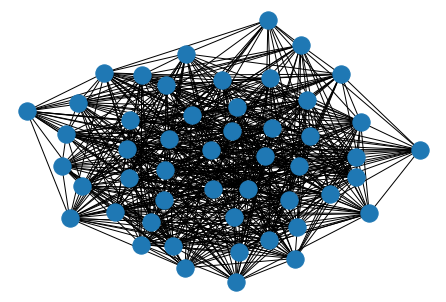

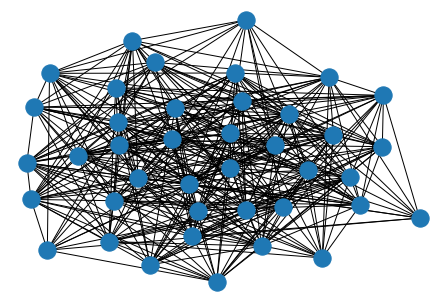

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .5 #Probabibilty for Node Connection in random graph
PP = .5
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 0 1 1]
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 0 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=1/(Node[cur][2]['I'] +Node[cur][1]['S'] + 1)
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=1/((Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #Node_next[nex][0]['Viral_load']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592]
[226, 462, 763, 1021, 1183, 1261, 1302, 1095, 875, 582, 337, 187, 120, 84, 71, 61, 57, 46, 37, 27, 22, 16, 10, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 462, 763, 1021, 1183, 1261, 1302, 1321, 1337, 1345, 1358, 1370, 1381, 1386, 1392, 1398, 1402, 1404, 1407, 1408]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592]]
[[], [226, 462, 763, 1021, 1183, 1261, 1302, 1095, 875, 582, 337, 187, 120, 84, 71, 61, 57, 46, 37, 27, 22, 16, 10, 6, 4, 1, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 226, 462, 763, 1021, 1183, 1261, 1302, 1321, 1337, 1345, 1358, 1370, 1381, 1386, 1392, 1398, 1402, 1404, 1407, 1408]]


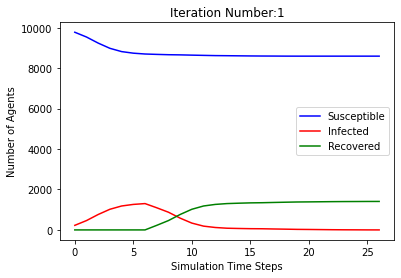

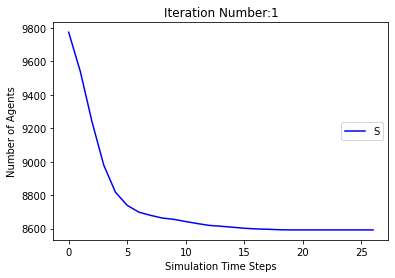

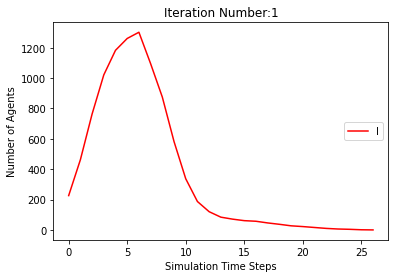

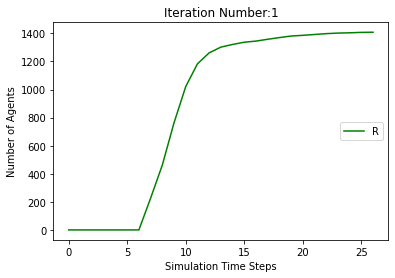

[9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645]
[226, 457, 737, 977, 1148, 1234, 1281, 1075, 864, 598, 363, 196, 116, 73, 54, 34, 20, 15, 11, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 457, 737, 977, 1148, 1234, 1281, 1301, 1321, 1335, 1340, 1344, 1350, 1354, 1355]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645]]
[[], [226, 462, 763, 1021, 1183, 1261, 1302, 1095, 875, 582, 337, 187, 120, 84, 71, 61, 57, 46, 37, 27, 22, 16, 10, 6, 4, 1, 0], [226, 457, 737, 977, 1148, 1234, 1281, 1075, 864, 598, 363, 196, 116, 73, 54, 34, 20, 15, 11, 5, 1, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 226, 462, 763, 1021, 1183, 1261, 1302, 1321, 1337, 1345, 1358, 1370, 1381, 1386, 1392, 1398, 

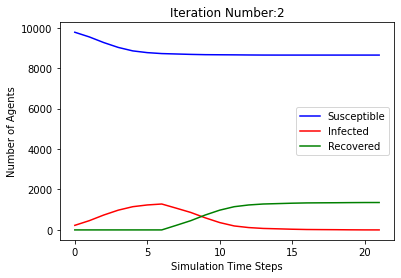

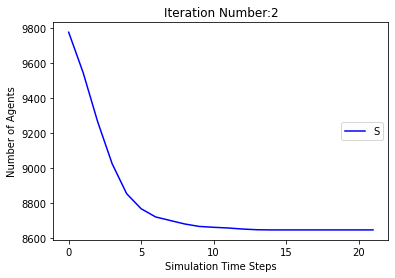

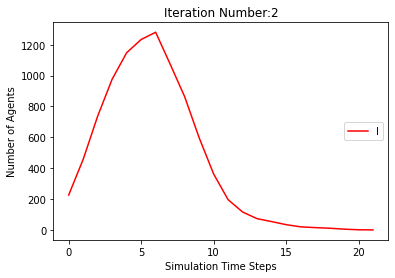

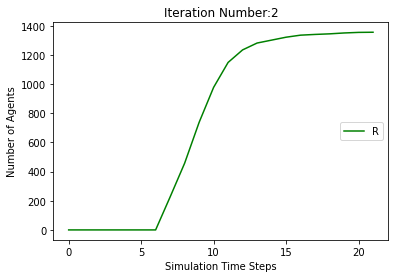

[9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533]
[226, 464, 776, 1036, 1191, 1270, 1316, 1122, 910, 614, 378, 241, 170, 136, 112, 90, 76, 53, 35, 27, 15, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 464, 776, 1036, 1191, 1270, 1316, 1348, 1374, 1390, 1414, 1432, 1440, 1452, 1460, 1464, 1466, 1467]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533]]
[[], [226, 462, 763, 1021, 1183, 1261, 1302, 1095, 875, 582, 337, 187, 120, 84, 71, 61, 57, 46, 37, 27, 22, 16, 10, 6, 4, 1, 0], [226, 457, 737, 977, 

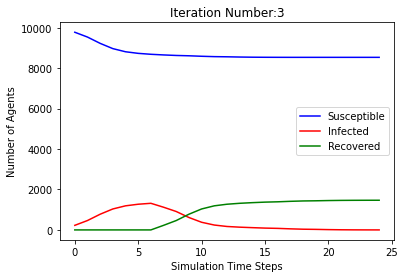

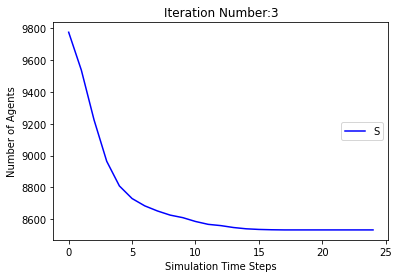

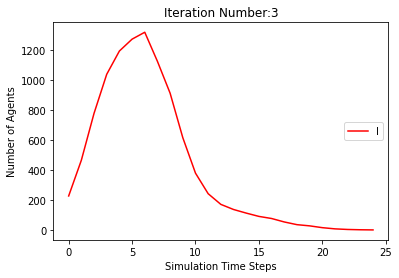

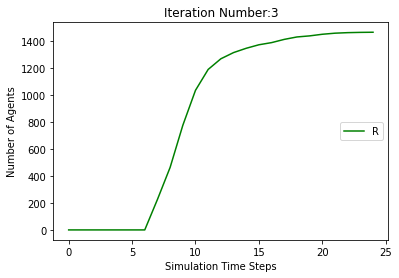

[9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597]
[226, 453, 723, 977, 1143, 1227, 1277, 1085, 889, 638, 393, 232, 158, 115, 85, 56, 39, 31, 27, 17, 10, 7, 5, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 453, 723, 977, 1143, 1227, 1277, 1311, 1342, 1361, 1370, 1375, 1385, 1392, 1396, 1398, 1400, 1401, 1402, 1402, 1402, 1403]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 86

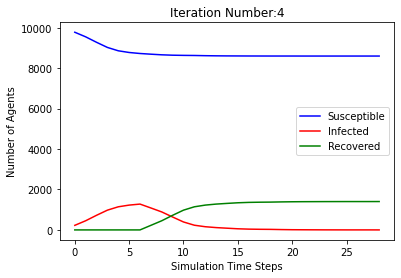

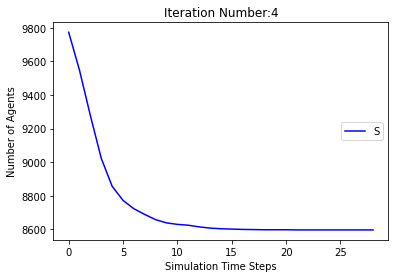

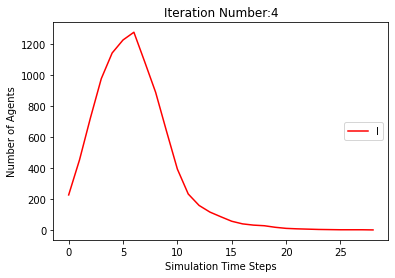

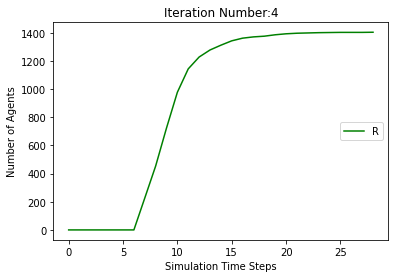

[9774, 9559, 9258, 9015, 8846, 8747, 8710, 8698, 8677, 8657, 8629, 8608, 8589, 8580, 8579, 8576, 8575, 8575, 8574, 8574, 8574, 8574, 8573, 8573, 8573, 8573, 8573, 8573, 8573, 8573]
[226, 441, 742, 985, 1154, 1253, 1290, 1076, 882, 601, 386, 238, 158, 130, 119, 101, 82, 54, 34, 15, 6, 5, 3, 2, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 441, 742, 985, 1154, 1253, 1290, 1302, 1323, 1343, 1371, 1392, 1411, 1420, 1421, 1424, 1425, 1425, 1426, 1426, 1426, 1426, 1427]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615

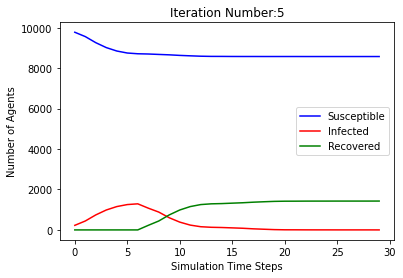

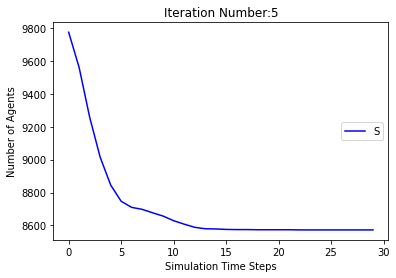

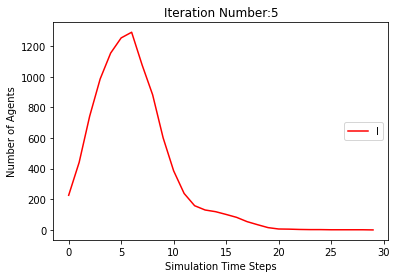

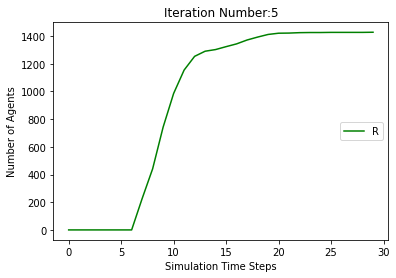

[9774, 9556, 9253, 9004, 8845, 8753, 8699, 8672, 8649, 8624, 8608, 8588, 8571, 8559, 8558, 8554, 8552, 8548, 8547, 8545, 8544, 8543, 8543, 8543, 8543, 8543, 8543, 8543, 8543]
[226, 444, 747, 996, 1155, 1247, 1301, 1102, 907, 629, 396, 257, 182, 140, 114, 95, 72, 60, 41, 26, 15, 15, 11, 9, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 444, 747, 996, 1155, 1247, 1301, 1328, 1351, 1376, 1392, 1412, 1429, 1441, 1442, 1446, 1448, 1452, 1453, 1455, 1456, 1457]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604,

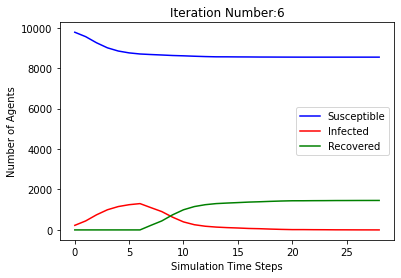

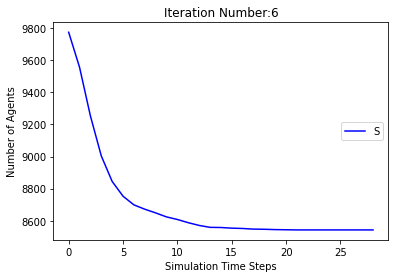

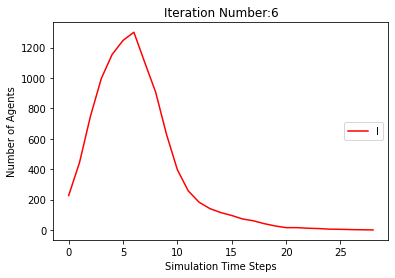

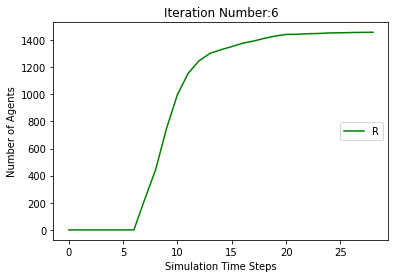

[9774, 9577, 9305, 9064, 8879, 8759, 8696, 8656, 8637, 8622, 8609, 8596, 8589, 8587, 8585, 8585, 8585, 8585, 8585, 8585, 8585, 8585]
[226, 423, 695, 936, 1121, 1241, 1304, 1118, 940, 683, 455, 283, 170, 109, 71, 52, 37, 24, 11, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 423, 695, 936, 1121, 1241, 1304, 1344, 1363, 1378, 1391, 1404, 1411, 1413, 1415]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597], [9774, 9559, 9258, 9015,

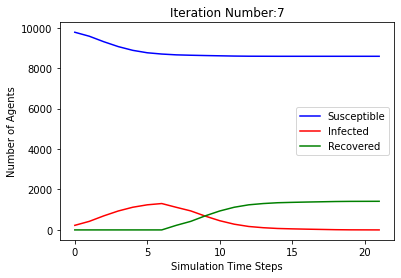

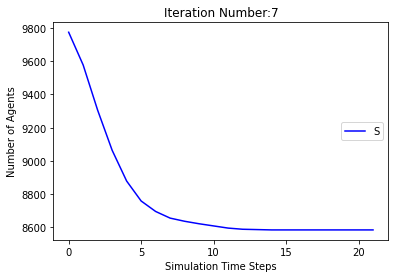

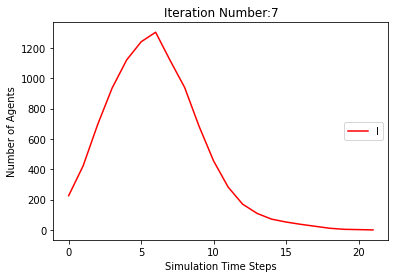

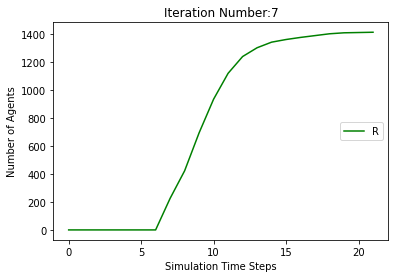

[9774, 9531, 9215, 8966, 8806, 8735, 8696, 8672, 8660, 8642, 8621, 8610, 8602, 8598, 8595, 8595, 8592, 8589, 8587, 8585, 8584, 8581, 8581, 8581, 8581, 8581, 8581, 8581, 8581]
[226, 469, 785, 1034, 1194, 1265, 1304, 1102, 871, 573, 345, 196, 133, 98, 77, 65, 50, 32, 23, 17, 14, 14, 14, 11, 8, 6, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 469, 785, 1034, 1194, 1265, 1304, 1328, 1340, 1358, 1379, 1390, 1398, 1402, 1405, 1405, 1408, 1411, 1413, 1415, 1416, 1419]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604

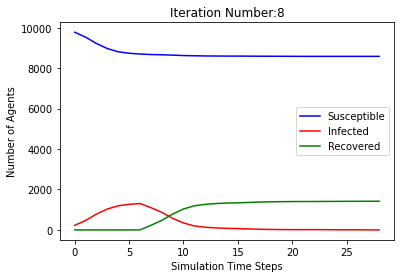

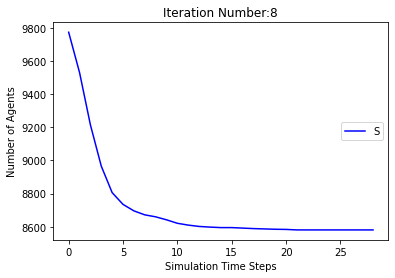

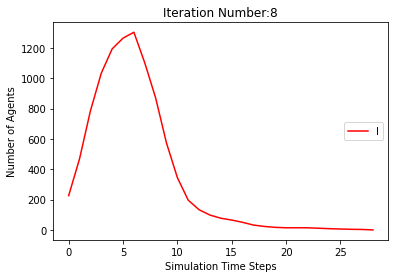

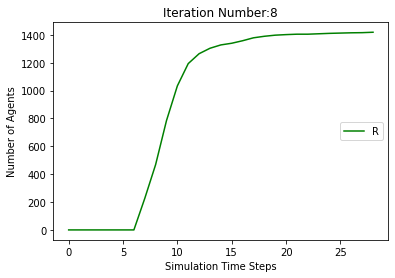

[9774, 9544, 9250, 8991, 8832, 8739, 8694, 8651, 8620, 8593, 8570, 8554, 8535, 8525, 8513, 8508, 8502, 8494, 8491, 8491, 8490, 8489, 8489, 8489, 8489, 8489, 8489, 8489, 8489]
[226, 456, 750, 1009, 1168, 1261, 1306, 1123, 924, 657, 421, 278, 204, 169, 138, 112, 91, 76, 63, 44, 35, 24, 19, 13, 5, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 456, 750, 1009, 1168, 1261, 1306, 1349, 1380, 1407, 1430, 1446, 1465, 1475, 1487, 1492, 1498, 1506, 1509, 1509, 1510, 1511]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8

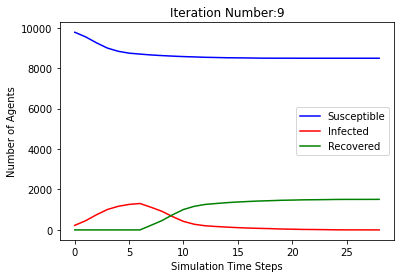

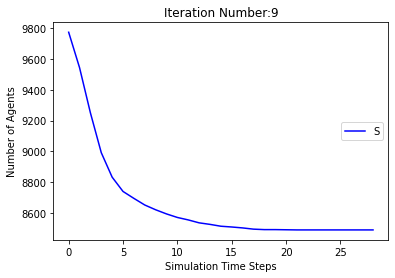

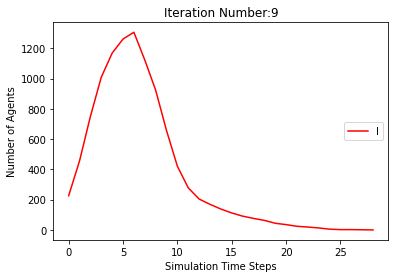

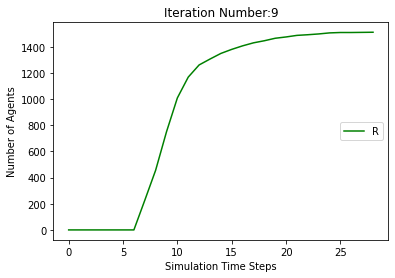

[9774, 9555, 9276, 8990, 8828, 8757, 8723, 8696, 8677, 8668, 8658, 8646, 8639, 8635, 8632, 8629, 8623, 8622, 8622, 8622, 8622, 8622, 8622, 8622, 8622]
[226, 445, 724, 1010, 1172, 1243, 1277, 1078, 878, 608, 332, 182, 118, 88, 64, 48, 45, 36, 24, 17, 13, 10, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 445, 724, 1010, 1172, 1243, 1277, 1304, 1323, 1332, 1342, 1354, 1361, 1365, 1368, 1371, 1377, 1378]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 

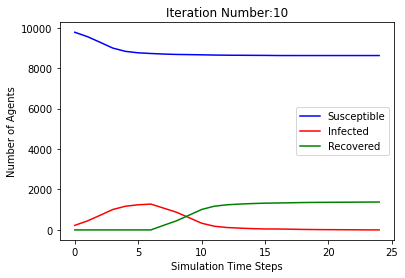

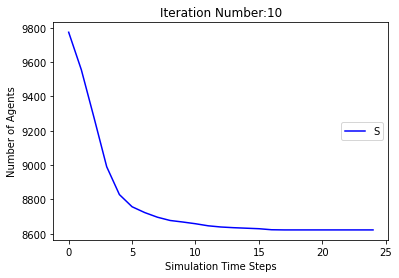

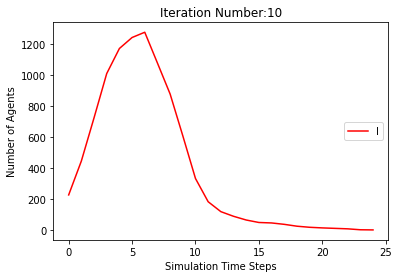

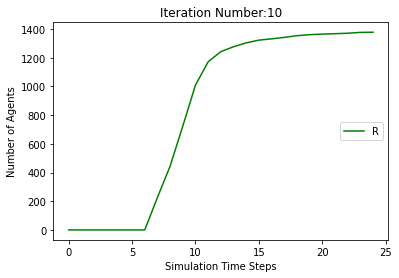

[9774, 9557, 9253, 8966, 8794, 8727, 8692, 8665, 8634, 8606, 8579, 8570, 8561, 8555, 8549, 8546, 8541, 8539, 8538, 8537, 8537, 8537, 8536, 8536, 8536, 8536, 8536, 8535, 8535, 8535, 8532, 8531, 8530, 8529, 8529, 8529, 8529, 8529, 8529, 8529, 8529]
[226, 443, 747, 1034, 1206, 1273, 1308, 1109, 923, 647, 387, 224, 166, 137, 116, 88, 65, 40, 32, 24, 18, 12, 10, 5, 3, 2, 1, 2, 2, 1, 4, 5, 6, 7, 6, 6, 6, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 443, 747, 1034, 1206, 1273, 1308, 1335, 1366, 1394, 1421, 1430, 1439, 1445, 1451, 1454, 1459, 1461, 1462, 1463, 1463, 1463, 1464, 1464, 1464, 1464, 1464, 1465, 1465, 1465, 1468, 1469, 1470, 1471]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610,

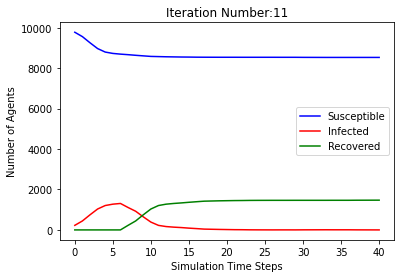

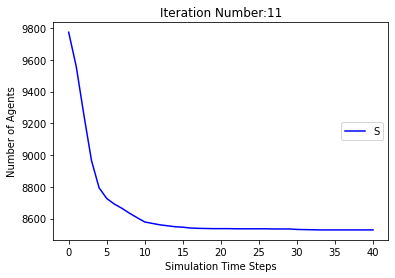

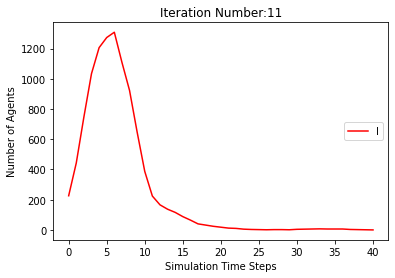

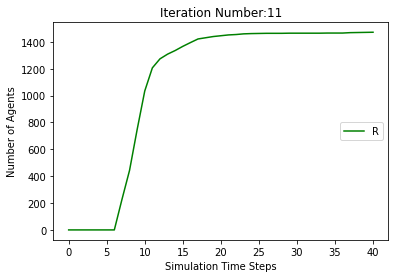

[9774, 9555, 9287, 9045, 8865, 8759, 8708, 8677, 8656, 8639, 8617, 8590, 8575, 8563, 8558, 8550, 8547, 8546, 8543, 8543, 8543, 8543, 8543, 8543, 8543, 8543]
[226, 445, 713, 955, 1135, 1241, 1292, 1097, 899, 648, 428, 275, 184, 145, 119, 106, 92, 71, 47, 32, 20, 15, 7, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 445, 713, 955, 1135, 1241, 1292, 1323, 1344, 1361, 1383, 1410, 1425, 1437, 1442, 1450, 1453, 1454, 1457]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 85

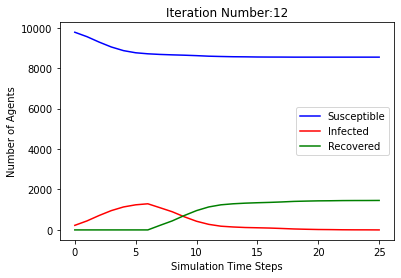

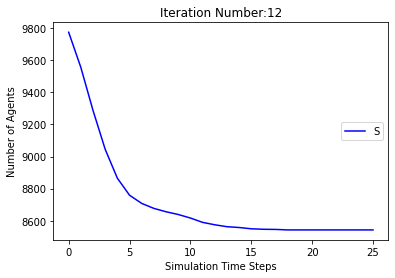

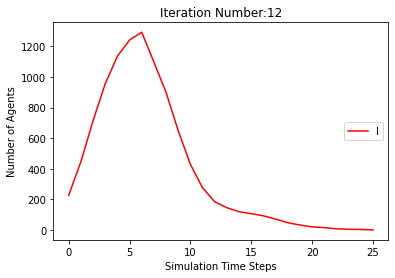

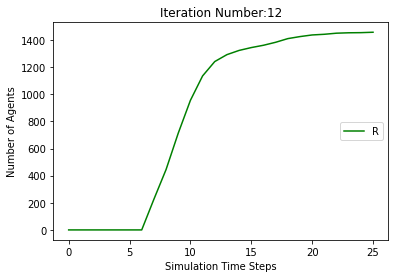

[9774, 9528, 9248, 8981, 8802, 8733, 8702, 8688, 8669, 8661, 8649, 8643, 8636, 8629, 8624, 8621, 8618, 8618, 8618, 8618, 8618, 8618, 8618, 8618]
[226, 472, 752, 1019, 1198, 1267, 1298, 1086, 859, 587, 332, 159, 97, 73, 64, 48, 43, 31, 25, 18, 11, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 472, 752, 1019, 1198, 1267, 1298, 1312, 1331, 1339, 1351, 1357, 1364, 1371, 1376, 1379, 1382]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597,

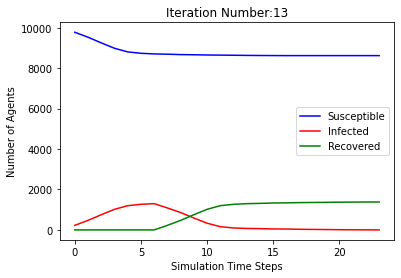

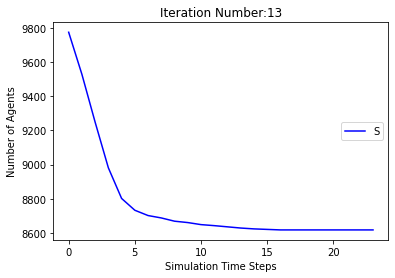

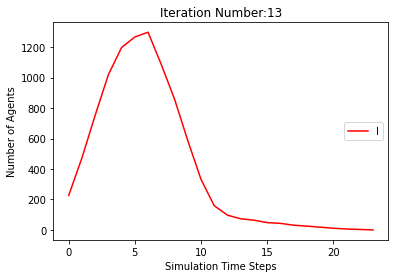

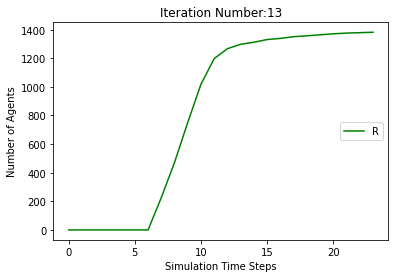

[9774, 9560, 9283, 8991, 8824, 8748, 8703, 8658, 8625, 8593, 8571, 8560, 8552, 8546, 8540, 8538, 8534, 8534, 8533, 8531, 8531, 8530, 8530, 8530, 8530, 8530, 8530, 8530, 8530]
[226, 440, 717, 1009, 1176, 1252, 1297, 1116, 935, 690, 420, 264, 196, 157, 118, 87, 59, 37, 27, 21, 15, 10, 8, 4, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 440, 717, 1009, 1176, 1252, 1297, 1342, 1375, 1407, 1429, 1440, 1448, 1454, 1460, 1462, 1466, 1466, 1467, 1469, 1469, 1470]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604

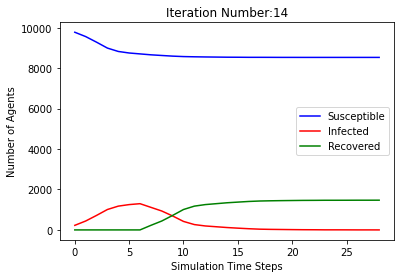

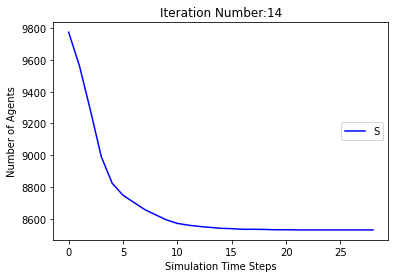

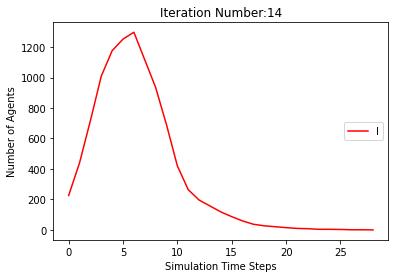

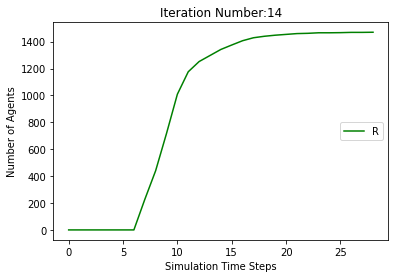

[9774, 9557, 9278, 9021, 8819, 8724, 8677, 8643, 8613, 8591, 8573, 8553, 8538, 8530, 8524, 8523, 8523, 8519, 8517, 8517, 8517, 8517, 8517, 8517, 8517, 8517]
[226, 443, 722, 979, 1181, 1276, 1323, 1131, 944, 687, 448, 266, 186, 147, 119, 90, 68, 54, 36, 21, 13, 7, 6, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 443, 722, 979, 1181, 1276, 1323, 1357, 1387, 1409, 1427, 1447, 1462, 1470, 1476, 1477, 1477, 1481, 1483]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597

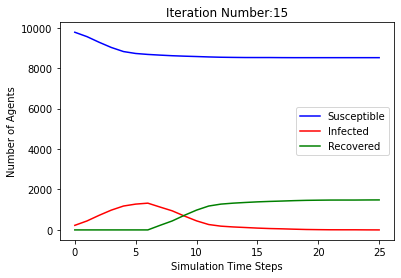

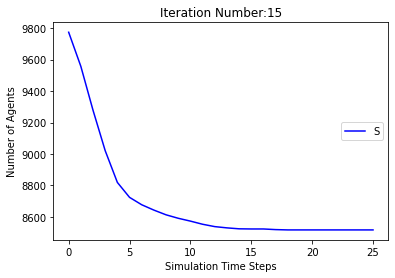

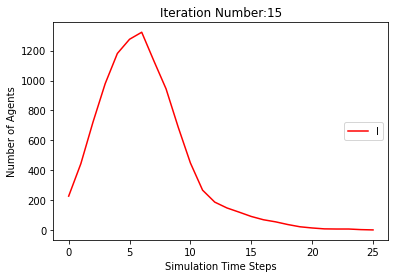

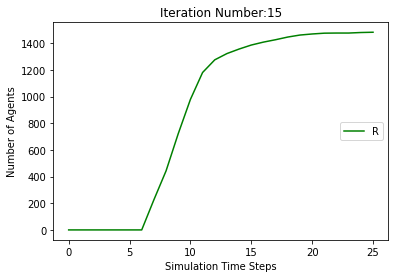

[9774, 9552, 9240, 8985, 8807, 8732, 8694, 8673, 8657, 8637, 8623, 8607, 8592, 8583, 8574, 8565, 8559, 8554, 8553, 8551, 8548, 8548, 8548, 8548, 8547, 8546, 8546, 8546, 8546, 8546, 8546, 8546, 8546]
[226, 448, 760, 1015, 1193, 1268, 1306, 1101, 895, 603, 362, 200, 140, 111, 99, 92, 78, 69, 54, 41, 35, 26, 17, 11, 7, 7, 5, 2, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 448, 760, 1015, 1193, 1268, 1306, 1327, 1343, 1363, 1377, 1393, 1408, 1417, 1426, 1435, 1441, 1446, 1447, 1449, 1452, 1452, 1452, 1452, 1453, 1454]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 885

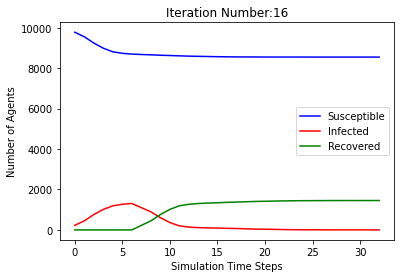

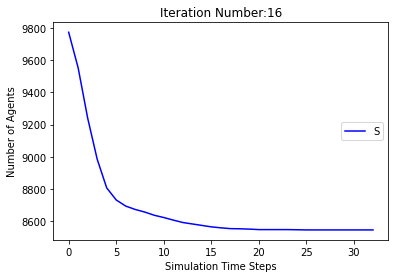

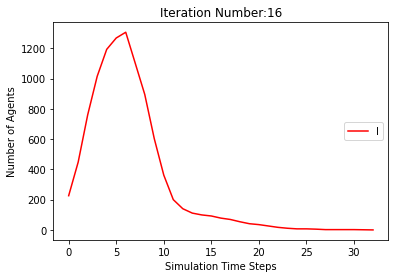

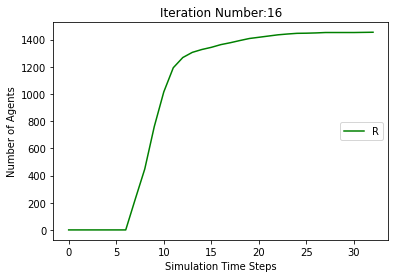

[9774, 9557, 9272, 9029, 8862, 8767, 8712, 8681, 8654, 8626, 8599, 8584, 8572, 8563, 8558, 8555, 8554, 8552, 8552, 8548, 8545, 8543, 8542, 8542, 8542, 8541, 8541, 8541, 8541, 8541, 8541, 8541, 8541]
[226, 443, 728, 971, 1138, 1233, 1288, 1093, 903, 646, 430, 278, 195, 149, 123, 99, 72, 47, 32, 24, 18, 15, 13, 12, 10, 11, 7, 4, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 443, 728, 971, 1138, 1233, 1288, 1319, 1346, 1374, 1401, 1416, 1428, 1437, 1442, 1445, 1446, 1448, 1448, 1452, 1455, 1457, 1458, 1458, 1458, 1459]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 88

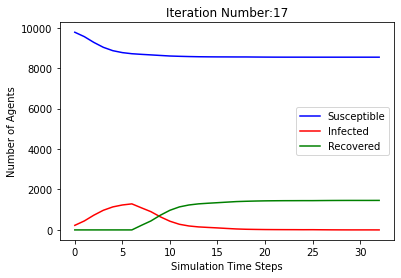

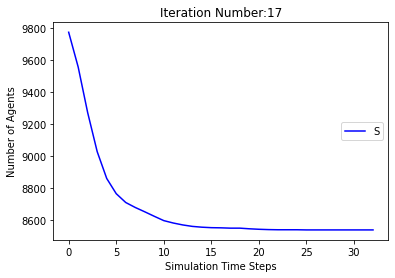

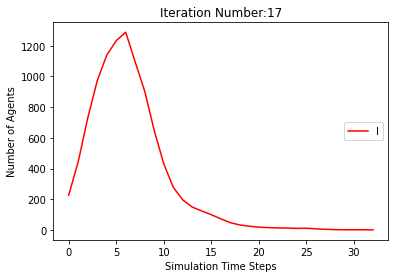

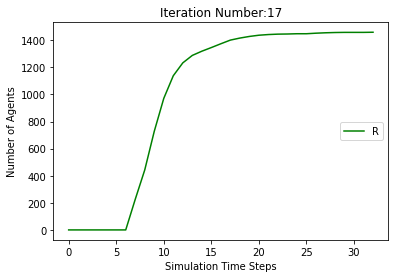

[9774, 9539, 9260, 9015, 8826, 8730, 8669, 8634, 8601, 8580, 8555, 8536, 8524, 8509, 8506, 8501, 8497, 8490, 8489, 8488, 8488, 8488, 8488, 8488, 8488, 8488, 8488]
[226, 461, 740, 985, 1174, 1270, 1331, 1140, 938, 680, 460, 290, 206, 160, 128, 100, 83, 65, 47, 36, 21, 18, 13, 9, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 461, 740, 985, 1174, 1270, 1331, 1366, 1399, 1420, 1445, 1464, 1476, 1491, 1494, 1499, 1503, 1510, 1511, 1512]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598

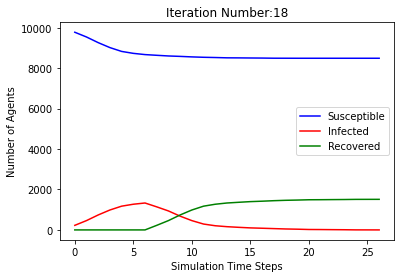

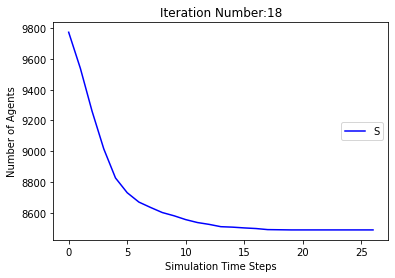

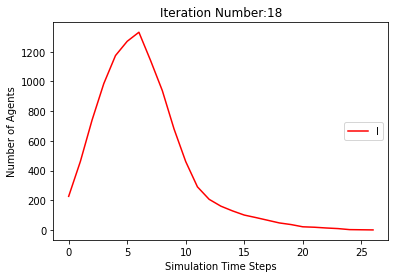

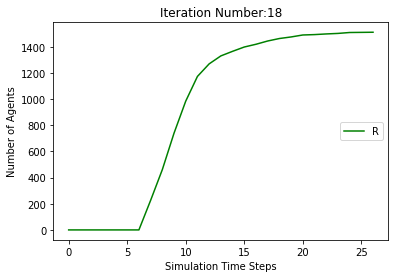

[9774, 9570, 9287, 9027, 8857, 8753, 8696, 8652, 8626, 8605, 8591, 8583, 8578, 8574, 8570, 8566, 8564, 8563, 8563, 8563, 8563, 8563, 8563, 8563, 8563]
[226, 430, 713, 973, 1143, 1247, 1304, 1122, 944, 682, 436, 274, 175, 122, 82, 60, 41, 28, 20, 15, 11, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 430, 713, 973, 1143, 1247, 1304, 1348, 1374, 1395, 1409, 1417, 1422, 1426, 1430, 1434, 1436, 1437]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 85

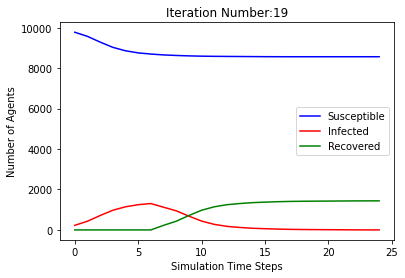

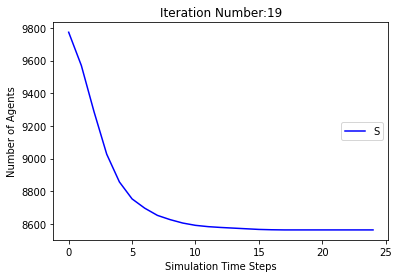

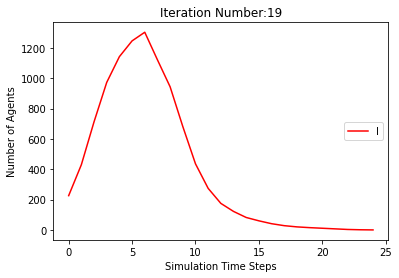

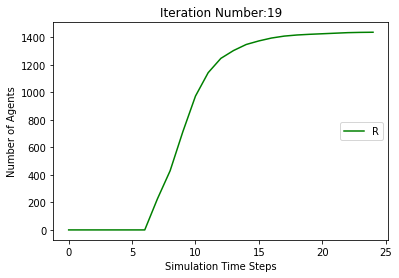

[9774, 9558, 9271, 9025, 8843, 8735, 8680, 8658, 8638, 8612, 8595, 8572, 8559, 8551, 8548, 8546, 8543, 8535, 8533, 8533, 8533, 8533, 8533, 8533, 8532, 8530, 8529, 8529, 8529, 8529, 8529, 8529, 8529, 8529]
[226, 442, 729, 975, 1157, 1265, 1320, 1116, 920, 659, 430, 271, 176, 129, 110, 92, 69, 60, 39, 26, 18, 15, 13, 10, 3, 3, 4, 4, 4, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 442, 729, 975, 1157, 1265, 1320, 1342, 1362, 1388, 1405, 1428, 1441, 1449, 1452, 1454, 1457, 1465, 1467, 1467, 1467, 1467, 1467, 1467, 1468, 1470, 1471]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9

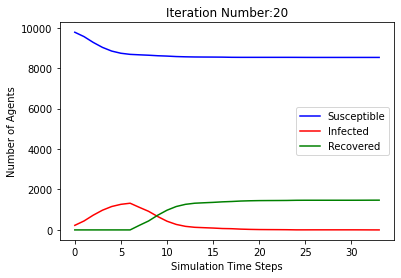

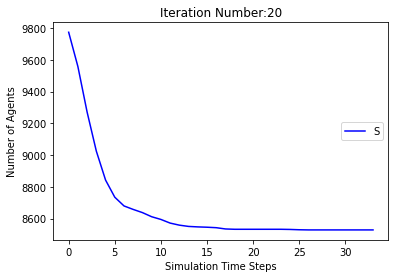

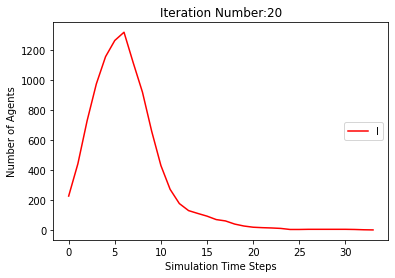

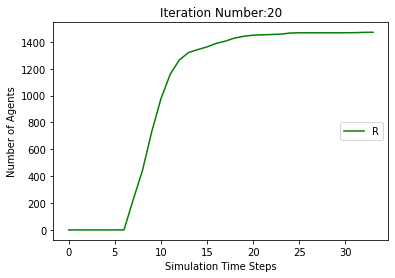

[9774, 9552, 9257, 8998, 8834, 8744, 8694, 8659, 8632, 8618, 8600, 8573, 8558, 8546, 8541, 8539, 8539, 8539, 8539, 8539, 8539, 8539, 8539]
[226, 448, 743, 1002, 1166, 1256, 1306, 1115, 920, 639, 398, 261, 186, 148, 118, 93, 79, 61, 34, 19, 7, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 448, 743, 1002, 1166, 1256, 1306, 1341, 1368, 1382, 1400, 1427, 1442, 1454, 1459, 1461]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597], [9774

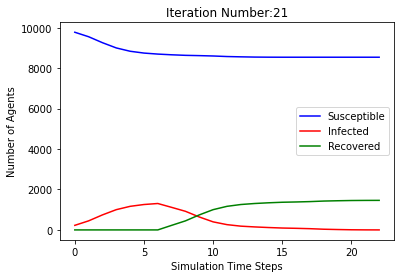

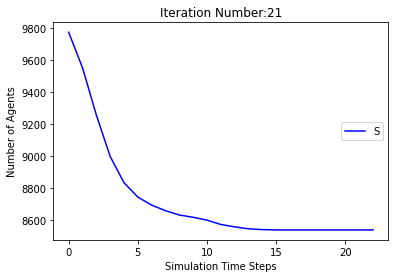

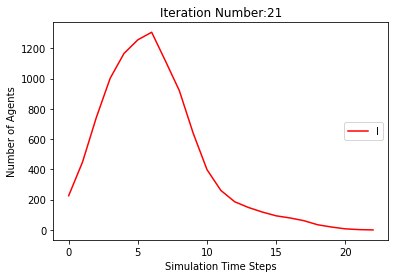

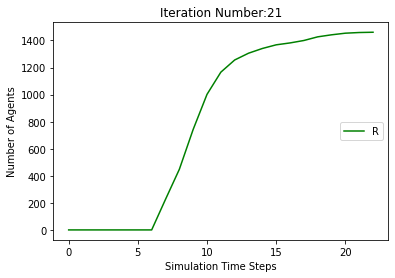

[9774, 9558, 9253, 8996, 8819, 8728, 8694, 8676, 8661, 8648, 8641, 8634, 8626, 8616, 8612, 8609, 8608, 8602, 8600, 8598, 8598, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8596, 8596, 8596, 8596, 8596, 8596, 8596, 8596]
[226, 442, 747, 1004, 1181, 1272, 1306, 1098, 897, 605, 355, 185, 102, 78, 64, 52, 40, 39, 34, 28, 18, 14, 11, 10, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 442, 747, 1004, 1181, 1272, 1306, 1324, 1339, 1352, 1359, 1366, 1374, 1384, 1388, 1391, 1392, 1398, 1400, 1402, 1402, 1402, 1402, 1402, 1403, 1403, 1403, 1403, 1403, 1403, 1403, 1404]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 

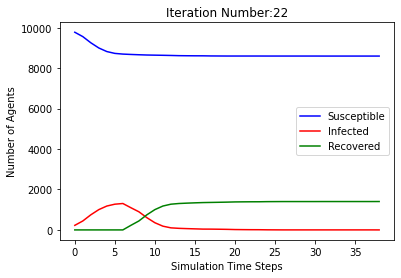

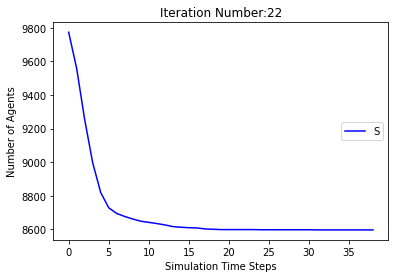

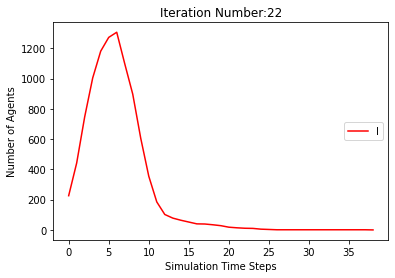

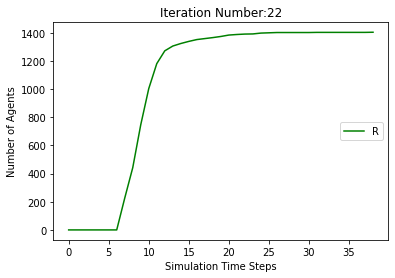

[9774, 9541, 9254, 8995, 8835, 8736, 8689, 8658, 8636, 8611, 8595, 8578, 8571, 8563, 8560, 8558, 8557, 8557, 8556, 8556, 8556, 8556, 8556, 8556, 8556, 8556]
[226, 459, 746, 1005, 1165, 1264, 1311, 1116, 905, 643, 400, 257, 165, 126, 98, 78, 54, 38, 22, 15, 7, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 459, 746, 1005, 1165, 1264, 1311, 1342, 1364, 1389, 1405, 1422, 1429, 1437, 1440, 1442, 1443, 1443, 1444]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597

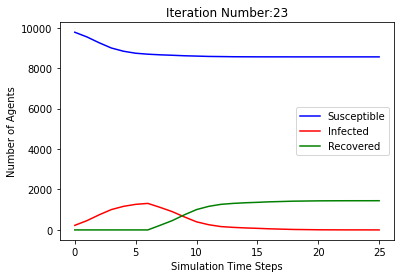

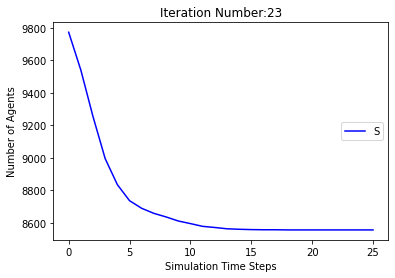

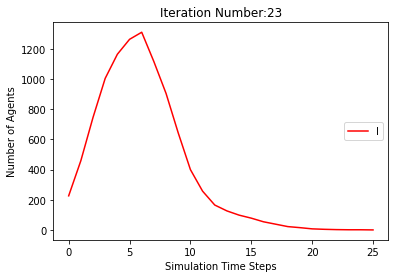

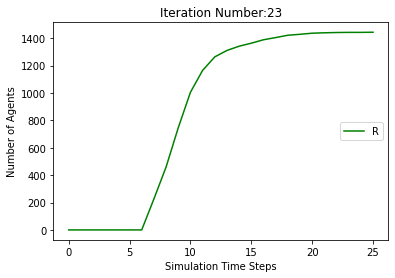

[9774, 9565, 9290, 9028, 8840, 8754, 8694, 8657, 8630, 8605, 8585, 8565, 8546, 8532, 8519, 8512, 8510, 8509, 8507, 8505, 8505, 8505, 8505, 8505, 8505, 8505, 8505]
[226, 435, 710, 972, 1160, 1246, 1306, 1117, 935, 685, 443, 275, 208, 162, 138, 118, 95, 76, 58, 41, 27, 14, 7, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 435, 710, 972, 1160, 1246, 1306, 1343, 1370, 1395, 1415, 1435, 1454, 1468, 1481, 1488, 1490, 1491, 1493, 1495]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598,

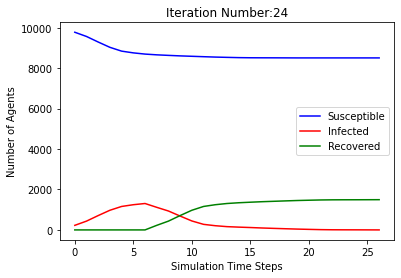

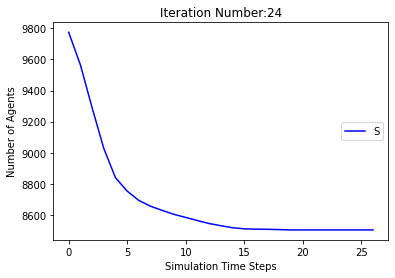

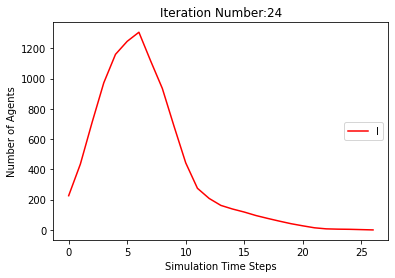

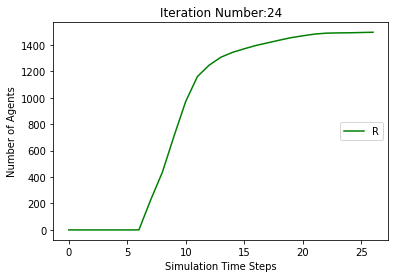

[9774, 9566, 9279, 9004, 8849, 8752, 8710, 8694, 8673, 8656, 8636, 8625, 8616, 8604, 8602, 8598, 8598, 8596, 8595, 8593, 8589, 8589, 8589, 8589, 8588, 8588, 8588, 8588, 8588, 8588, 8588, 8588]
[226, 434, 721, 996, 1151, 1248, 1290, 1080, 893, 623, 368, 224, 136, 106, 92, 75, 58, 40, 30, 23, 15, 13, 9, 9, 8, 7, 5, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 434, 721, 996, 1151, 1248, 1290, 1306, 1327, 1344, 1364, 1375, 1384, 1396, 1398, 1402, 1402, 1404, 1405, 1407, 1411, 1411, 1411, 1411, 1412]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689

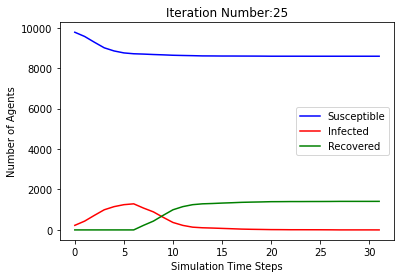

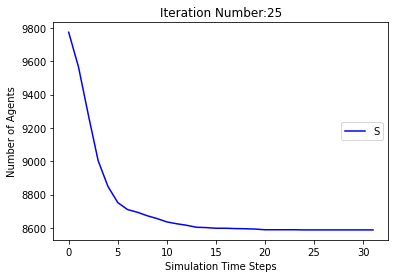

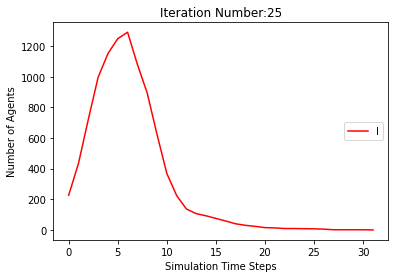

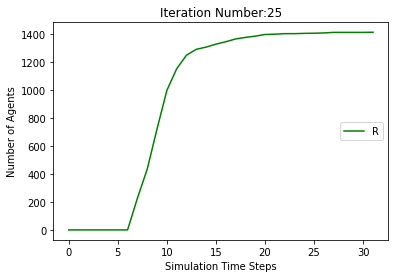

[9774, 9550, 9270, 9026, 8851, 8768, 8716, 8685, 8670, 8652, 8641, 8632, 8627, 8623, 8621, 8618, 8616, 8615, 8615, 8613, 8613, 8613, 8613, 8613, 8613, 8611, 8609, 8605, 8605, 8605, 8605, 8605, 8605, 8605, 8605]
[226, 450, 730, 974, 1149, 1232, 1284, 1089, 880, 618, 385, 219, 141, 93, 64, 52, 36, 26, 17, 14, 10, 8, 5, 3, 2, 4, 4, 8, 8, 8, 8, 8, 6, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 450, 730, 974, 1149, 1232, 1284, 1315, 1330, 1348, 1359, 1368, 1373, 1377, 1379, 1382, 1384, 1385, 1385, 1387, 1387, 1387, 1387, 1387, 1387, 1389, 1391, 1395]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [977

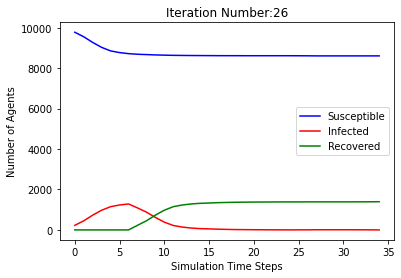

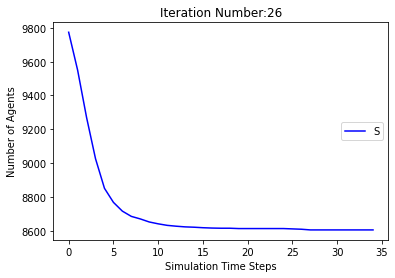

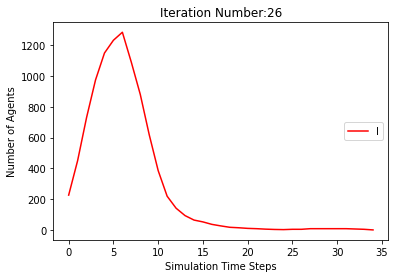

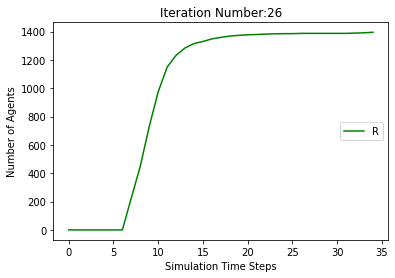

[9774, 9567, 9297, 9018, 8836, 8749, 8693, 8666, 8646, 8622, 8596, 8583, 8571, 8557, 8548, 8542, 8540, 8540, 8540, 8540, 8540, 8540, 8540, 8540]
[226, 433, 703, 982, 1164, 1251, 1307, 1108, 921, 675, 422, 253, 178, 136, 118, 104, 82, 56, 43, 31, 17, 8, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 433, 703, 982, 1164, 1251, 1307, 1334, 1354, 1378, 1404, 1417, 1429, 1443, 1452, 1458, 1460]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 859

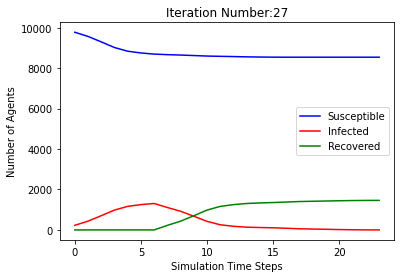

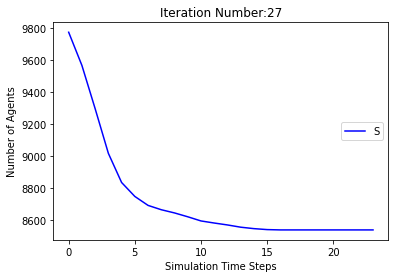

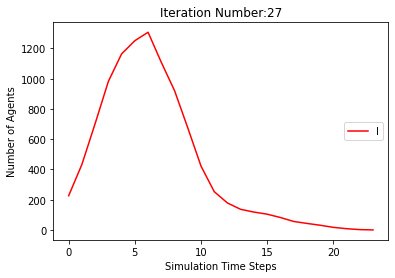

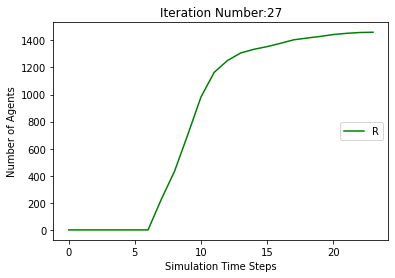

[9774, 9549, 9253, 9011, 8849, 8771, 8724, 8691, 8670, 8649, 8628, 8610, 8594, 8587, 8583, 8578, 8574, 8571, 8567, 8563, 8557, 8556, 8556, 8556, 8556, 8556, 8556, 8556, 8556]
[226, 451, 747, 989, 1151, 1229, 1276, 1083, 879, 604, 383, 239, 177, 137, 108, 92, 75, 57, 43, 31, 30, 27, 22, 18, 15, 11, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 451, 747, 989, 1151, 1229, 1276, 1309, 1330, 1351, 1372, 1390, 1406, 1413, 1417, 1422, 1426, 1429, 1433, 1437, 1443, 1444]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 86

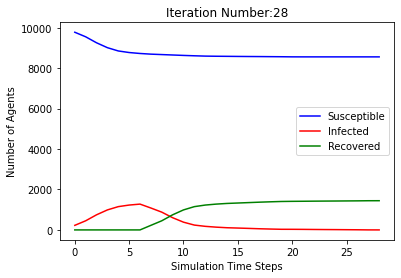

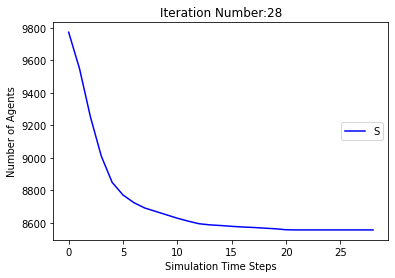

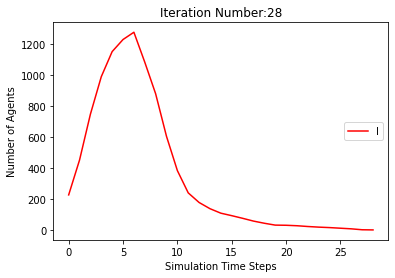

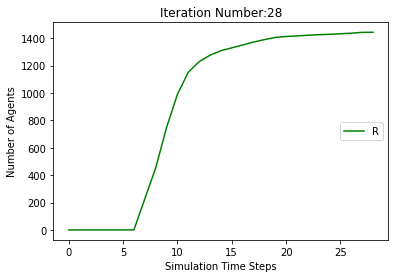

[9774, 9550, 9267, 9035, 8857, 8758, 8701, 8677, 8652, 8628, 8606, 8588, 8572, 8563, 8559, 8554, 8552, 8549, 8549, 8549, 8547, 8546, 8544, 8543, 8543, 8543, 8543, 8543, 8543, 8543, 8543]
[226, 450, 733, 965, 1143, 1242, 1299, 1097, 898, 639, 429, 269, 186, 138, 118, 98, 76, 57, 39, 23, 16, 13, 10, 9, 6, 6, 6, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 450, 733, 965, 1143, 1242, 1299, 1323, 1348, 1372, 1394, 1412, 1428, 1437, 1441, 1446, 1448, 1451, 1451, 1451, 1453, 1454, 1456, 1457]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639,

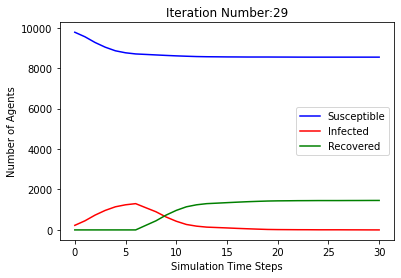

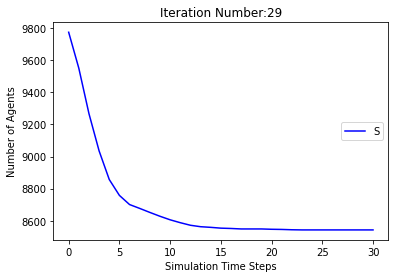

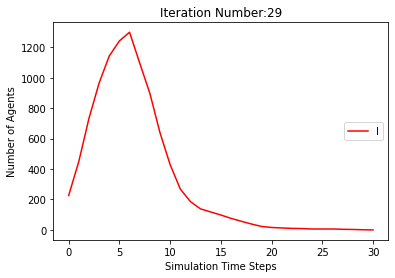

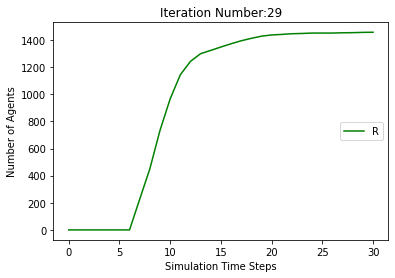

[9774, 9547, 9246, 8971, 8798, 8715, 8671, 8636, 8611, 8596, 8583, 8576, 8569, 8564, 8561, 8558, 8555, 8555, 8555, 8555, 8555, 8555, 8555, 8555]
[226, 453, 754, 1029, 1202, 1285, 1329, 1138, 936, 650, 388, 222, 146, 107, 75, 53, 41, 28, 21, 14, 9, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 453, 754, 1029, 1202, 1285, 1329, 1364, 1389, 1404, 1417, 1424, 1431, 1436, 1439, 1442, 1445]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597

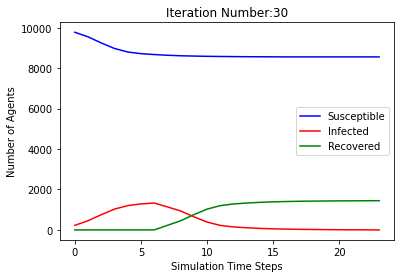

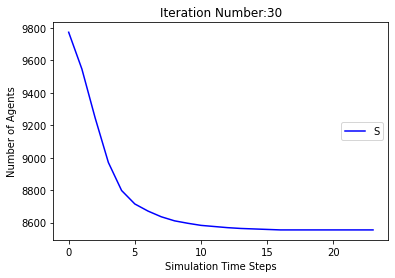

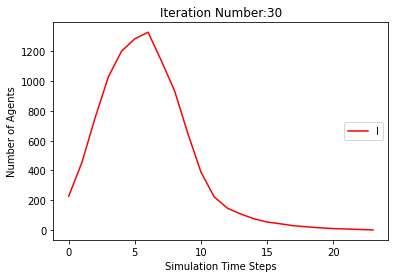

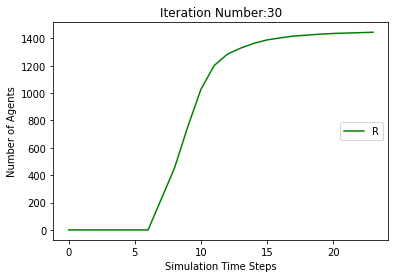

[9774, 9558, 9261, 8995, 8850, 8765, 8717, 8682, 8653, 8619, 8586, 8561, 8549, 8545, 8538, 8534, 8532, 8532, 8532, 8532, 8531, 8530, 8527, 8526, 8524, 8521, 8520, 8520, 8519, 8518, 8517, 8516, 8515, 8514, 8514, 8513, 8513, 8513, 8513, 8513, 8513, 8513, 8513]
[226, 442, 739, 1005, 1150, 1235, 1283, 1092, 905, 642, 409, 289, 216, 172, 144, 119, 87, 54, 29, 17, 14, 8, 7, 6, 8, 11, 12, 11, 11, 9, 9, 8, 6, 6, 6, 6, 5, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 442, 739, 1005, 1150, 1235, 1283, 1318, 1347, 1381, 1414, 1439, 1451, 1455, 1462, 1466, 1468, 1468, 1468, 1468, 1469, 1470, 1473, 1474, 1476, 1479, 1480, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1486, 1487]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 88

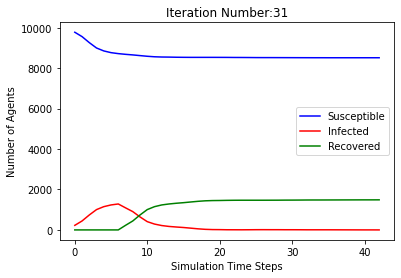

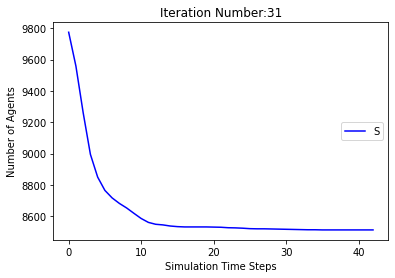

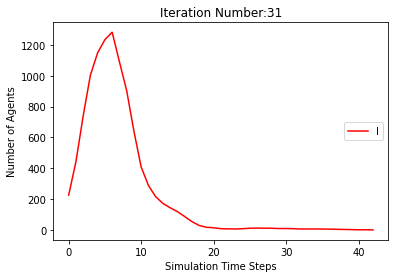

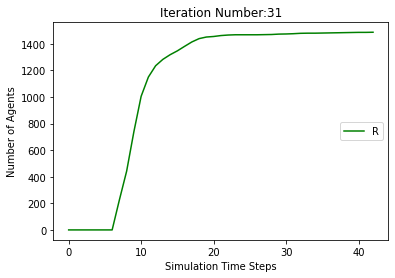

[9774, 9564, 9280, 9025, 8859, 8775, 8727, 8677, 8646, 8627, 8605, 8588, 8573, 8558, 8550, 8542, 8537, 8533, 8530, 8526, 8524, 8521, 8520, 8520, 8518, 8516, 8515, 8515, 8515, 8515, 8515, 8515, 8515, 8515]
[226, 436, 720, 975, 1141, 1225, 1273, 1097, 918, 653, 420, 271, 202, 169, 127, 104, 90, 72, 58, 47, 34, 29, 22, 17, 15, 14, 11, 9, 6, 5, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 436, 720, 975, 1141, 1225, 1273, 1323, 1354, 1373, 1395, 1412, 1427, 1442, 1450, 1458, 1463, 1467, 1470, 1474, 1476, 1479, 1480, 1480, 1482, 1484, 1485]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 954

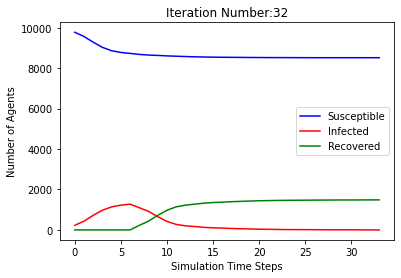

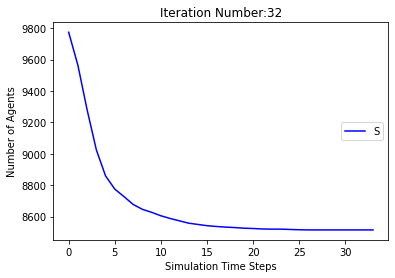

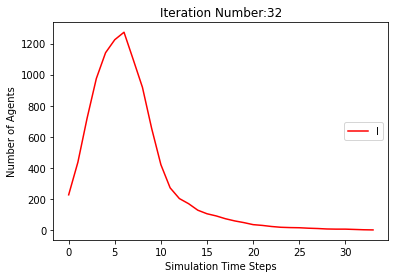

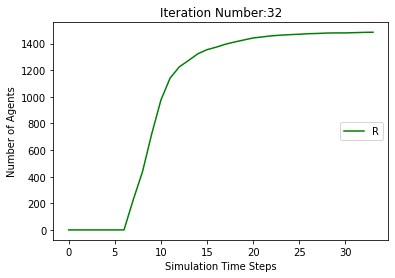

[9774, 9549, 9257, 9009, 8841, 8734, 8682, 8653, 8635, 8615, 8599, 8589, 8576, 8571, 8568, 8565, 8563, 8561, 8559, 8557, 8556, 8556, 8556, 8556, 8556, 8556, 8556, 8556]
[226, 451, 743, 991, 1159, 1266, 1318, 1121, 914, 642, 410, 252, 158, 111, 85, 70, 52, 38, 30, 19, 15, 12, 9, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 451, 743, 991, 1159, 1266, 1318, 1347, 1365, 1385, 1401, 1411, 1424, 1429, 1432, 1435, 1437, 1439, 1441, 1443, 1444]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599

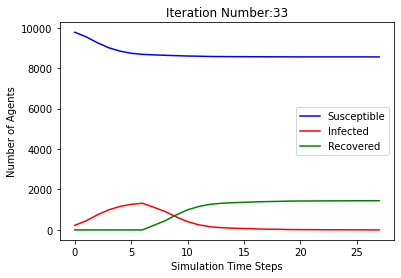

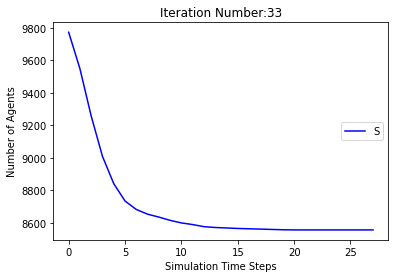

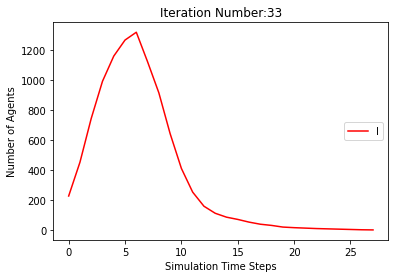

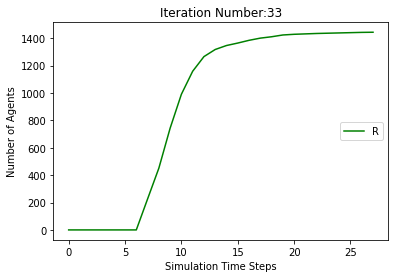

[9774, 9558, 9254, 9004, 8848, 8764, 8719, 8688, 8668, 8646, 8628, 8616, 8607, 8593, 8589, 8582, 8574, 8564, 8560, 8560, 8560, 8560, 8560, 8559, 8557, 8554, 8553, 8550, 8550, 8550, 8550, 8550, 8550, 8550, 8550]
[226, 442, 746, 996, 1152, 1236, 1281, 1086, 890, 608, 376, 232, 157, 126, 99, 86, 72, 64, 56, 47, 33, 29, 22, 15, 7, 6, 7, 10, 10, 10, 9, 7, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 442, 746, 996, 1152, 1236, 1281, 1312, 1332, 1354, 1372, 1384, 1393, 1407, 1411, 1418, 1426, 1436, 1440, 1440, 1440, 1440, 1440, 1441, 1443, 1446, 1447, 1450]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533

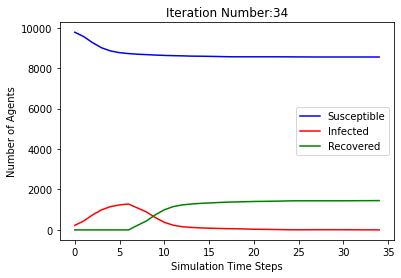

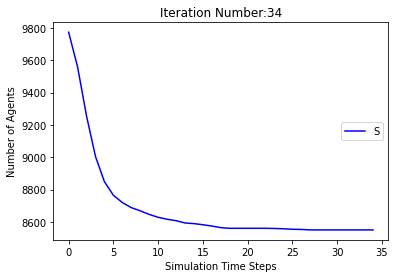

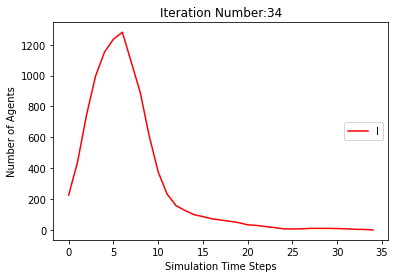

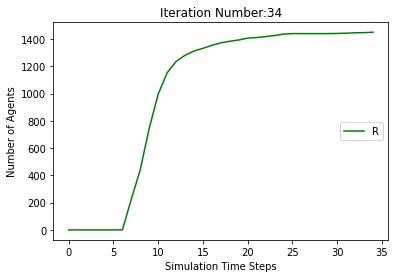

[9774, 9545, 9249, 8979, 8821, 8723, 8661, 8623, 8600, 8582, 8559, 8542, 8523, 8513, 8502, 8496, 8493, 8492, 8491, 8490, 8489, 8489, 8487, 8486, 8486, 8486, 8486, 8486, 8486, 8486, 8486]
[226, 455, 751, 1021, 1179, 1277, 1339, 1151, 945, 667, 420, 279, 200, 148, 121, 104, 89, 67, 51, 33, 24, 13, 9, 7, 6, 5, 4, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 455, 751, 1021, 1179, 1277, 1339, 1377, 1400, 1418, 1441, 1458, 1477, 1487, 1498, 1504, 1507, 1508, 1509, 1510, 1511, 1511, 1513, 1514]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 863

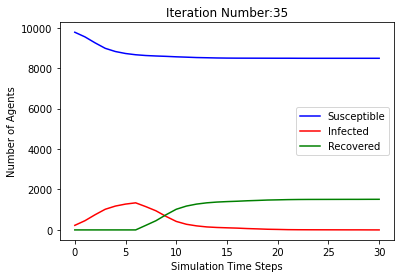

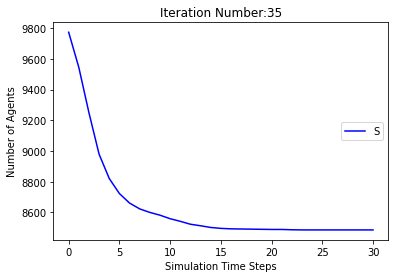

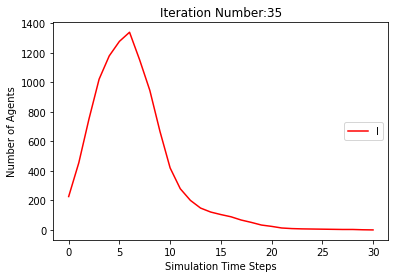

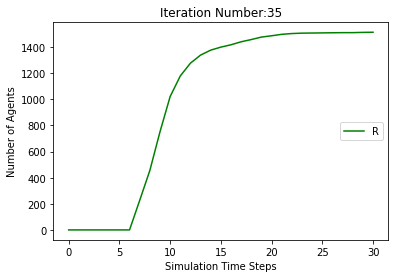

[9774, 9554, 9279, 9010, 8831, 8737, 8694, 8659, 8625, 8592, 8571, 8548, 8531, 8520, 8511, 8503, 8495, 8487, 8484, 8481, 8480, 8477, 8476, 8476, 8476, 8476, 8476, 8476, 8476, 8476]
[226, 446, 721, 990, 1169, 1263, 1306, 1115, 929, 687, 439, 283, 206, 174, 148, 122, 97, 84, 64, 50, 40, 34, 27, 19, 11, 8, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 446, 721, 990, 1169, 1263, 1306, 1341, 1375, 1408, 1429, 1452, 1469, 1480, 1489, 1497, 1505, 1513, 1516, 1519, 1520, 1523, 1524]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625,

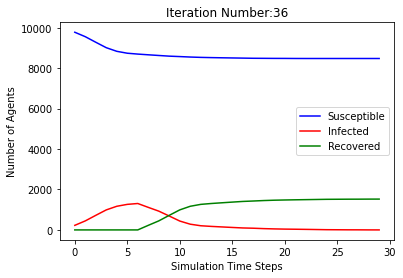

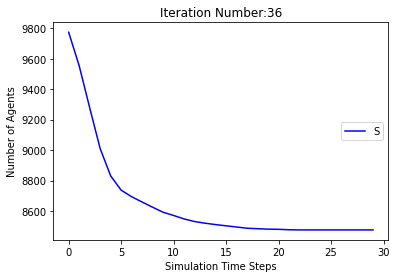

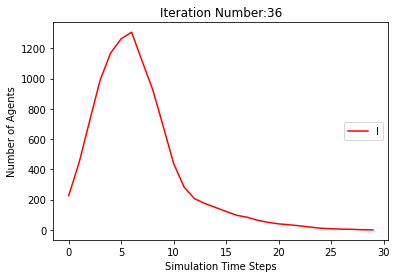

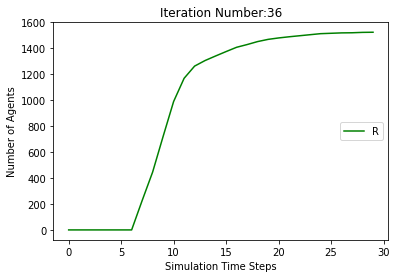

[9774, 9575, 9296, 9024, 8833, 8745, 8703, 8671, 8642, 8616, 8587, 8566, 8546, 8537, 8527, 8521, 8514, 8508, 8503, 8496, 8495, 8492, 8488, 8487, 8487, 8487, 8487, 8487, 8487, 8487, 8487]
[226, 425, 704, 976, 1167, 1255, 1297, 1103, 933, 680, 437, 267, 199, 166, 144, 121, 102, 79, 63, 50, 42, 35, 33, 27, 21, 16, 9, 8, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 425, 704, 976, 1167, 1255, 1297, 1329, 1358, 1384, 1413, 1434, 1454, 1463, 1473, 1479, 1486, 1492, 1497, 1504, 1505, 1508, 1512, 1513]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 

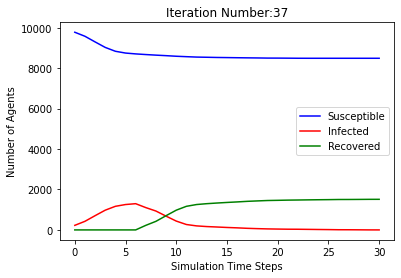

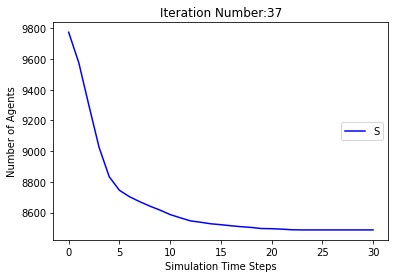

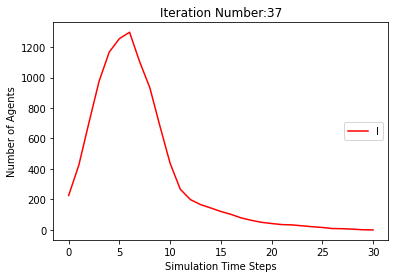

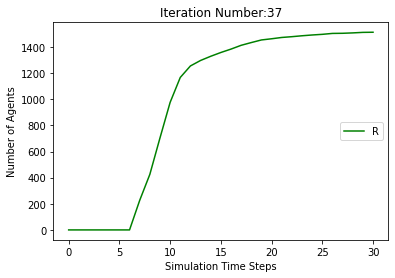

[9774, 9534, 9252, 8997, 8828, 8736, 8680, 8656, 8640, 8622, 8601, 8571, 8556, 8549, 8546, 8545, 8544, 8543, 8541, 8538, 8535, 8535, 8535, 8534, 8533, 8532, 8532, 8532, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531]
[226, 466, 748, 1003, 1172, 1264, 1320, 1118, 894, 630, 396, 257, 180, 131, 110, 95, 78, 58, 30, 18, 14, 11, 10, 10, 10, 9, 6, 3, 4, 4, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 466, 748, 1003, 1172, 1264, 1320, 1344, 1360, 1378, 1399, 1429, 1444, 1451, 1454, 1455, 1456, 1457, 1459, 1462, 1465, 1465, 1465, 1466, 1467, 1468, 1468, 1468, 1469]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 

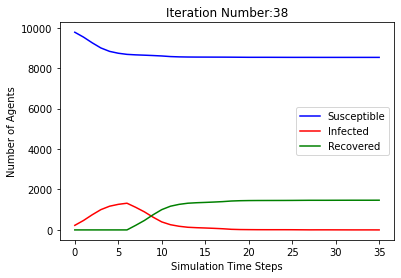

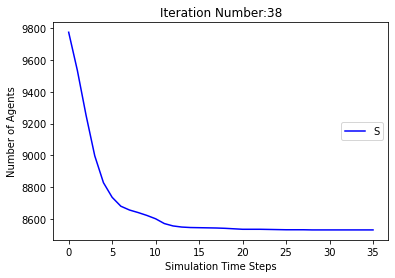

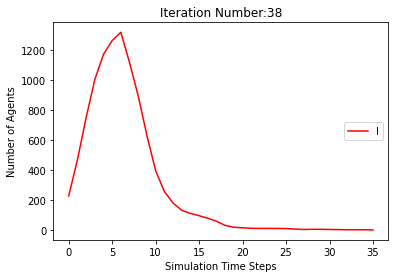

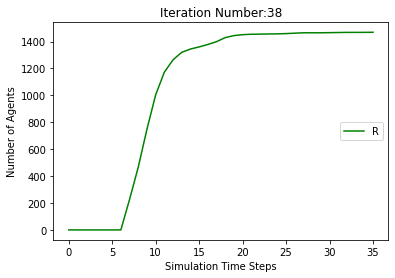

[9774, 9546, 9247, 8973, 8823, 8736, 8701, 8674, 8652, 8641, 8629, 8617, 8608, 8606, 8605, 8605, 8605, 8604, 8602, 8602, 8600, 8600, 8600, 8600, 8600, 8600, 8600, 8600]
[226, 454, 753, 1027, 1177, 1264, 1299, 1100, 894, 606, 344, 206, 128, 95, 69, 47, 36, 25, 15, 6, 6, 5, 5, 5, 4, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 454, 753, 1027, 1177, 1264, 1299, 1326, 1348, 1359, 1371, 1383, 1392, 1394, 1395, 1395, 1395, 1396, 1398, 1398, 1400]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 

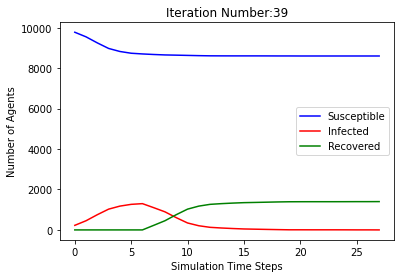

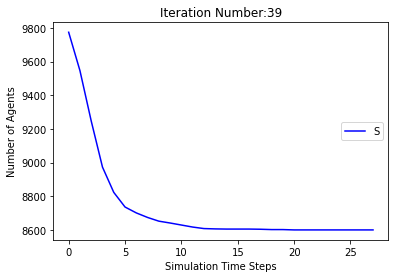

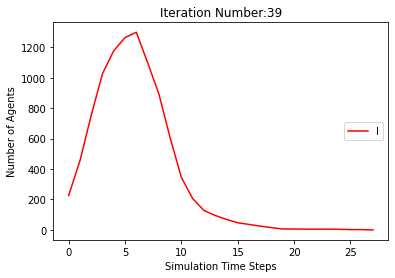

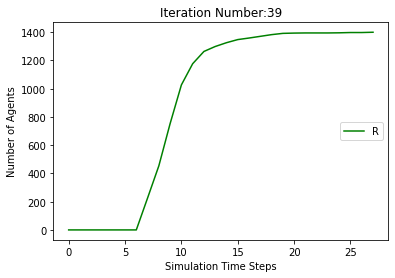

[9774, 9536, 9239, 8978, 8817, 8735, 8694, 8671, 8660, 8645, 8631, 8616, 8610, 8604, 8592, 8588, 8588, 8587, 8587, 8587, 8586, 8584, 8581, 8581, 8581, 8581, 8581, 8581, 8581, 8581]
[226, 464, 761, 1022, 1183, 1265, 1306, 1103, 876, 594, 347, 201, 125, 90, 79, 72, 57, 44, 29, 23, 18, 8, 7, 7, 6, 6, 6, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 464, 761, 1022, 1183, 1265, 1306, 1329, 1340, 1355, 1369, 1384, 1390, 1396, 1408, 1412, 1412, 1413, 1413, 1413, 1414, 1416, 1419]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615

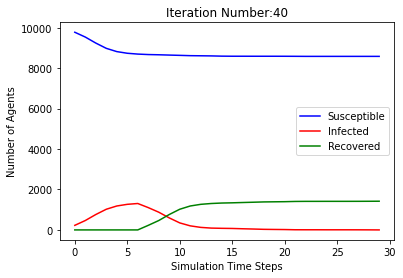

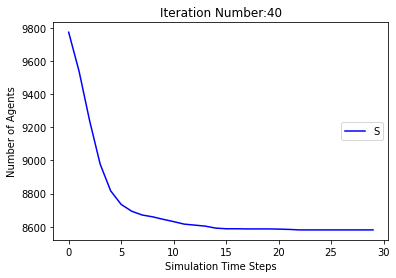

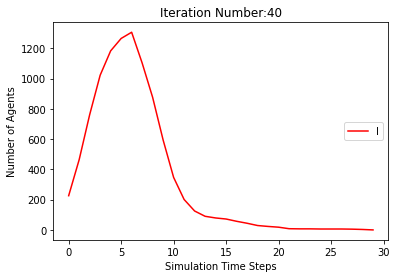

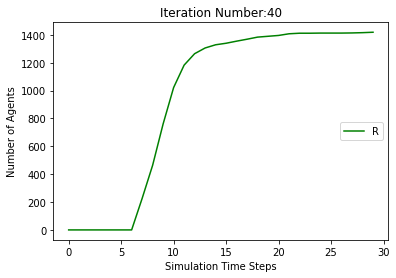

[9774, 9548, 9258, 9008, 8825, 8749, 8702, 8674, 8652, 8626, 8602, 8580, 8567, 8556, 8548, 8547, 8546, 8544, 8544, 8543, 8543, 8543, 8543, 8543, 8543, 8543, 8543]
[226, 452, 742, 992, 1175, 1251, 1298, 1100, 896, 632, 406, 245, 182, 146, 126, 105, 80, 58, 36, 24, 13, 5, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 452, 742, 992, 1175, 1251, 1298, 1326, 1348, 1374, 1398, 1420, 1433, 1444, 1452, 1453, 1454, 1456, 1456, 1457]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 

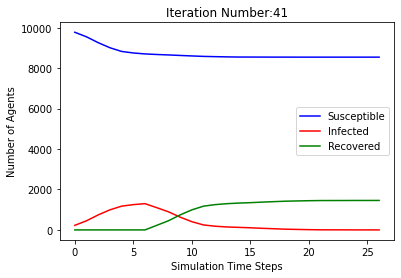

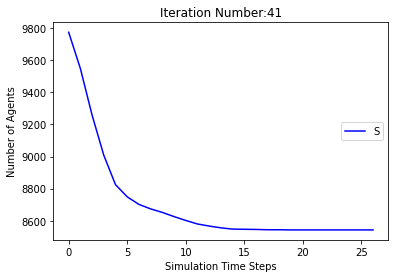

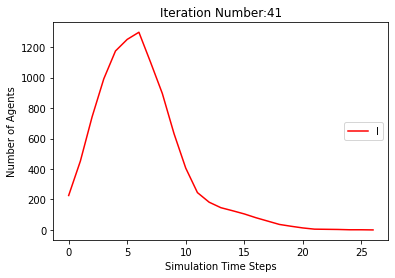

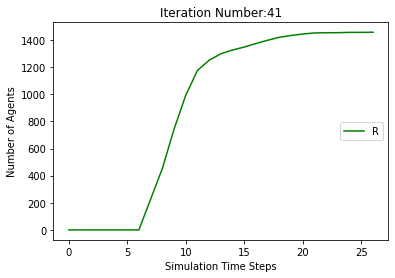

[9774, 9564, 9276, 9011, 8855, 8751, 8695, 8658, 8634, 8604, 8587, 8570, 8553, 8541, 8534, 8528, 8523, 8520, 8518, 8513, 8511, 8507, 8504, 8503, 8501, 8501, 8501, 8501, 8501, 8501, 8501, 8501]
[226, 436, 724, 989, 1145, 1249, 1305, 1116, 930, 672, 424, 285, 198, 154, 124, 106, 81, 67, 52, 40, 30, 27, 24, 20, 19, 17, 12, 10, 6, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 436, 724, 989, 1145, 1249, 1305, 1342, 1366, 1396, 1413, 1430, 1447, 1459, 1466, 1472, 1477, 1480, 1482, 1487, 1489, 1493, 1496, 1497, 1499]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 87

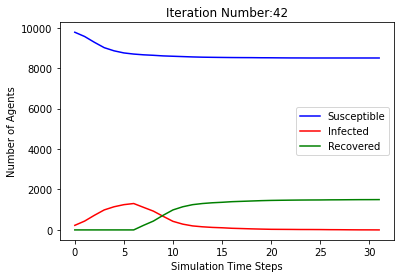

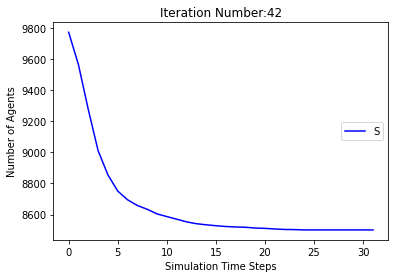

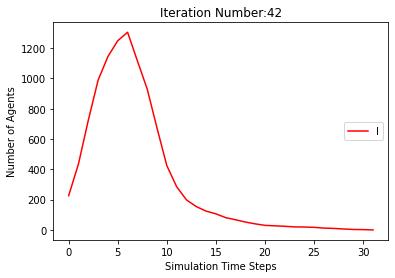

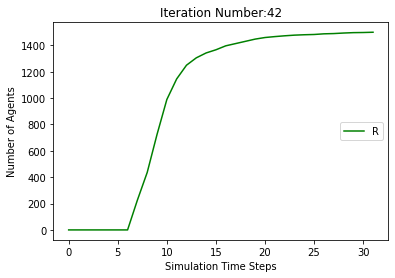

[9774, 9553, 9274, 9020, 8871, 8791, 8737, 8698, 8672, 8638, 8617, 8596, 8587, 8580, 8577, 8573, 8570, 8568, 8566, 8565, 8565, 8563, 8562, 8562, 8562, 8562, 8562, 8562, 8562, 8562]
[226, 447, 726, 980, 1129, 1209, 1263, 1076, 881, 636, 403, 275, 204, 157, 121, 99, 68, 49, 30, 22, 15, 14, 11, 8, 6, 4, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 447, 726, 980, 1129, 1209, 1263, 1302, 1328, 1362, 1383, 1404, 1413, 1420, 1423, 1427, 1430, 1432, 1434, 1435, 1435, 1437, 1438]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 86

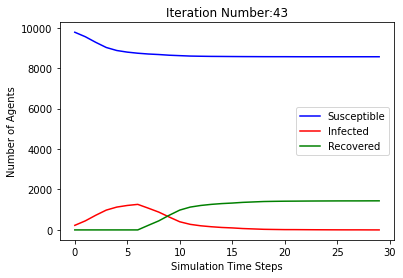

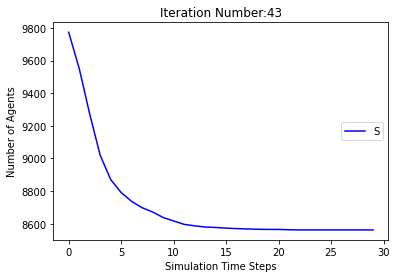

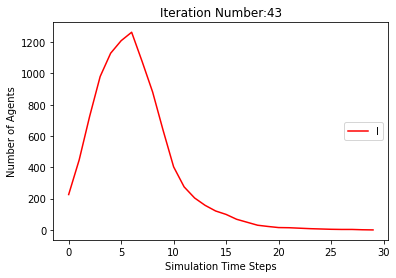

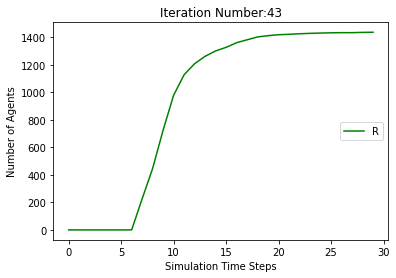

[9774, 9547, 9254, 9003, 8835, 8737, 8684, 8647, 8626, 8613, 8606, 8596, 8590, 8583, 8577, 8576, 8575, 8574, 8574, 8574, 8574, 8574, 8574, 8574, 8574]
[226, 453, 746, 997, 1165, 1263, 1316, 1127, 921, 641, 397, 239, 147, 101, 70, 50, 38, 32, 22, 16, 9, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 453, 746, 997, 1165, 1263, 1316, 1353, 1374, 1387, 1394, 1404, 1410, 1417, 1423, 1424, 1425, 1426]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 859

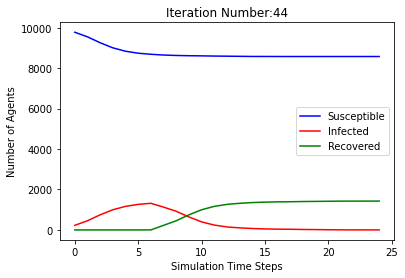

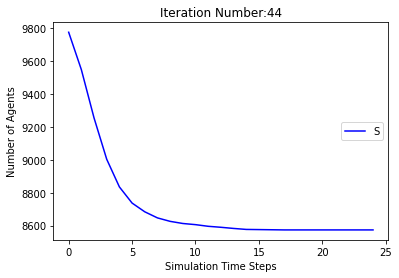

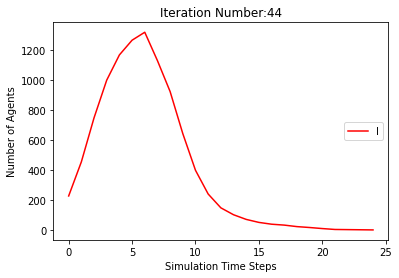

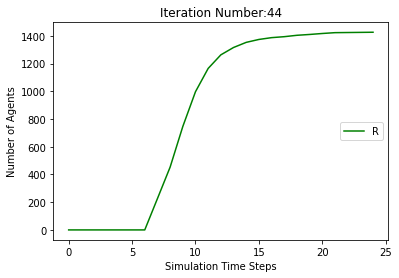

[9774, 9551, 9266, 8982, 8793, 8712, 8672, 8639, 8616, 8598, 8583, 8566, 8552, 8542, 8539, 8535, 8530, 8526, 8518, 8517, 8516, 8515, 8515, 8515, 8515, 8515, 8515, 8515, 8515]
[226, 449, 734, 1018, 1207, 1288, 1328, 1135, 935, 668, 399, 227, 160, 130, 100, 81, 68, 57, 48, 35, 26, 24, 20, 15, 11, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 449, 734, 1018, 1207, 1288, 1328, 1361, 1384, 1402, 1417, 1434, 1448, 1458, 1461, 1465, 1470, 1474, 1482, 1483, 1484, 1485]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8

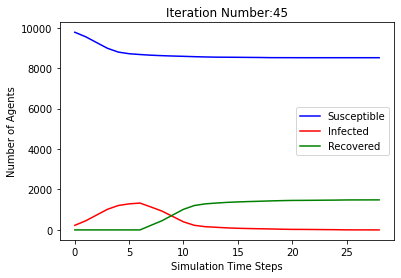

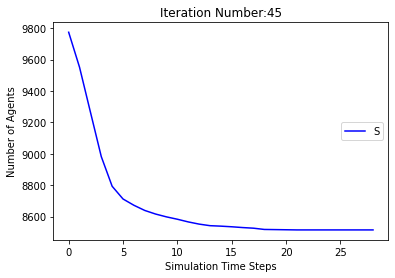

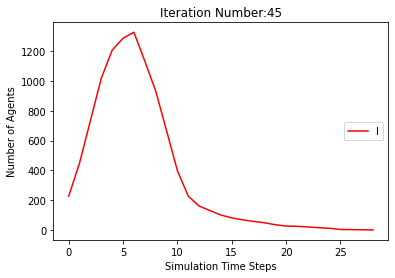

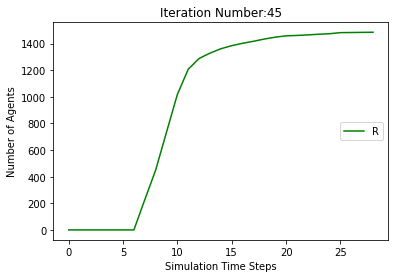

[9774, 9569, 9289, 9028, 8855, 8753, 8693, 8658, 8641, 8616, 8597, 8576, 8568, 8557, 8551, 8545, 8544, 8544, 8544, 8544, 8544, 8544, 8544, 8544]
[226, 431, 711, 972, 1145, 1247, 1307, 1116, 928, 673, 431, 279, 185, 136, 107, 96, 72, 53, 32, 24, 13, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 431, 711, 972, 1145, 1247, 1307, 1342, 1359, 1384, 1403, 1424, 1432, 1443, 1449, 1455, 1456]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597

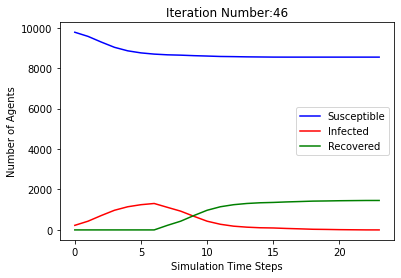

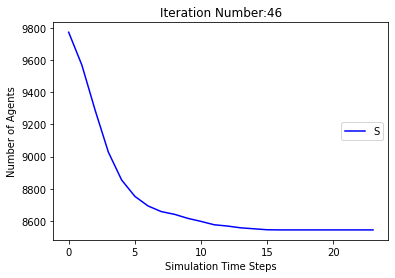

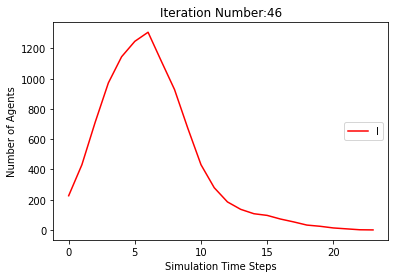

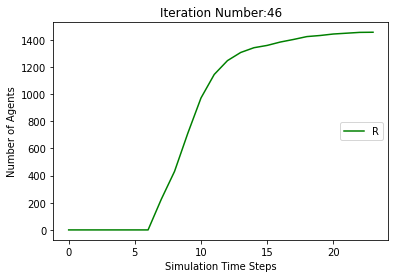

[9774, 9583, 9320, 9051, 8859, 8765, 8705, 8663, 8635, 8608, 8578, 8561, 8545, 8533, 8525, 8518, 8512, 8504, 8503, 8500, 8497, 8495, 8494, 8494, 8494, 8493, 8493, 8492, 8491, 8490, 8489, 8489, 8489, 8489, 8489, 8489, 8489, 8489]
[226, 417, 680, 949, 1141, 1235, 1295, 1111, 948, 712, 473, 298, 220, 172, 138, 117, 96, 74, 58, 45, 36, 30, 24, 18, 10, 10, 7, 5, 4, 4, 5, 5, 4, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 417, 680, 949, 1141, 1235, 1295, 1337, 1365, 1392, 1422, 1439, 1455, 1467, 1475, 1482, 1488, 1496, 1497, 1500, 1503, 1505, 1506, 1506, 1506, 1507, 1507, 1508, 1509, 1510, 1511]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 

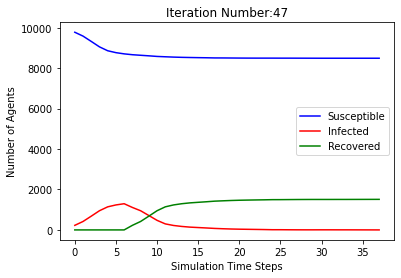

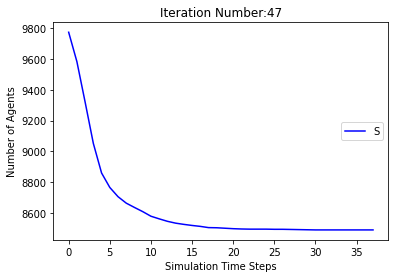

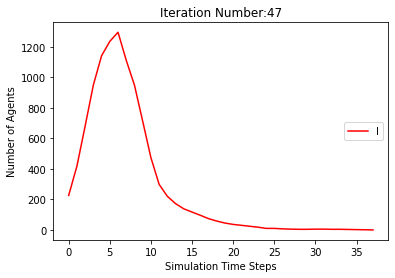

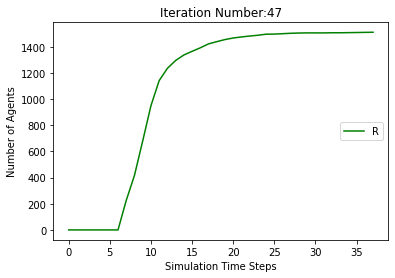

[9774, 9539, 9262, 9008, 8825, 8716, 8644, 8606, 8580, 8556, 8545, 8534, 8517, 8503, 8492, 8484, 8475, 8472, 8463, 8462, 8462, 8462, 8462, 8462, 8462, 8462, 8462]
[226, 461, 738, 992, 1175, 1284, 1356, 1168, 959, 706, 463, 291, 199, 141, 114, 96, 81, 73, 71, 55, 41, 30, 22, 13, 10, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 461, 738, 992, 1175, 1284, 1356, 1394, 1420, 1444, 1455, 1466, 1483, 1497, 1508, 1516, 1525, 1528, 1537, 1538]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 859

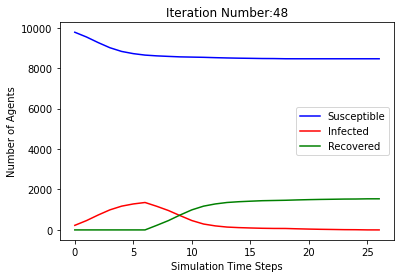

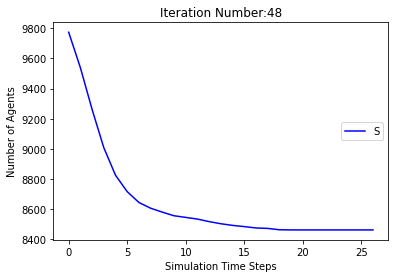

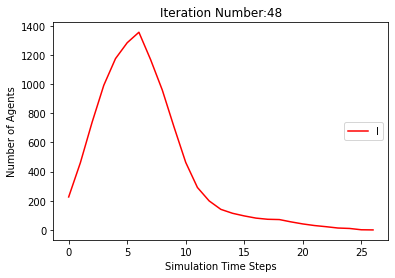

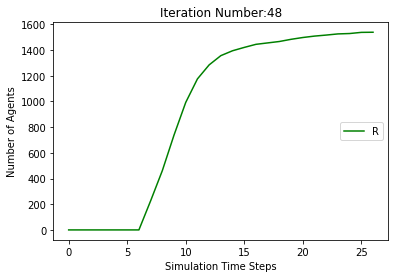

[9774, 9545, 9262, 9008, 8820, 8726, 8679, 8637, 8605, 8580, 8558, 8540, 8524, 8513, 8509, 8504, 8501, 8499, 8497, 8496, 8495, 8493, 8493, 8491, 8491, 8491, 8491, 8491, 8491, 8491, 8491]
[226, 455, 738, 992, 1180, 1274, 1321, 1137, 940, 682, 450, 280, 202, 166, 128, 101, 79, 59, 43, 28, 18, 16, 11, 10, 8, 6, 5, 4, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 455, 738, 992, 1180, 1274, 1321, 1363, 1395, 1420, 1442, 1460, 1476, 1487, 1491, 1496, 1499, 1501, 1503, 1504, 1505, 1507, 1507, 1509]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 863

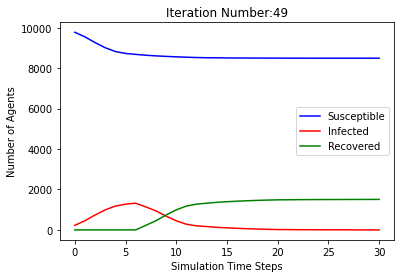

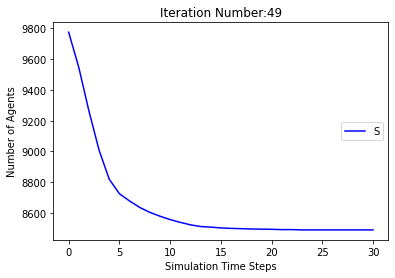

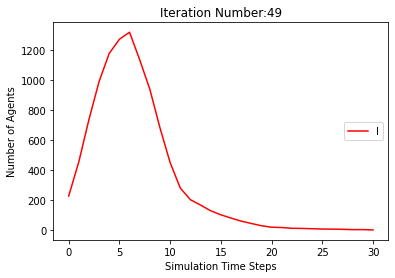

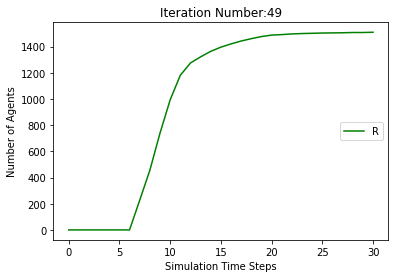

[9774, 9535, 9236, 8975, 8815, 8716, 8671, 8640, 8605, 8584, 8564, 8549, 8538, 8531, 8518, 8511, 8508, 8507, 8506, 8505, 8505, 8504, 8502, 8501, 8501, 8501, 8501, 8501, 8501, 8501, 8501]
[226, 465, 764, 1025, 1185, 1284, 1329, 1134, 930, 652, 411, 266, 178, 140, 122, 94, 76, 57, 43, 33, 26, 14, 9, 7, 6, 5, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 465, 764, 1025, 1185, 1284, 1329, 1360, 1395, 1416, 1436, 1451, 1462, 1469, 1482, 1489, 1492, 1493, 1494, 1495, 1495, 1496, 1498, 1499]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639

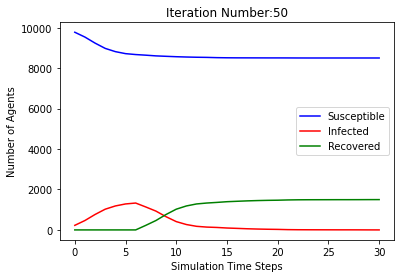

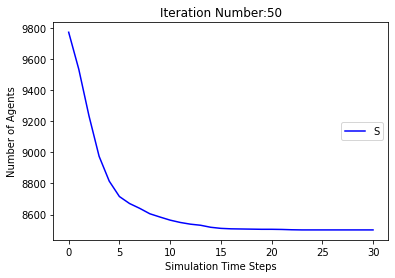

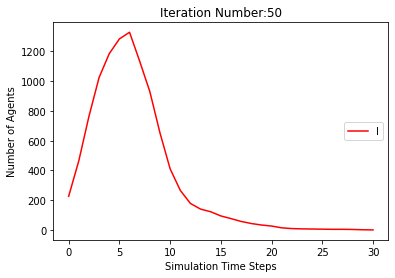

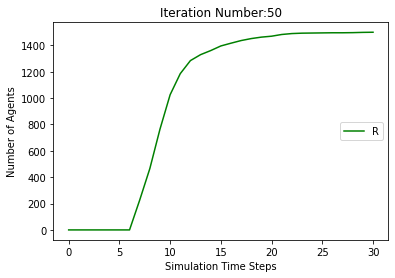

[9774, 9567, 9266, 9022, 8850, 8761, 8718, 8679, 8648, 8618, 8591, 8566, 8546, 8537, 8532, 8527, 8521, 8520, 8518, 8517, 8515, 8514, 8511, 8507, 8507, 8507, 8507, 8507, 8507, 8507, 8507]
[226, 433, 734, 978, 1150, 1239, 1282, 1095, 919, 648, 431, 284, 215, 181, 147, 121, 97, 71, 48, 29, 22, 18, 16, 14, 13, 11, 10, 8, 7, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 433, 734, 978, 1150, 1239, 1282, 1321, 1352, 1382, 1409, 1434, 1454, 1463, 1468, 1473, 1479, 1480, 1482, 1483, 1485, 1486, 1489, 1493]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 

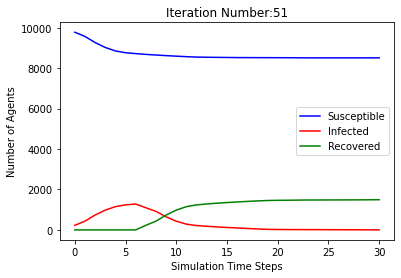

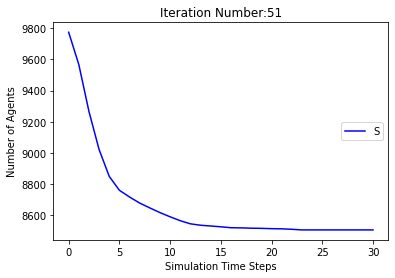

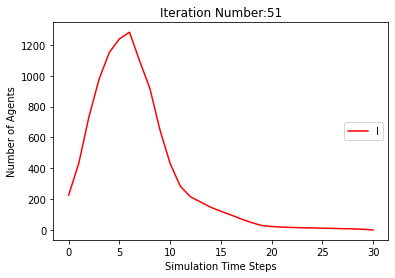

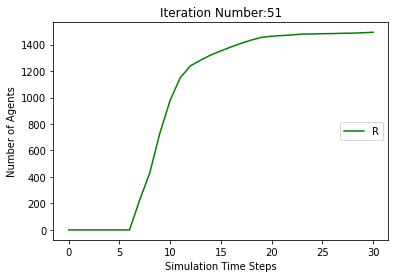

[9774, 9568, 9271, 9013, 8844, 8748, 8701, 8670, 8648, 8624, 8607, 8595, 8579, 8570, 8564, 8555, 8548, 8545, 8542, 8541, 8538, 8536, 8535, 8534, 8533, 8531, 8531, 8529, 8529, 8529, 8529, 8529, 8529, 8529, 8529]
[226, 432, 729, 987, 1156, 1252, 1299, 1104, 920, 647, 406, 249, 169, 131, 106, 93, 76, 62, 53, 38, 32, 28, 20, 14, 12, 11, 10, 9, 7, 6, 5, 4, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 432, 729, 987, 1156, 1252, 1299, 1330, 1352, 1376, 1393, 1405, 1421, 1430, 1436, 1445, 1452, 1455, 1458, 1459, 1462, 1464, 1465, 1466, 1467, 1469, 1469, 1471]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 853

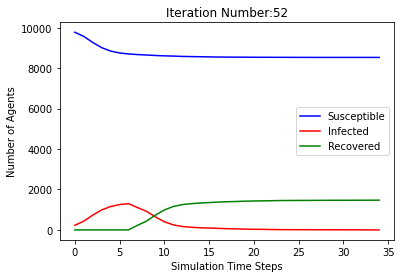

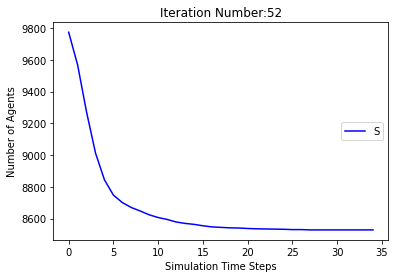

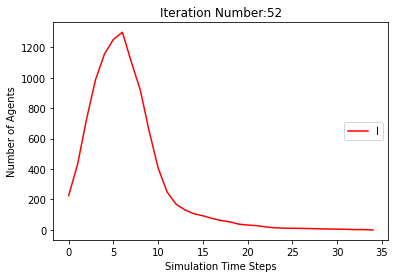

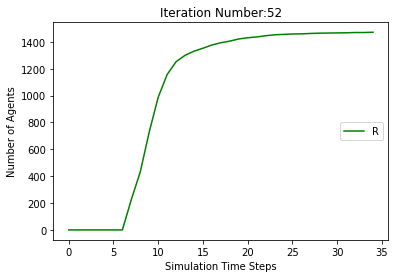

[9774, 9568, 9278, 9009, 8834, 8754, 8707, 8672, 8650, 8633, 8613, 8598, 8582, 8577, 8573, 8572, 8570, 8565, 8559, 8556, 8553, 8553, 8553, 8553, 8553, 8553, 8553, 8553]
[226, 432, 722, 991, 1166, 1246, 1293, 1102, 918, 645, 396, 236, 172, 130, 99, 78, 63, 48, 39, 26, 24, 20, 19, 17, 12, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 432, 722, 991, 1166, 1246, 1293, 1328, 1350, 1367, 1387, 1402, 1418, 1423, 1427, 1428, 1430, 1435, 1441, 1444, 1447]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8

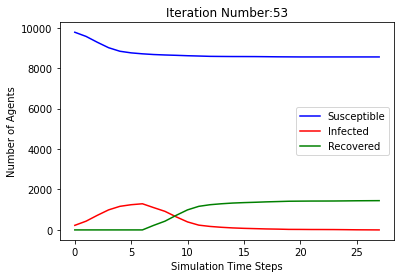

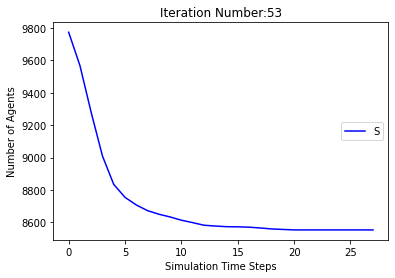

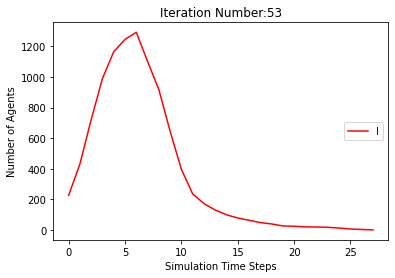

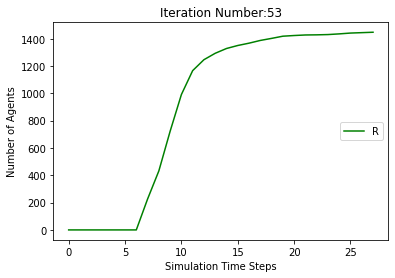

[9774, 9556, 9245, 8998, 8822, 8736, 8692, 8662, 8643, 8619, 8595, 8570, 8551, 8537, 8529, 8527, 8523, 8521, 8521, 8521, 8521, 8521, 8521, 8521, 8521]
[226, 444, 755, 1002, 1178, 1264, 1308, 1112, 913, 626, 403, 252, 185, 155, 133, 116, 96, 74, 49, 30, 16, 8, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 444, 755, 1002, 1178, 1264, 1308, 1338, 1357, 1381, 1405, 1430, 1449, 1463, 1471, 1473, 1477, 1479]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597

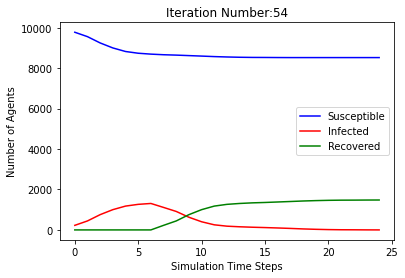

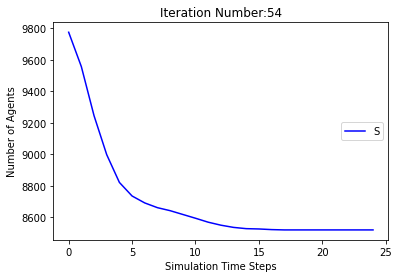

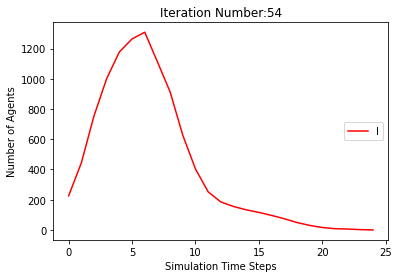

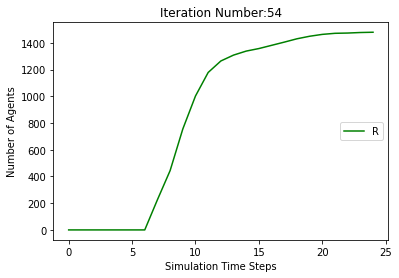

[9774, 9544, 9230, 8956, 8808, 8720, 8682, 8666, 8646, 8633, 8618, 8606, 8597, 8590, 8588, 8588, 8587, 8587, 8586, 8586, 8586, 8586, 8586, 8586, 8586, 8586]
[226, 456, 770, 1044, 1192, 1280, 1318, 1108, 898, 597, 338, 202, 123, 92, 78, 58, 46, 31, 20, 11, 4, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 456, 770, 1044, 1192, 1280, 1318, 1334, 1354, 1367, 1382, 1394, 1403, 1410, 1412, 1412, 1413, 1413, 1414]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597,

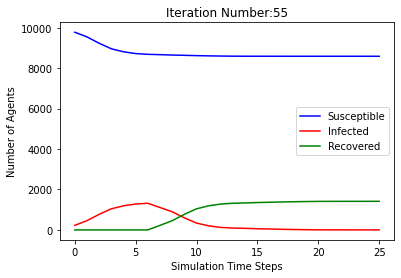

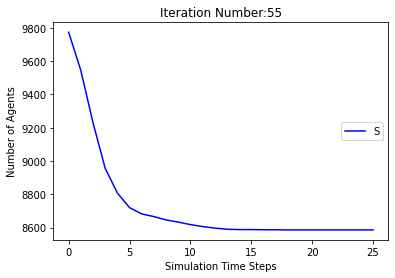

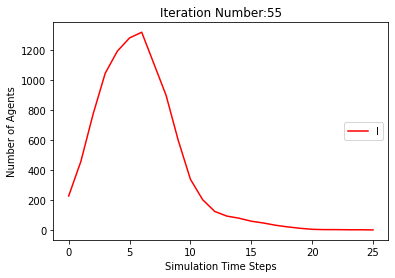

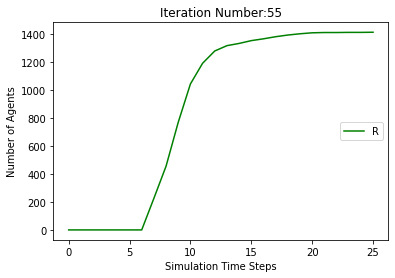

[9774, 9542, 9254, 8985, 8822, 8753, 8716, 8690, 8681, 8673, 8660, 8646, 8639, 8632, 8629, 8628, 8627, 8624, 8624, 8624, 8624, 8624, 8624, 8624, 8624]
[226, 458, 746, 1015, 1178, 1247, 1284, 1084, 861, 581, 325, 176, 114, 84, 61, 53, 46, 36, 22, 15, 8, 5, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 458, 746, 1015, 1178, 1247, 1284, 1310, 1319, 1327, 1340, 1354, 1361, 1368, 1371, 1372, 1373, 1376]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 85

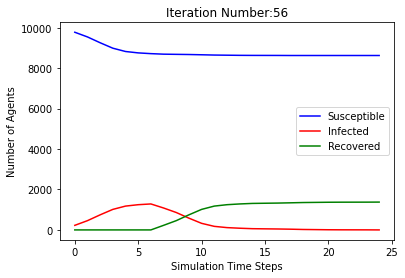

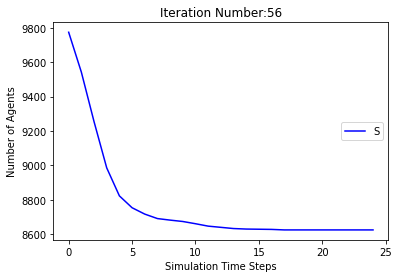

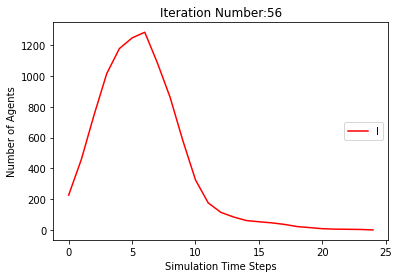

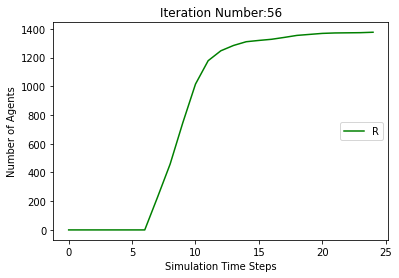

[9774, 9553, 9258, 8990, 8839, 8759, 8715, 8681, 8646, 8626, 8610, 8595, 8585, 8575, 8567, 8563, 8562, 8562, 8562, 8562, 8562, 8562, 8562, 8562]
[226, 447, 742, 1010, 1161, 1241, 1285, 1093, 907, 632, 380, 244, 174, 140, 114, 83, 64, 48, 33, 23, 13, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 447, 742, 1010, 1161, 1241, 1285, 1319, 1354, 1374, 1390, 1405, 1415, 1425, 1433, 1437, 1438]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 85

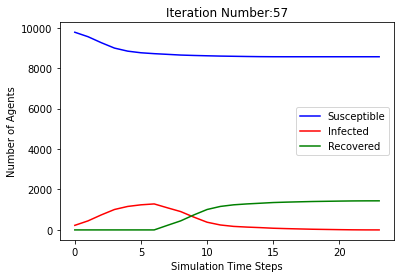

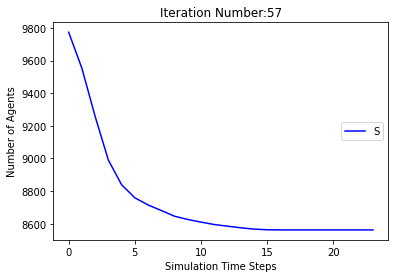

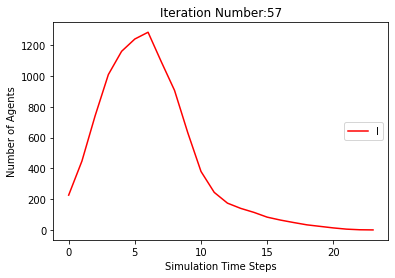

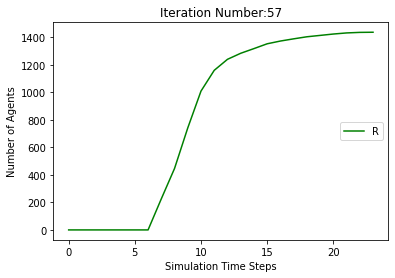

[9774, 9543, 9236, 8958, 8796, 8707, 8661, 8622, 8599, 8567, 8545, 8519, 8504, 8495, 8493, 8491, 8490, 8490, 8490, 8490, 8489, 8489, 8489, 8489, 8487, 8484, 8483, 8483, 8483, 8483, 8483, 8483, 8483, 8483]
[226, 457, 764, 1042, 1204, 1293, 1339, 1152, 944, 669, 413, 277, 203, 166, 129, 108, 77, 55, 29, 14, 6, 4, 2, 1, 3, 6, 7, 6, 6, 6, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 457, 764, 1042, 1204, 1293, 1339, 1378, 1401, 1433, 1455, 1481, 1496, 1505, 1507, 1509, 1510, 1510, 1510, 1510, 1511, 1511, 1511, 1511, 1513, 1516, 1517]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 92

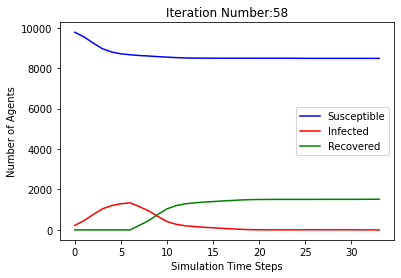

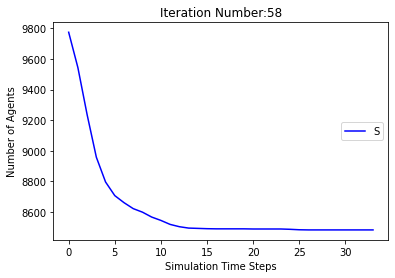

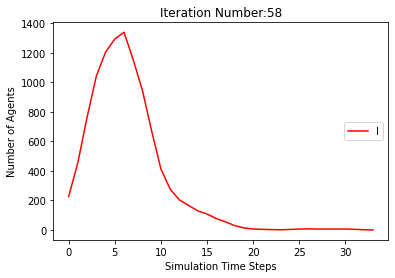

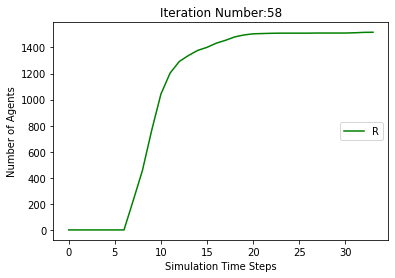

[9774, 9555, 9254, 8973, 8800, 8711, 8669, 8645, 8621, 8606, 8594, 8584, 8577, 8567, 8564, 8563, 8563, 8563, 8563, 8563, 8563, 8563, 8563]
[226, 445, 746, 1027, 1200, 1289, 1331, 1129, 934, 648, 379, 216, 134, 102, 81, 58, 43, 31, 21, 14, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 445, 746, 1027, 1200, 1289, 1331, 1355, 1379, 1394, 1406, 1416, 1423, 1433, 1436, 1437]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597], [9774,

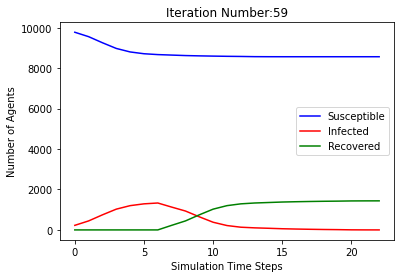

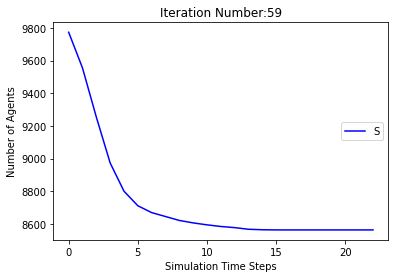

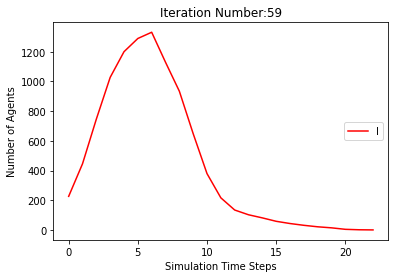

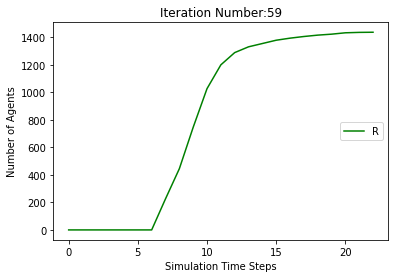

[9774, 9566, 9288, 9021, 8845, 8753, 8707, 8662, 8633, 8609, 8586, 8559, 8549, 8546, 8541, 8533, 8527, 8523, 8522, 8521, 8520, 8519, 8518, 8518, 8518, 8517, 8517, 8517, 8517, 8517, 8517, 8517, 8517]
[226, 434, 712, 979, 1155, 1247, 1293, 1112, 933, 679, 435, 286, 204, 161, 121, 100, 82, 63, 37, 28, 26, 22, 15, 9, 5, 5, 4, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 434, 712, 979, 1155, 1247, 1293, 1338, 1367, 1391, 1414, 1441, 1451, 1454, 1459, 1467, 1473, 1477, 1478, 1479, 1480, 1481, 1482, 1482, 1482, 1483]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857

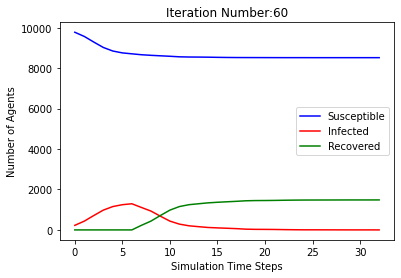

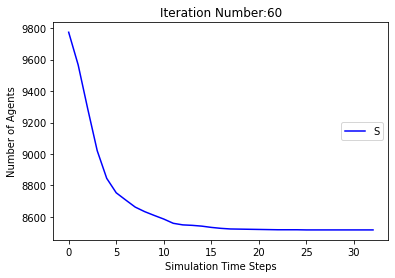

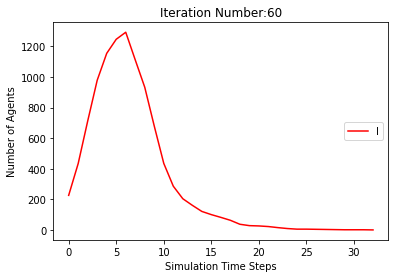

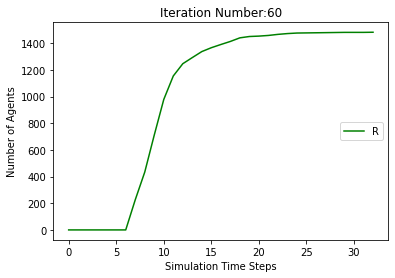

[9774, 9555, 9245, 9004, 8836, 8751, 8700, 8657, 8617, 8589, 8561, 8544, 8530, 8511, 8501, 8492, 8485, 8482, 8481, 8480, 8479, 8475, 8472, 8470, 8468, 8466, 8464, 8464, 8464, 8464, 8464, 8464, 8464, 8464]
[226, 445, 755, 996, 1164, 1249, 1300, 1117, 938, 656, 443, 292, 221, 189, 156, 125, 104, 79, 63, 50, 32, 26, 20, 15, 14, 15, 16, 15, 11, 8, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 445, 755, 996, 1164, 1249, 1300, 1343, 1383, 1411, 1439, 1456, 1470, 1489, 1499, 1508, 1515, 1518, 1519, 1520, 1521, 1525, 1528, 1530, 1532, 1534, 1536]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 

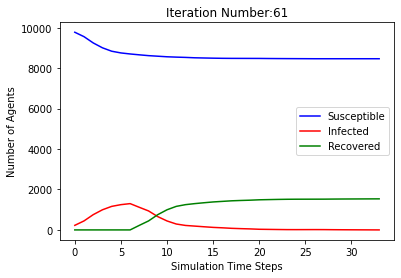

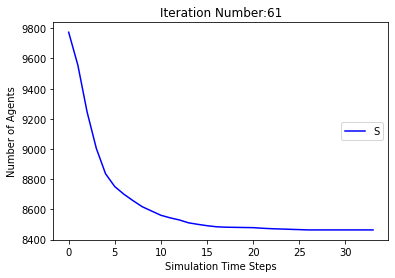

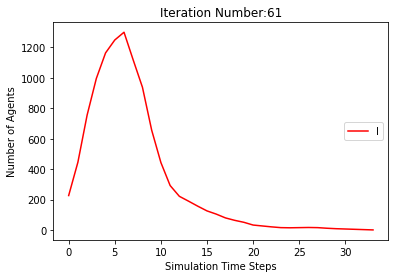

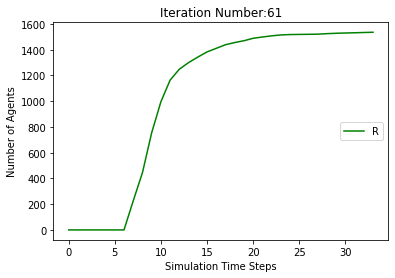

[9774, 9545, 9278, 9012, 8831, 8739, 8681, 8650, 8626, 8603, 8587, 8574, 8559, 8549, 8543, 8539, 8538, 8538, 8536, 8535, 8532, 8531, 8530, 8530, 8530, 8530, 8530, 8530, 8530, 8530]
[226, 455, 722, 988, 1169, 1261, 1319, 1124, 919, 675, 425, 257, 180, 132, 107, 87, 65, 49, 38, 24, 17, 12, 9, 8, 8, 6, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 455, 722, 988, 1169, 1261, 1319, 1350, 1374, 1397, 1413, 1426, 1441, 1451, 1457, 1461, 1462, 1462, 1464, 1465, 1468, 1469, 1470]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 861

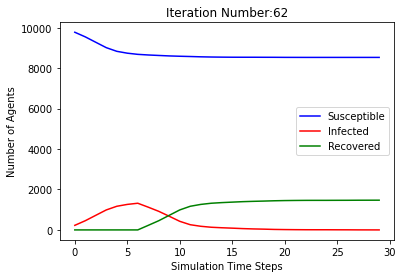

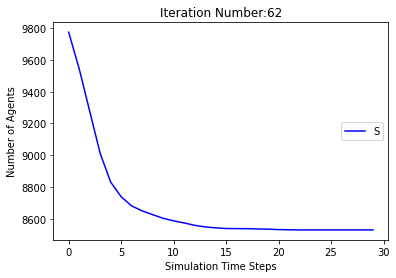

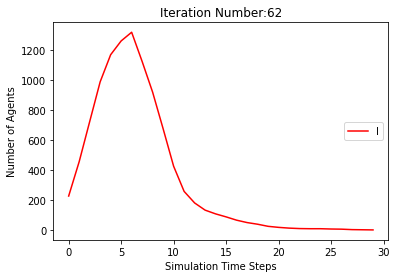

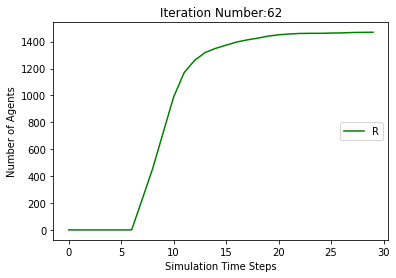

[9774, 9558, 9271, 8992, 8830, 8748, 8692, 8659, 8626, 8604, 8587, 8568, 8553, 8548, 8544, 8542, 8541, 8539, 8538, 8535, 8535, 8535, 8535, 8535, 8535, 8535, 8535]
[226, 442, 729, 1008, 1170, 1252, 1308, 1115, 932, 667, 405, 262, 195, 144, 115, 84, 63, 48, 30, 18, 13, 9, 7, 6, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 442, 729, 1008, 1170, 1252, 1308, 1341, 1374, 1396, 1413, 1432, 1447, 1452, 1456, 1458, 1459, 1461, 1462, 1465]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598,

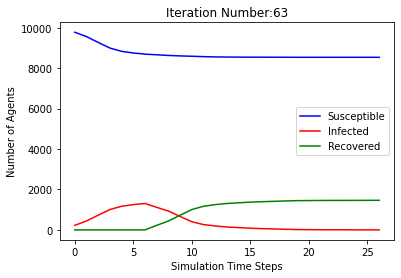

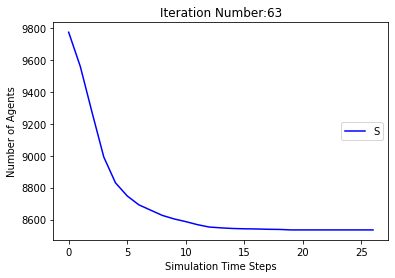

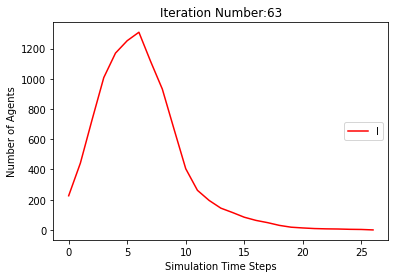

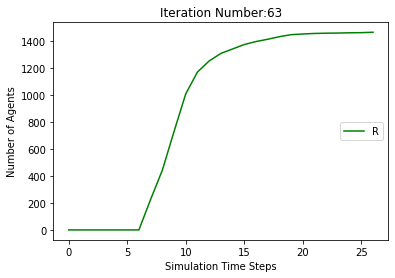

[9774, 9576, 9305, 9052, 8873, 8764, 8702, 8662, 8646, 8634, 8621, 8604, 8592, 8581, 8574, 8570, 8569, 8568, 8568, 8564, 8563, 8562, 8562, 8562, 8562, 8562, 8562, 8562, 8562]
[226, 424, 695, 948, 1127, 1236, 1298, 1112, 930, 671, 431, 269, 172, 121, 88, 76, 65, 53, 36, 28, 18, 12, 8, 7, 6, 6, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 424, 695, 948, 1127, 1236, 1298, 1338, 1354, 1366, 1379, 1396, 1408, 1419, 1426, 1430, 1431, 1432, 1432, 1436, 1437, 1438]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8

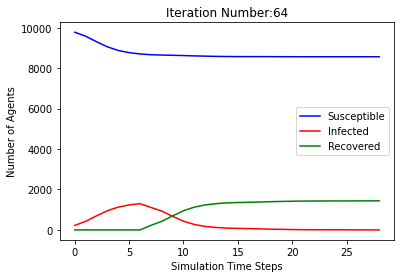

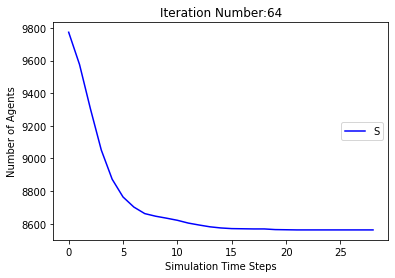

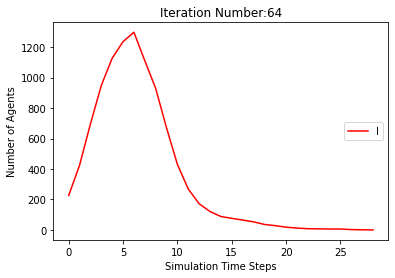

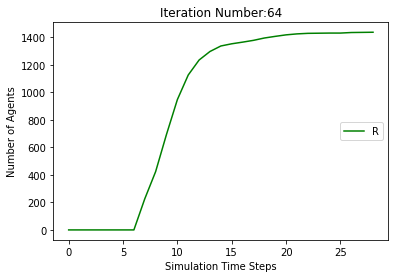

[9774, 9560, 9314, 9046, 8854, 8755, 8700, 8663, 8641, 8619, 8607, 8594, 8586, 8582, 8577, 8570, 8564, 8562, 8560, 8559, 8557, 8557, 8557, 8557, 8557, 8557, 8557, 8557]
[226, 440, 686, 954, 1146, 1245, 1300, 1111, 919, 695, 439, 260, 169, 118, 86, 71, 55, 45, 34, 27, 25, 20, 13, 7, 5, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 440, 686, 954, 1146, 1245, 1300, 1337, 1359, 1381, 1393, 1406, 1414, 1418, 1423, 1430, 1436, 1438, 1440, 1441, 1443]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 859

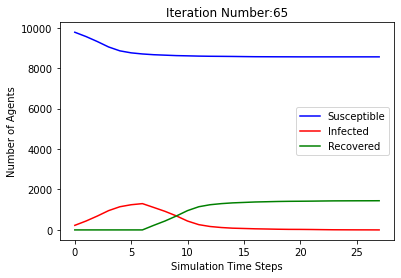

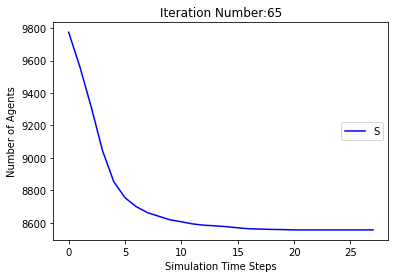

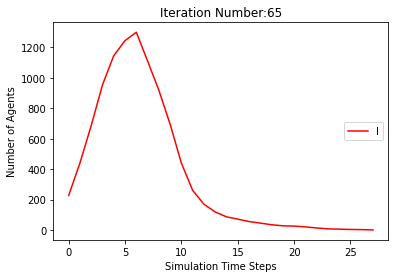

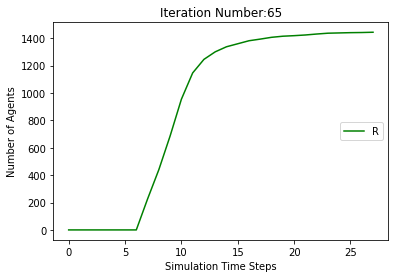

[9774, 9541, 9243, 8979, 8843, 8774, 8734, 8701, 8682, 8665, 8647, 8641, 8635, 8634, 8631, 8628, 8625, 8622, 8619, 8618, 8614, 8612, 8612, 8611, 8610, 8610, 8609, 8609, 8609, 8609, 8609, 8609, 8609, 8609]
[226, 459, 757, 1021, 1157, 1226, 1266, 1073, 859, 578, 332, 202, 139, 100, 70, 54, 40, 25, 22, 17, 20, 19, 16, 14, 12, 9, 9, 5, 3, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 459, 757, 1021, 1157, 1226, 1266, 1299, 1318, 1335, 1353, 1359, 1365, 1366, 1369, 1372, 1375, 1378, 1381, 1382, 1386, 1388, 1388, 1389, 1390, 1390, 1391]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547,

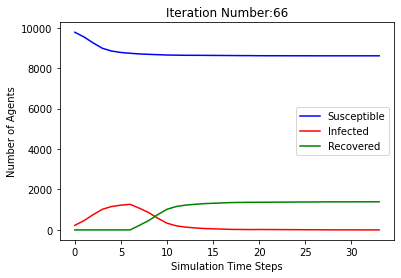

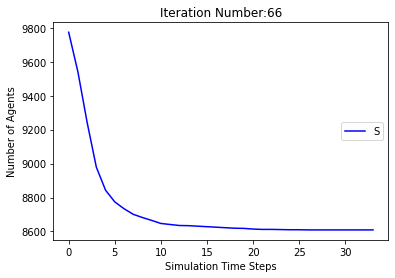

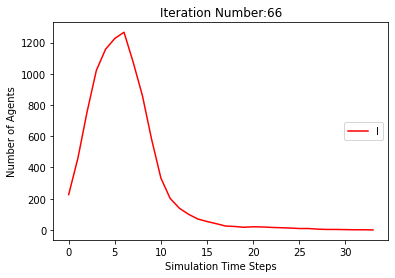

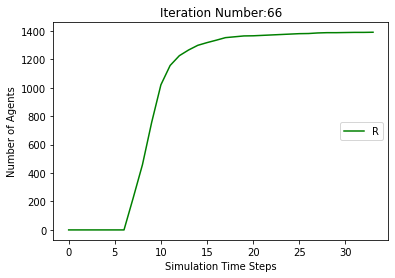

[9774, 9566, 9270, 9005, 8837, 8743, 8683, 8654, 8634, 8612, 8582, 8560, 8543, 8527, 8517, 8512, 8510, 8510, 8510, 8510, 8510, 8510, 8510, 8510]
[226, 434, 730, 995, 1163, 1257, 1317, 1120, 932, 658, 423, 277, 200, 156, 137, 122, 102, 72, 50, 33, 17, 7, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 434, 730, 995, 1163, 1257, 1317, 1346, 1366, 1388, 1418, 1440, 1457, 1473, 1483, 1488, 1490]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 85

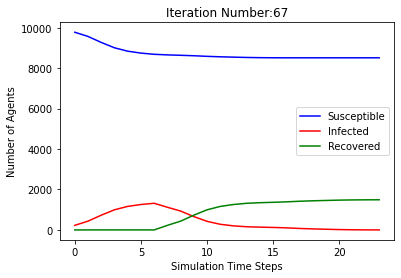

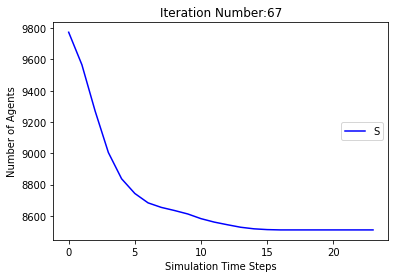

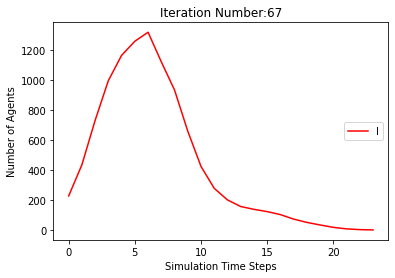

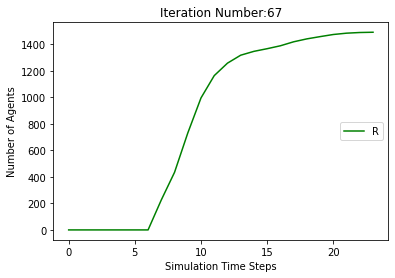

[9774, 9565, 9291, 9039, 8861, 8759, 8704, 8670, 8640, 8619, 8601, 8588, 8579, 8571, 8564, 8562, 8562, 8561, 8559, 8557, 8557, 8557, 8557, 8557, 8557, 8557, 8557]
[226, 435, 709, 961, 1139, 1241, 1296, 1104, 925, 672, 438, 273, 180, 133, 106, 78, 57, 40, 29, 22, 14, 7, 5, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 435, 709, 961, 1139, 1241, 1296, 1330, 1360, 1381, 1399, 1412, 1421, 1429, 1436, 1438, 1438, 1439, 1441, 1443]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8

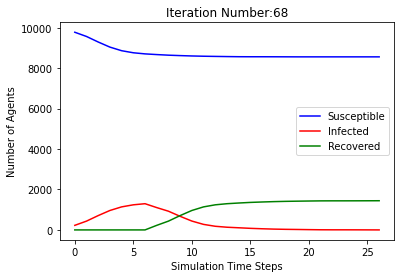

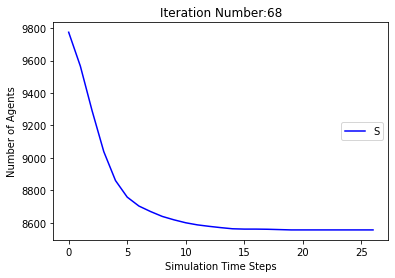

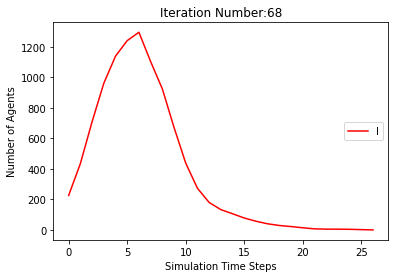

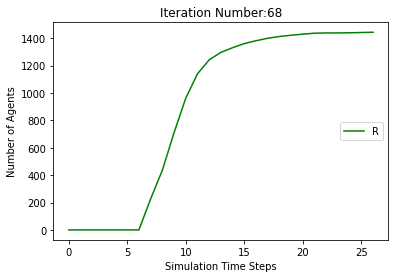

[9774, 9556, 9270, 9000, 8850, 8770, 8720, 8677, 8663, 8654, 8639, 8626, 8616, 8610, 8609, 8609, 8606, 8602, 8600, 8599, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597]
[226, 444, 730, 1000, 1150, 1230, 1280, 1097, 893, 616, 361, 224, 154, 110, 68, 54, 48, 37, 26, 17, 12, 11, 12, 9, 5, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 444, 730, 1000, 1150, 1230, 1280, 1323, 1337, 1346, 1361, 1374, 1384, 1390, 1391, 1391, 1394, 1398, 1400, 1401, 1402, 1402, 1403]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8

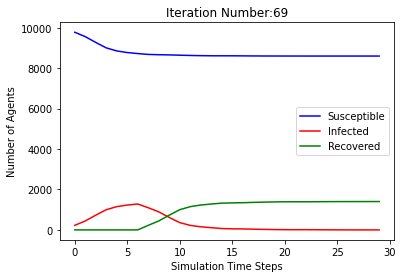

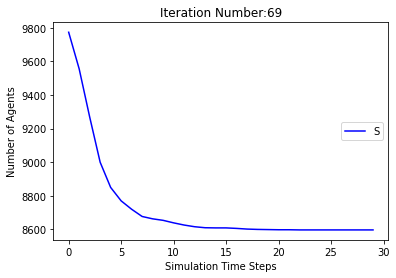

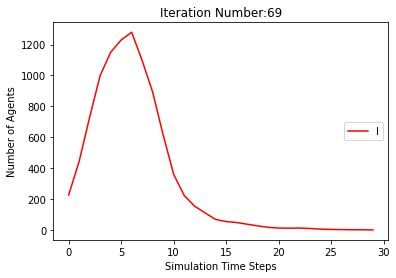

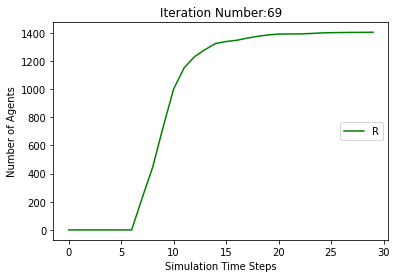

[9774, 9564, 9248, 8997, 8823, 8736, 8690, 8661, 8645, 8628, 8607, 8590, 8575, 8567, 8564, 8563, 8561, 8559, 8557, 8557, 8556, 8555, 8554, 8553, 8551, 8551, 8551, 8551, 8551, 8551, 8551, 8551]
[226, 436, 752, 1003, 1177, 1264, 1310, 1113, 919, 620, 390, 233, 161, 123, 97, 82, 67, 48, 33, 18, 11, 9, 9, 8, 8, 6, 6, 5, 4, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 436, 752, 1003, 1177, 1264, 1310, 1339, 1355, 1372, 1393, 1410, 1425, 1433, 1436, 1437, 1439, 1441, 1443, 1443, 1444, 1445, 1446, 1447, 1449]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 868

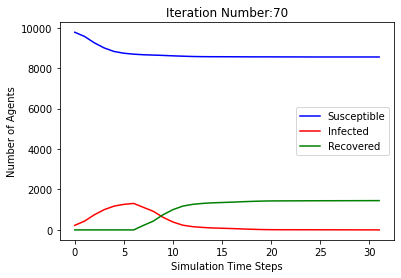

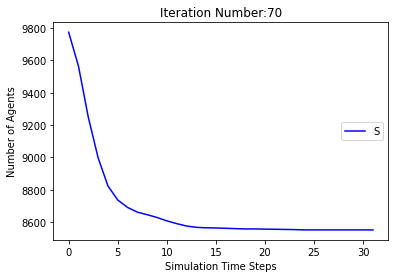

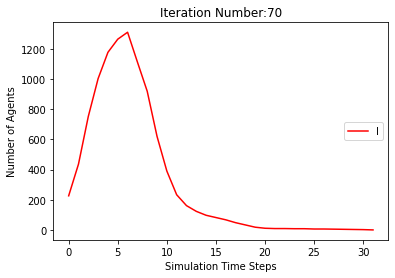

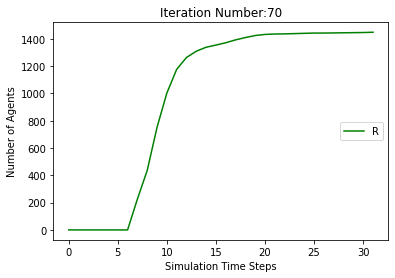

[9774, 9555, 9287, 9035, 8866, 8762, 8711, 8677, 8656, 8649, 8638, 8634, 8630, 8627, 8627, 8627, 8626, 8625, 8623, 8621, 8618, 8618, 8618, 8618, 8618, 8618, 8618, 8618]
[226, 445, 713, 965, 1134, 1238, 1289, 1097, 899, 638, 397, 232, 132, 84, 50, 29, 23, 13, 11, 9, 9, 9, 9, 8, 7, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 445, 713, 965, 1134, 1238, 1289, 1323, 1344, 1351, 1362, 1366, 1370, 1373, 1373, 1373, 1374, 1375, 1377, 1379, 1382]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 85

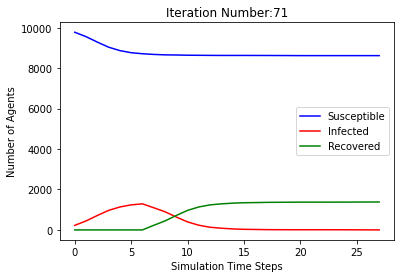

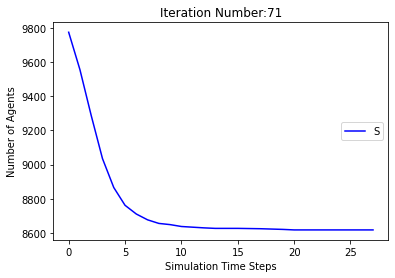

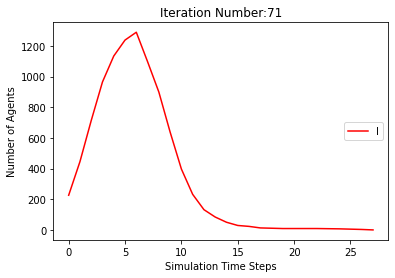

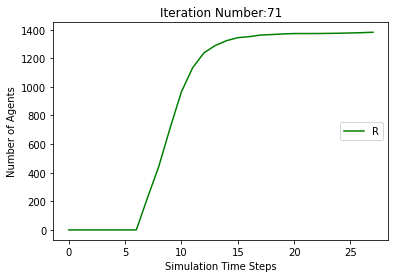

[9774, 9572, 9299, 9027, 8822, 8720, 8677, 8650, 8619, 8590, 8566, 8544, 8513, 8490, 8483, 8476, 8472, 8469, 8465, 8465, 8464, 8463, 8463, 8463, 8463, 8463, 8463, 8463, 8463]
[226, 428, 701, 973, 1178, 1280, 1323, 1124, 953, 709, 461, 278, 207, 187, 167, 143, 118, 97, 79, 48, 26, 20, 13, 9, 6, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 428, 701, 973, 1178, 1280, 1323, 1350, 1381, 1410, 1434, 1456, 1487, 1510, 1517, 1524, 1528, 1531, 1535, 1535, 1536, 1537]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 860

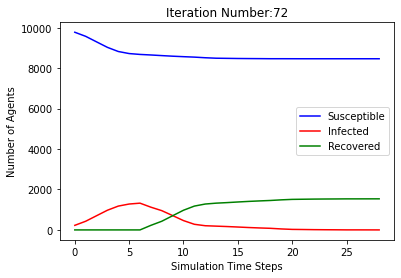

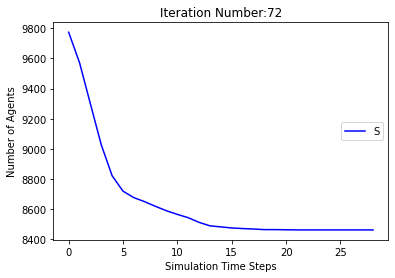

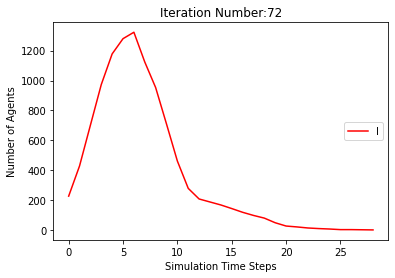

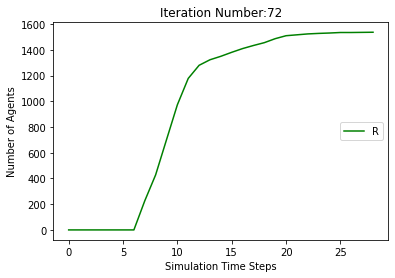

[9774, 9568, 9273, 8999, 8811, 8717, 8677, 8645, 8625, 8606, 8595, 8588, 8575, 8561, 8554, 8548, 8544, 8542, 8540, 8538, 8536, 8534, 8532, 8532, 8532, 8532, 8532, 8532, 8532, 8532]
[226, 432, 727, 1001, 1189, 1283, 1323, 1129, 943, 667, 404, 223, 142, 116, 91, 77, 62, 53, 48, 37, 25, 20, 16, 12, 10, 8, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 432, 727, 1001, 1189, 1283, 1323, 1355, 1375, 1394, 1405, 1412, 1425, 1439, 1446, 1452, 1456, 1458, 1460, 1462, 1464, 1466, 1468]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625,

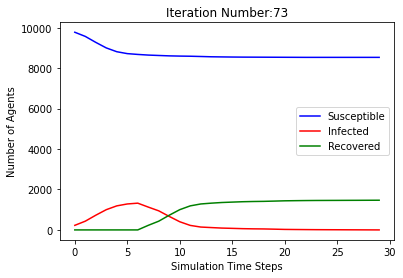

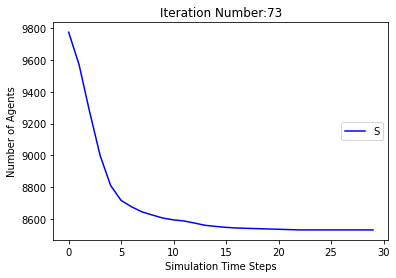

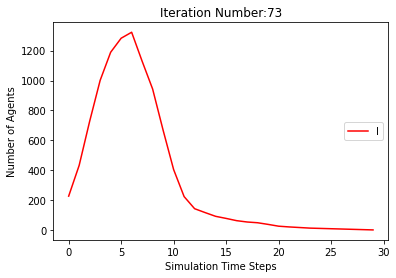

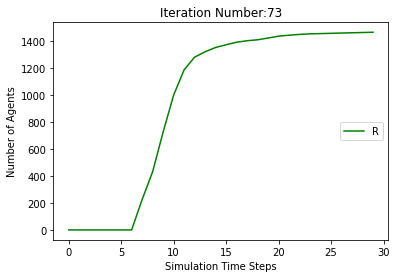

[9774, 9551, 9274, 9001, 8820, 8734, 8696, 8671, 8635, 8614, 8596, 8593, 8586, 8580, 8573, 8570, 8567, 8566, 8562, 8562, 8562, 8562, 8562, 8562, 8562, 8562]
[226, 449, 726, 999, 1180, 1266, 1304, 1103, 916, 660, 405, 227, 148, 116, 98, 65, 47, 30, 31, 24, 18, 11, 8, 5, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 449, 726, 999, 1180, 1266, 1304, 1329, 1365, 1386, 1404, 1407, 1414, 1420, 1427, 1430, 1433, 1434, 1438]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597

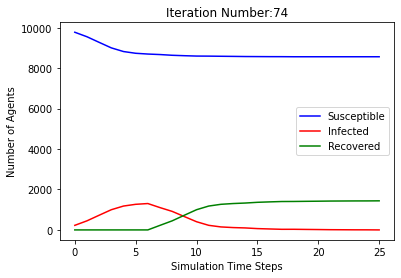

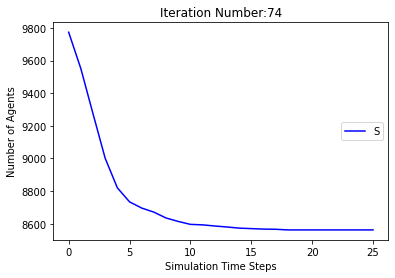

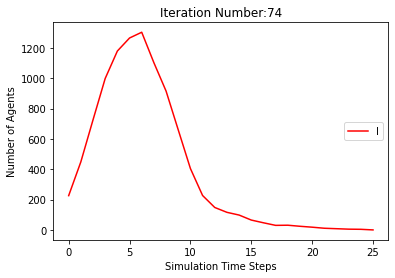

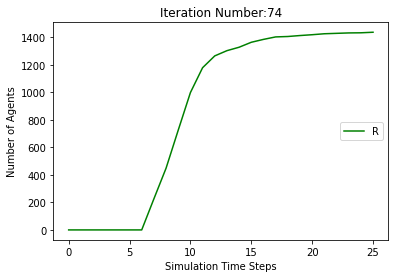

[9774, 9544, 9255, 9008, 8863, 8756, 8687, 8657, 8633, 8609, 8586, 8575, 8563, 8559, 8552, 8548, 8540, 8533, 8524, 8520, 8510, 8503, 8498, 8496, 8496, 8494, 8494, 8492, 8492, 8492, 8490, 8488, 8486, 8486, 8485, 8484, 8483, 8482, 8480, 8479, 8479, 8479, 8479, 8479, 8479, 8479, 8479]
[226, 456, 745, 992, 1137, 1244, 1313, 1117, 911, 646, 422, 288, 193, 128, 105, 85, 69, 53, 51, 43, 49, 49, 50, 44, 37, 30, 26, 18, 11, 6, 6, 8, 8, 8, 7, 8, 9, 8, 8, 7, 7, 6, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 456, 745, 992, 1137, 1244, 1313, 1343, 1367, 1391, 1414, 1425, 1437, 1441, 1448, 1452, 1460, 1467, 1476, 1480, 1490, 1497, 1502, 1504, 1504, 1506, 1506, 1508, 1508, 1508, 1510, 1512, 1514, 1514, 1515, 1516, 1517, 1518, 1520, 1521]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 864

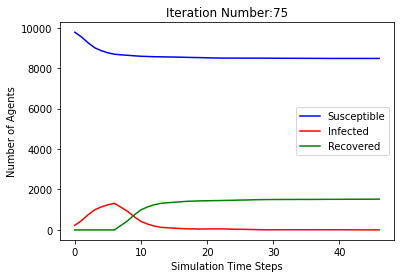

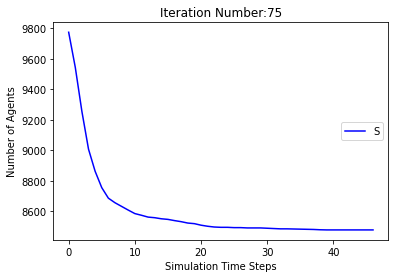

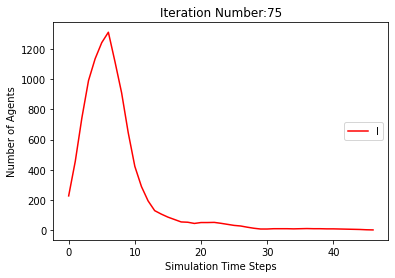

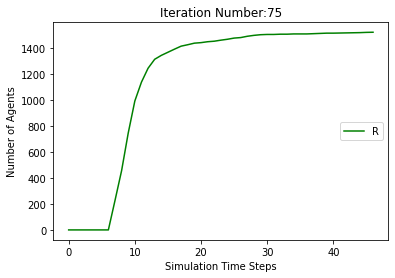

[9774, 9526, 9231, 8986, 8842, 8743, 8695, 8661, 8630, 8597, 8566, 8547, 8531, 8518, 8508, 8503, 8501, 8498, 8495, 8494, 8493, 8493, 8493, 8493, 8493, 8493, 8493, 8493]
[226, 474, 769, 1014, 1158, 1257, 1305, 1113, 896, 634, 420, 295, 212, 177, 153, 127, 96, 68, 52, 37, 25, 15, 10, 8, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 474, 769, 1014, 1158, 1257, 1305, 1339, 1370, 1403, 1434, 1453, 1469, 1482, 1492, 1497, 1499, 1502, 1505, 1506, 1507]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600,

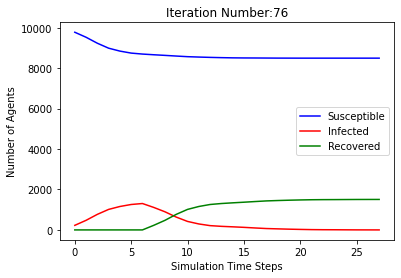

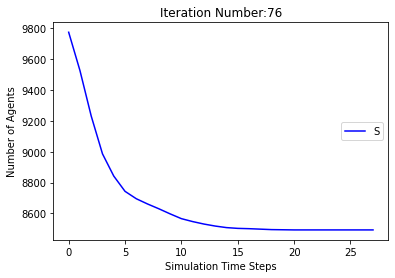

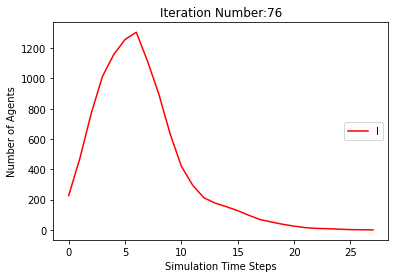

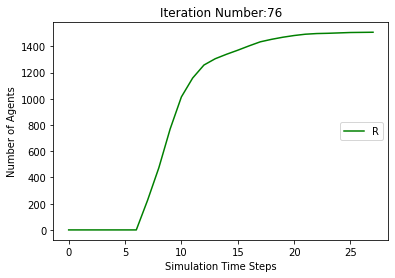

[9774, 9549, 9248, 8992, 8817, 8738, 8683, 8644, 8616, 8588, 8570, 8557, 8544, 8536, 8529, 8523, 8518, 8515, 8515, 8514, 8513, 8512, 8512, 8512, 8512, 8512, 8512, 8512, 8512]
[226, 451, 752, 1008, 1183, 1262, 1317, 1130, 933, 660, 422, 260, 194, 147, 115, 93, 70, 55, 42, 30, 23, 17, 11, 6, 3, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 451, 752, 1008, 1183, 1262, 1317, 1356, 1384, 1412, 1430, 1443, 1456, 1464, 1471, 1477, 1482, 1485, 1485, 1486, 1487, 1488]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 860

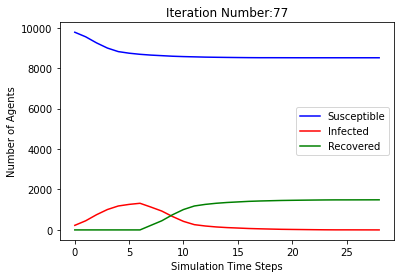

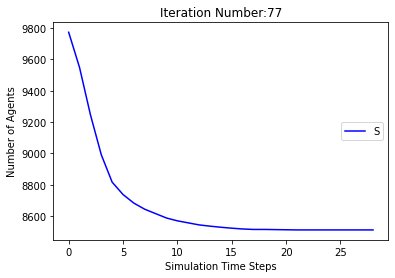

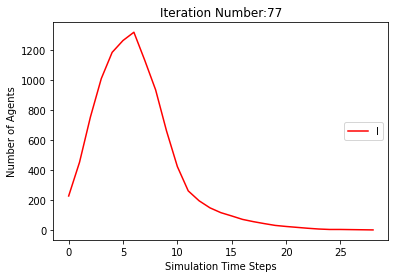

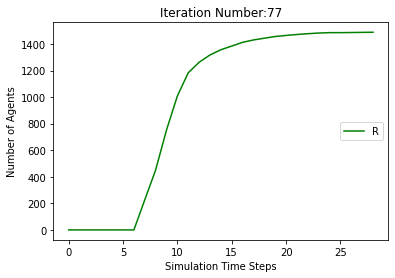

[9774, 9563, 9265, 9002, 8827, 8723, 8685, 8663, 8655, 8643, 8635, 8618, 8604, 8593, 8586, 8583, 8580, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579]
[226, 437, 735, 998, 1173, 1277, 1315, 1111, 908, 622, 367, 209, 119, 92, 77, 72, 63, 56, 39, 25, 14, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 437, 735, 998, 1173, 1277, 1315, 1337, 1345, 1357, 1365, 1382, 1396, 1407, 1414, 1417, 1420, 1421]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 859

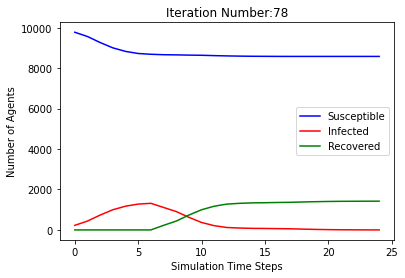

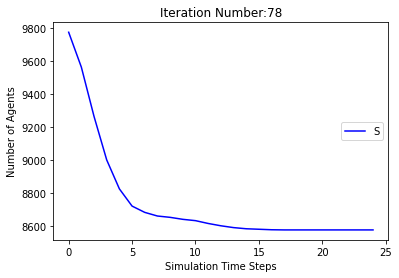

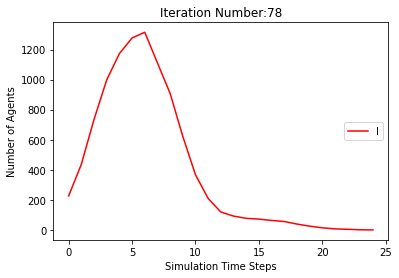

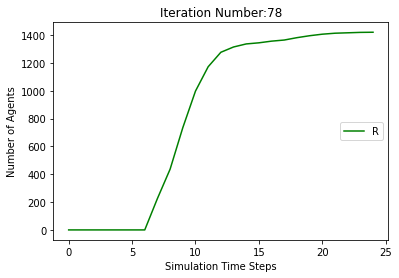

[9774, 9544, 9245, 8991, 8836, 8758, 8713, 8683, 8660, 8642, 8627, 8616, 8611, 8609, 8609, 8609, 8609, 8609, 8609, 8609, 8609]
[226, 456, 755, 1009, 1164, 1242, 1287, 1091, 884, 603, 364, 220, 147, 104, 74, 51, 33, 18, 7, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 456, 755, 1009, 1164, 1242, 1287, 1317, 1340, 1358, 1373, 1384, 1389, 1391]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8597], [9774, 9559, 9258, 9015, 8846, 8747, 8

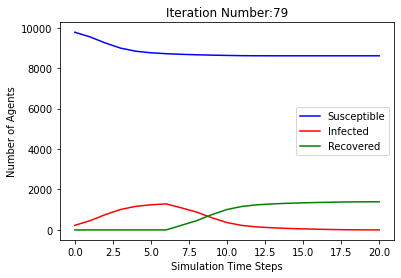

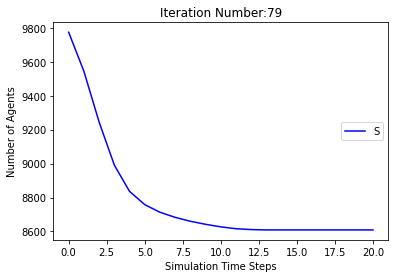

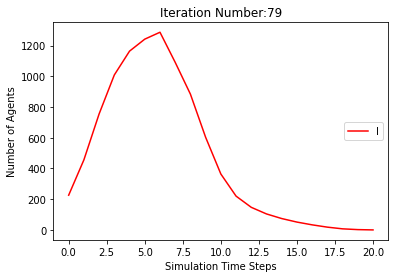

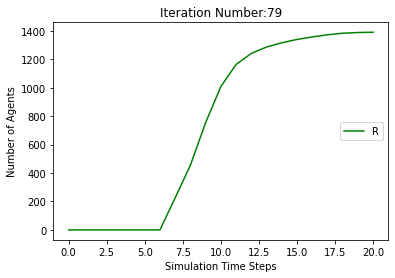

[9774, 9563, 9283, 9029, 8847, 8731, 8670, 8643, 8617, 8594, 8580, 8569, 8561, 8553, 8539, 8531, 8527, 8519, 8517, 8511, 8509, 8508, 8507, 8506, 8505, 8504, 8504, 8504, 8504, 8504, 8504, 8504, 8504]
[226, 437, 717, 971, 1153, 1269, 1330, 1131, 946, 689, 449, 278, 170, 117, 104, 86, 67, 61, 52, 50, 44, 31, 24, 21, 14, 13, 7, 5, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 437, 717, 971, 1153, 1269, 1330, 1357, 1383, 1406, 1420, 1431, 1439, 1447, 1461, 1469, 1473, 1481, 1483, 1489, 1491, 1492, 1493, 1494, 1495, 1496]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 88

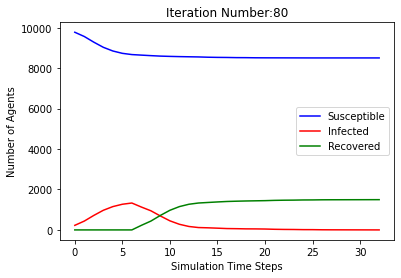

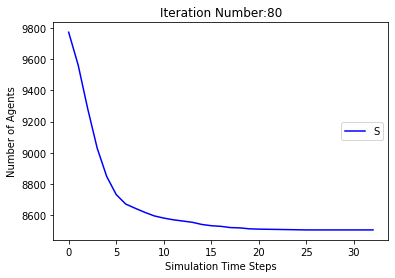

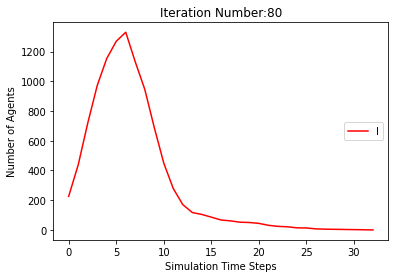

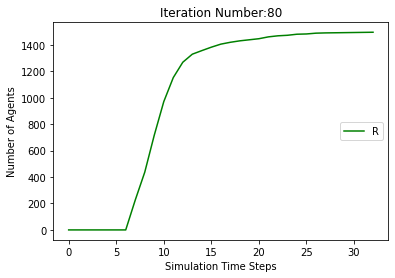

[9774, 9547, 9276, 9019, 8842, 8735, 8677, 8648, 8625, 8606, 8598, 8592, 8586, 8582, 8579, 8575, 8574, 8574, 8574, 8574, 8574, 8574, 8574, 8574]
[226, 453, 724, 981, 1158, 1265, 1323, 1126, 922, 670, 421, 250, 149, 95, 69, 50, 32, 24, 18, 12, 8, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 453, 724, 981, 1158, 1265, 1323, 1352, 1375, 1394, 1402, 1408, 1414, 1418, 1421, 1425, 1426]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 8597, 8

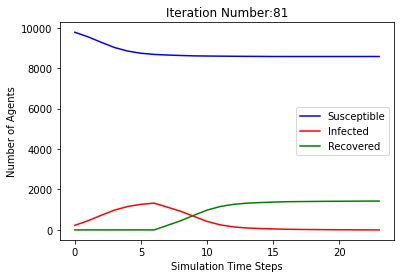

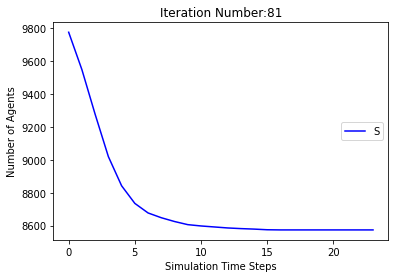

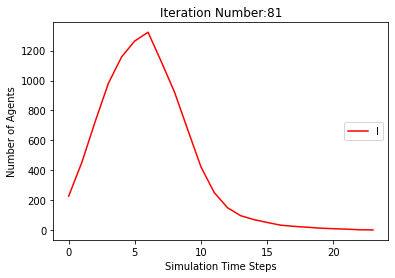

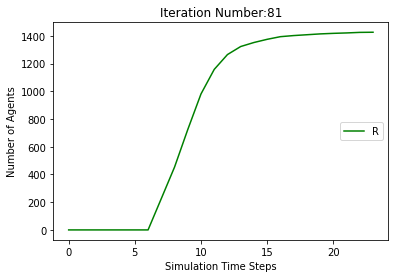

[9774, 9542, 9265, 8995, 8827, 8739, 8691, 8671, 8652, 8633, 8611, 8594, 8583, 8574, 8570, 8570, 8570, 8569, 8566, 8561, 8560, 8560, 8560, 8560, 8560, 8560, 8560, 8560]
[226, 458, 735, 1005, 1173, 1261, 1309, 1103, 890, 632, 384, 233, 156, 117, 101, 82, 63, 42, 28, 22, 14, 10, 10, 10, 9, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 458, 735, 1005, 1173, 1261, 1309, 1329, 1348, 1367, 1389, 1406, 1417, 1426, 1430, 1430, 1430, 1431, 1434, 1439, 1440]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600,

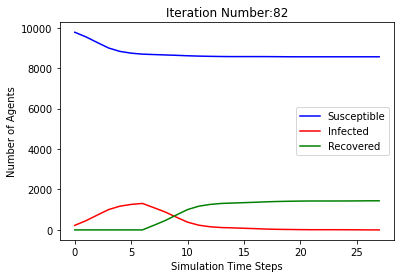

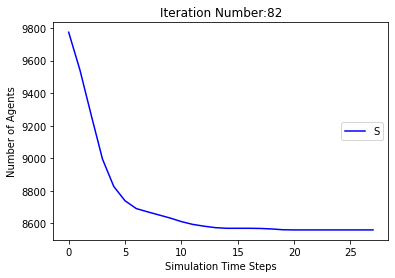

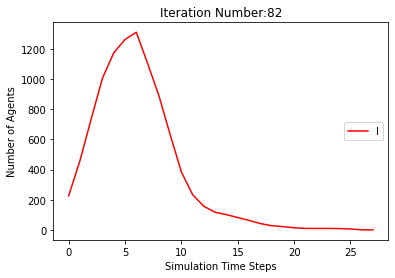

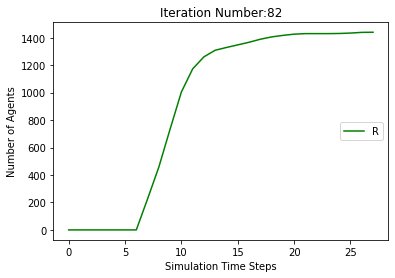

[9774, 9570, 9277, 9001, 8840, 8760, 8705, 8668, 8639, 8615, 8596, 8575, 8562, 8550, 8542, 8534, 8528, 8527, 8527, 8527, 8527, 8527, 8527, 8527, 8527]
[226, 430, 723, 999, 1160, 1240, 1295, 1106, 931, 662, 405, 265, 198, 155, 126, 105, 87, 69, 48, 35, 23, 15, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 430, 723, 999, 1160, 1240, 1295, 1332, 1361, 1385, 1404, 1425, 1438, 1450, 1458, 1466, 1472, 1473]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597,

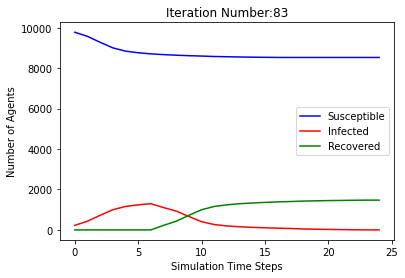

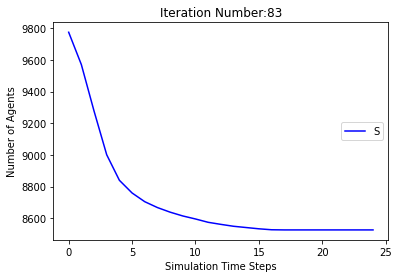

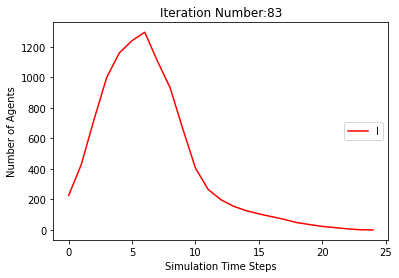

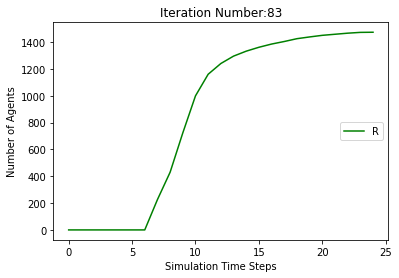

[9774, 9526, 9256, 9004, 8832, 8724, 8684, 8657, 8631, 8603, 8585, 8571, 8560, 8555, 8549, 8543, 8541, 8540, 8538, 8536, 8536, 8536, 8536, 8536, 8536, 8536, 8536]
[226, 474, 744, 996, 1168, 1276, 1316, 1117, 895, 653, 419, 261, 164, 129, 108, 88, 62, 45, 33, 24, 19, 13, 7, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 474, 744, 996, 1168, 1276, 1316, 1343, 1369, 1397, 1415, 1429, 1440, 1445, 1451, 1457, 1459, 1460, 1462, 1464]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 

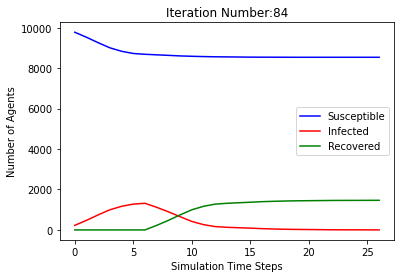

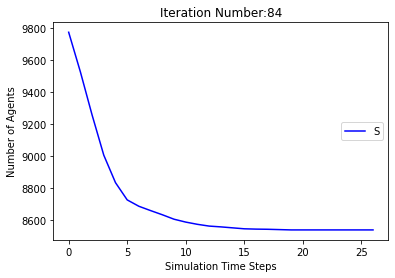

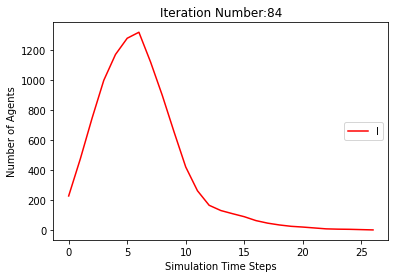

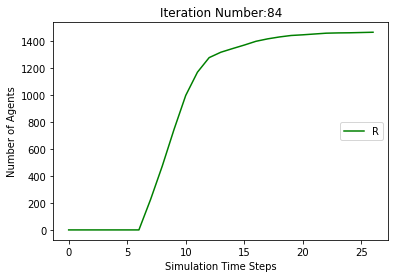

[9774, 9534, 9263, 9011, 8849, 8768, 8720, 8688, 8661, 8633, 8613, 8592, 8580, 8572, 8561, 8553, 8547, 8543, 8536, 8532, 8530, 8530, 8530, 8530, 8530, 8530, 8530, 8530]
[226, 466, 737, 989, 1151, 1232, 1280, 1086, 873, 630, 398, 257, 188, 148, 127, 108, 86, 70, 56, 48, 42, 31, 23, 17, 13, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 466, 737, 989, 1151, 1232, 1280, 1312, 1339, 1367, 1387, 1408, 1420, 1428, 1439, 1447, 1453, 1457, 1464, 1468, 1470]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600,

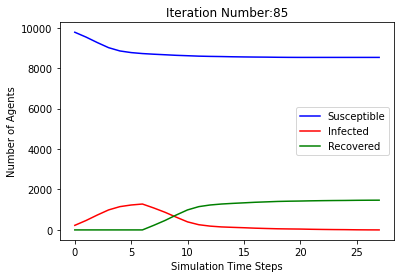

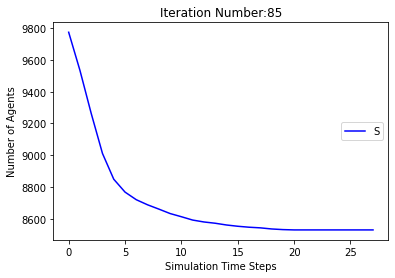

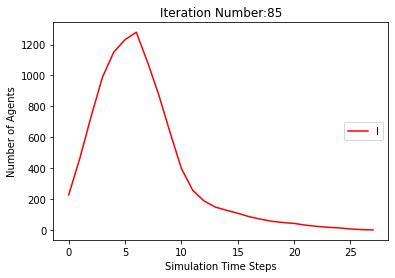

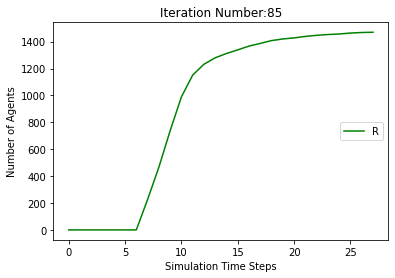

[9774, 9546, 9256, 8976, 8821, 8733, 8694, 8651, 8633, 8603, 8580, 8556, 8538, 8531, 8528, 8523, 8521, 8517, 8516, 8513, 8513, 8511, 8511, 8511, 8511, 8511, 8511, 8511, 8511]
[226, 454, 744, 1024, 1179, 1267, 1306, 1123, 913, 653, 396, 265, 195, 163, 123, 110, 82, 63, 40, 25, 18, 17, 12, 10, 6, 5, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 454, 744, 1024, 1179, 1267, 1306, 1349, 1367, 1397, 1420, 1444, 1462, 1469, 1472, 1477, 1479, 1483, 1484, 1487, 1487, 1489]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8

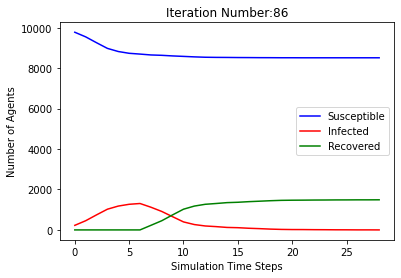

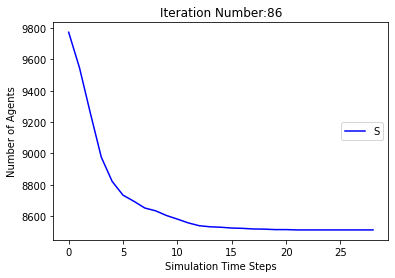

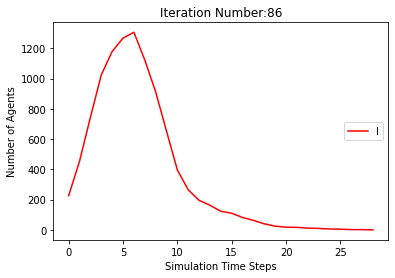

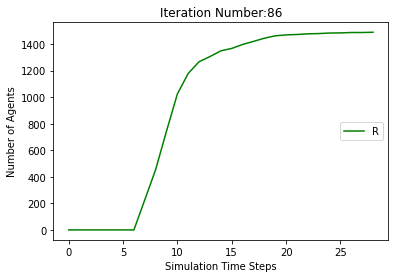

[9774, 9595, 9318, 9048, 8851, 8728, 8659, 8627, 8602, 8571, 8545, 8517, 8502, 8489, 8482, 8480, 8478, 8475, 8473, 8472, 8468, 8464, 8462, 8460, 8459, 8459, 8459, 8458, 8458, 8458, 8458, 8458, 8458, 8458, 8458]
[226, 405, 682, 952, 1149, 1272, 1341, 1147, 993, 747, 503, 334, 226, 170, 145, 122, 93, 70, 44, 30, 21, 18, 18, 18, 16, 14, 13, 10, 6, 4, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 405, 682, 952, 1149, 1272, 1341, 1373, 1398, 1429, 1455, 1483, 1498, 1511, 1518, 1520, 1522, 1525, 1527, 1528, 1532, 1536, 1538, 1540, 1541, 1541, 1541, 1542]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8

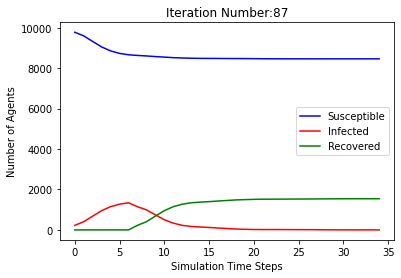

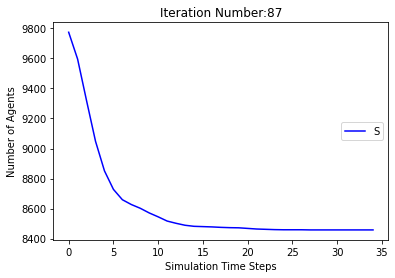

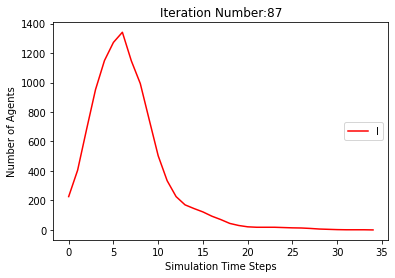

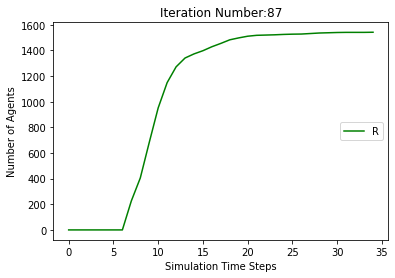

[9774, 9552, 9250, 9007, 8831, 8741, 8707, 8681, 8662, 8650, 8630, 8620, 8609, 8604, 8603, 8602, 8601, 8600, 8598, 8596, 8591, 8590, 8590, 8590, 8590, 8590, 8590, 8590, 8590]
[226, 448, 750, 993, 1169, 1259, 1293, 1093, 890, 600, 377, 211, 132, 103, 78, 60, 49, 30, 22, 13, 13, 13, 12, 11, 10, 8, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 448, 750, 993, 1169, 1259, 1293, 1319, 1338, 1350, 1370, 1380, 1391, 1396, 1397, 1398, 1399, 1400, 1402, 1404, 1409, 1410]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604

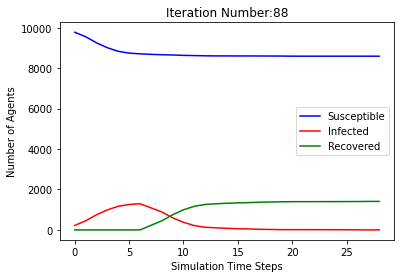

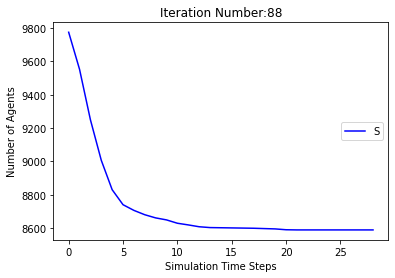

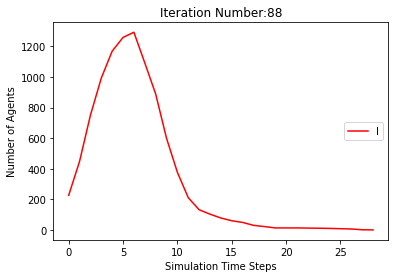

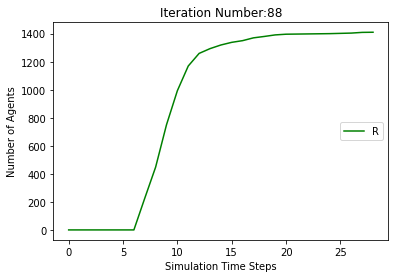

[9774, 9559, 9289, 8999, 8835, 8735, 8676, 8644, 8610, 8579, 8550, 8534, 8517, 8507, 8502, 8498, 8495, 8491, 8491, 8490, 8490, 8490, 8490, 8490, 8490, 8490, 8490]
[226, 441, 711, 1001, 1165, 1265, 1324, 1130, 949, 710, 449, 301, 218, 169, 142, 112, 84, 59, 43, 27, 17, 12, 8, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 441, 711, 1001, 1165, 1265, 1324, 1356, 1390, 1421, 1450, 1466, 1483, 1493, 1498, 1502, 1505, 1509, 1509, 1510]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 859

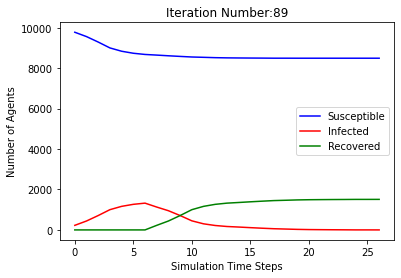

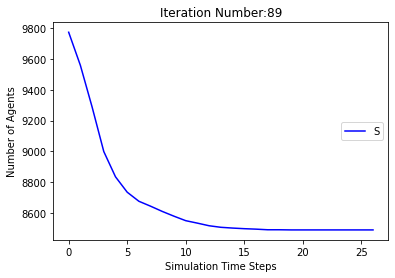

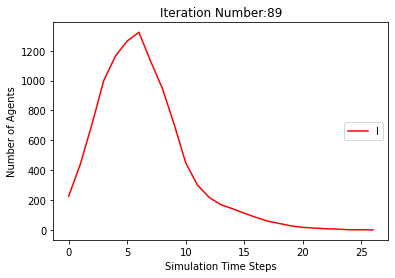

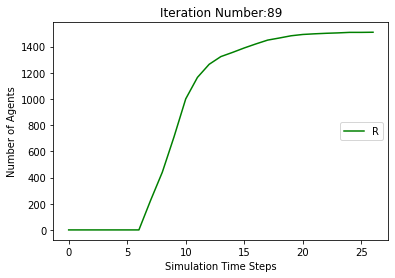

[9774, 9544, 9266, 9016, 8843, 8744, 8699, 8675, 8658, 8646, 8639, 8627, 8616, 8611, 8604, 8600, 8598, 8596, 8594, 8594, 8594, 8594, 8594, 8594, 8594, 8594]
[226, 456, 734, 984, 1157, 1256, 1301, 1099, 886, 620, 377, 216, 128, 88, 71, 58, 48, 43, 33, 22, 17, 10, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 456, 734, 984, 1157, 1256, 1301, 1325, 1342, 1354, 1361, 1373, 1384, 1389, 1396, 1400, 1402, 1404, 1406]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597,

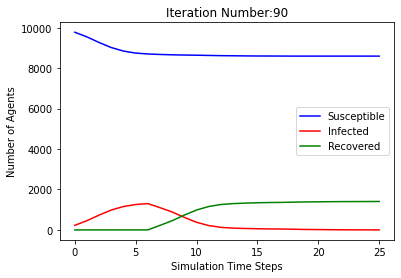

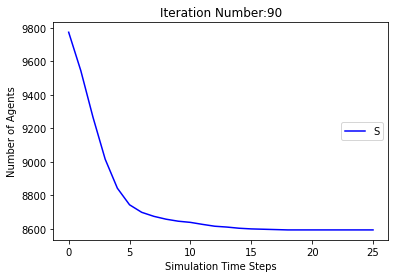

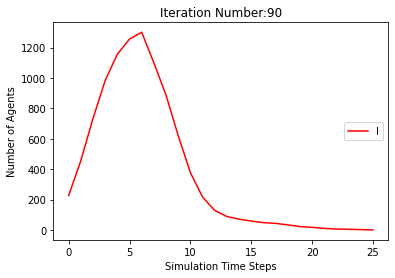

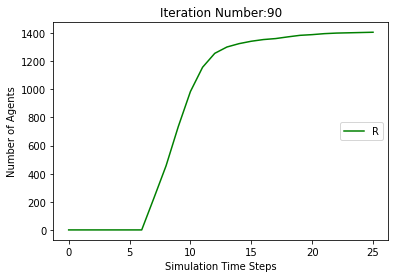

[9774, 9557, 9274, 9004, 8834, 8748, 8691, 8662, 8635, 8615, 8594, 8579, 8569, 8557, 8548, 8544, 8537, 8533, 8533, 8533, 8533, 8533, 8532, 8529, 8527, 8527, 8527, 8527, 8527, 8527, 8527, 8527]
[226, 443, 726, 996, 1166, 1252, 1309, 1112, 922, 659, 410, 255, 179, 134, 114, 91, 78, 61, 46, 36, 24, 15, 12, 8, 6, 6, 6, 6, 6, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 443, 726, 996, 1166, 1252, 1309, 1338, 1365, 1385, 1406, 1421, 1431, 1443, 1452, 1456, 1463, 1467, 1467, 1467, 1467, 1467, 1468, 1471, 1473]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 86

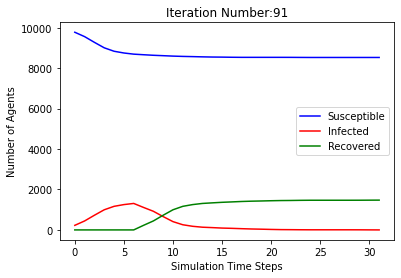

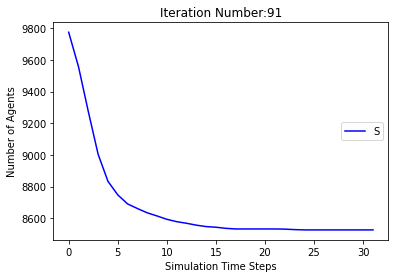

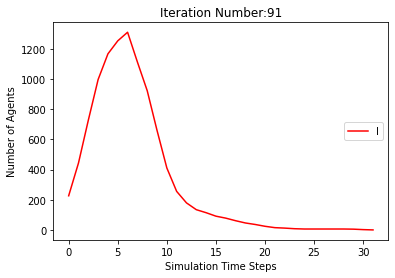

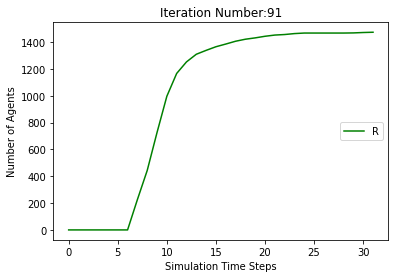

[9774, 9547, 9227, 8952, 8801, 8741, 8704, 8672, 8653, 8629, 8609, 8592, 8575, 8563, 8556, 8553, 8548, 8542, 8540, 8539, 8535, 8533, 8532, 8532, 8531, 8530, 8529, 8528, 8528, 8528, 8528, 8528, 8528, 8528, 8528]
[226, 453, 773, 1048, 1199, 1259, 1296, 1102, 894, 598, 343, 209, 166, 141, 116, 100, 81, 67, 52, 36, 28, 23, 21, 16, 11, 10, 10, 7, 5, 4, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 453, 773, 1048, 1199, 1259, 1296, 1328, 1347, 1371, 1391, 1408, 1425, 1437, 1444, 1447, 1452, 1458, 1460, 1461, 1465, 1467, 1468, 1468, 1469, 1470, 1471, 1472]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 

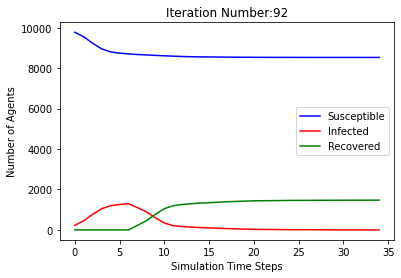

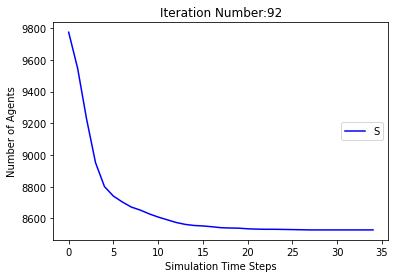

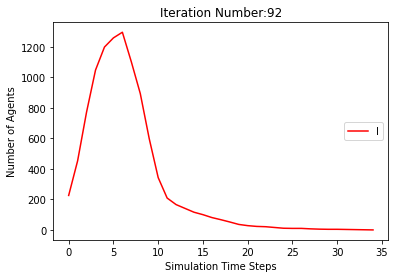

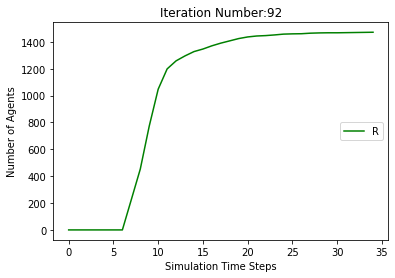

[9774, 9551, 9270, 8993, 8814, 8704, 8655, 8629, 8603, 8585, 8569, 8557, 8540, 8526, 8516, 8514, 8512, 8510, 8508, 8508, 8507, 8506, 8505, 8504, 8504, 8504, 8504, 8504, 8504, 8504, 8504]
[226, 449, 730, 1007, 1186, 1296, 1345, 1145, 948, 685, 424, 257, 164, 129, 113, 89, 73, 59, 49, 32, 19, 10, 9, 8, 6, 4, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 449, 730, 1007, 1186, 1296, 1345, 1371, 1397, 1415, 1431, 1443, 1460, 1474, 1484, 1486, 1488, 1490, 1492, 1492, 1493, 1494, 1495, 1496]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639

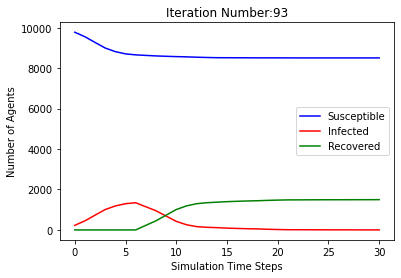

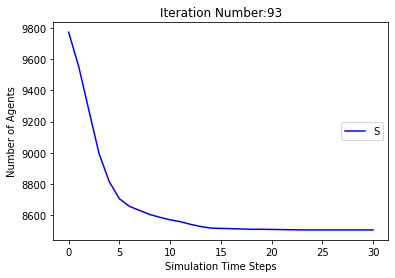

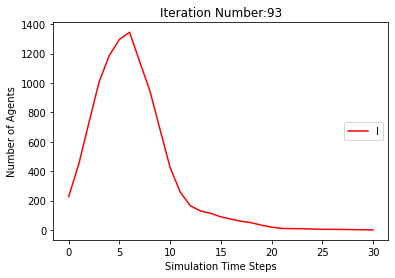

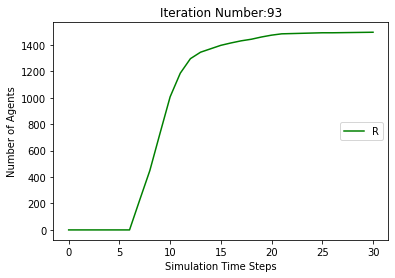

[9774, 9543, 9246, 8964, 8785, 8714, 8673, 8639, 8603, 8565, 8539, 8525, 8512, 8507, 8500, 8495, 8494, 8492, 8492, 8490, 8490, 8490, 8490, 8490, 8490, 8490, 8490]
[226, 457, 754, 1036, 1215, 1286, 1327, 1135, 940, 681, 425, 260, 202, 166, 139, 108, 71, 47, 33, 22, 17, 10, 5, 4, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 457, 754, 1036, 1215, 1286, 1327, 1361, 1397, 1435, 1461, 1475, 1488, 1493, 1500, 1505, 1506, 1508, 1508, 1510]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 859

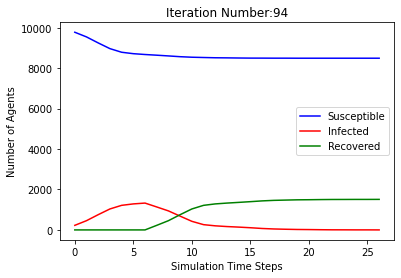

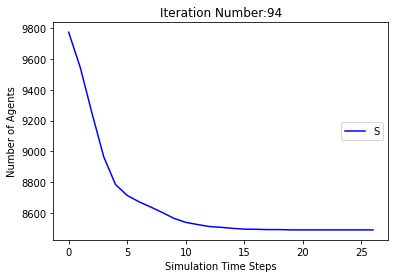

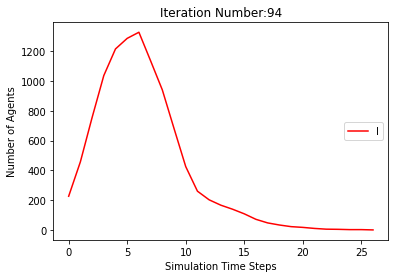

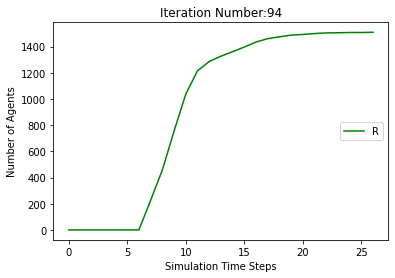

[9774, 9532, 9221, 8966, 8792, 8717, 8681, 8655, 8632, 8603, 8582, 8571, 8562, 8550, 8548, 8546, 8545, 8544, 8542, 8540, 8540, 8540, 8540, 8540, 8540, 8540, 8540]
[226, 468, 779, 1034, 1208, 1283, 1319, 1119, 900, 618, 384, 221, 155, 131, 107, 86, 58, 38, 29, 22, 10, 8, 6, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 468, 779, 1034, 1208, 1283, 1319, 1345, 1368, 1397, 1418, 1429, 1438, 1450, 1452, 1454, 1455, 1456, 1458, 1460]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598,

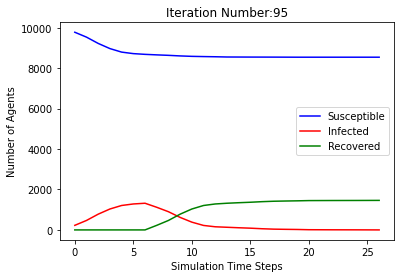

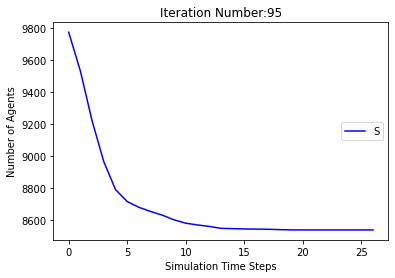

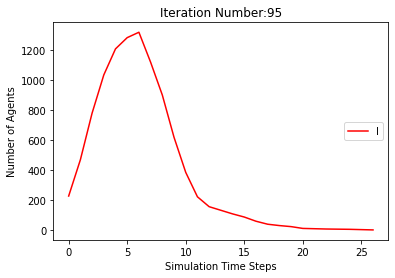

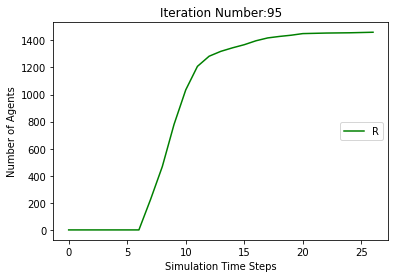

[9774, 9539, 9237, 8980, 8807, 8711, 8679, 8656, 8633, 8614, 8600, 8578, 8566, 8557, 8553, 8552, 8548, 8548, 8548, 8548, 8548, 8548, 8548, 8548]
[226, 461, 763, 1020, 1193, 1289, 1321, 1118, 906, 623, 380, 229, 145, 122, 103, 81, 66, 52, 30, 18, 9, 5, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 461, 763, 1020, 1193, 1289, 1321, 1344, 1367, 1386, 1400, 1422, 1434, 1443, 1447, 1448, 1452]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8602, 8600, 8599, 8598, 8598, 8598, 8597, 8597, 8597, 8597, 8597, 8597, 859

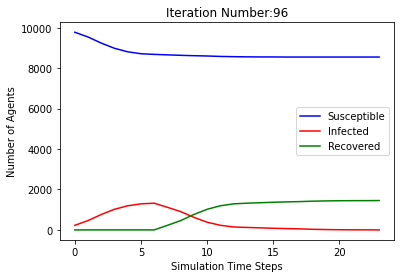

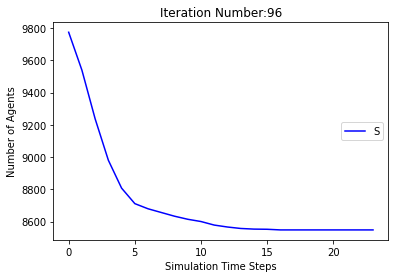

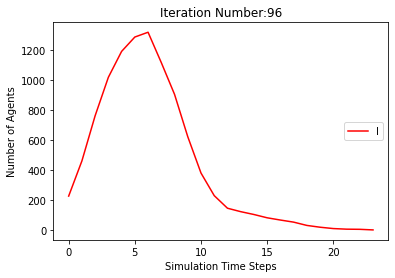

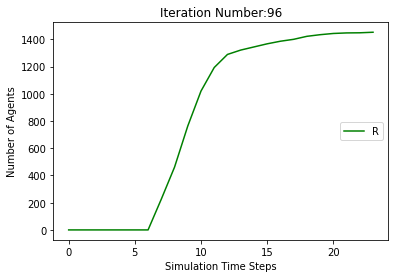

[9774, 9549, 9252, 8975, 8812, 8730, 8686, 8656, 8640, 8617, 8602, 8594, 8587, 8583, 8579, 8578, 8577, 8577, 8577, 8577, 8577, 8577, 8577, 8575, 8574, 8574, 8574, 8574, 8574, 8574, 8574, 8574]
[226, 451, 748, 1025, 1188, 1270, 1314, 1118, 909, 635, 373, 218, 143, 103, 77, 62, 40, 25, 17, 10, 6, 2, 1, 2, 3, 3, 3, 3, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 451, 748, 1025, 1188, 1270, 1314, 1344, 1360, 1383, 1398, 1406, 1413, 1417, 1421, 1422, 1423, 1423, 1423, 1423, 1423, 1423, 1423, 1425, 1426]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689

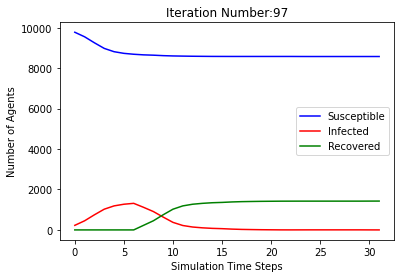

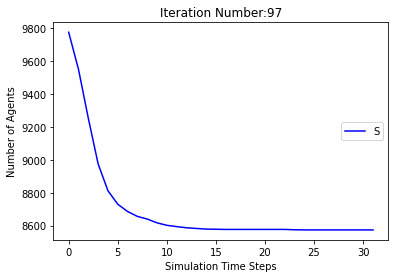

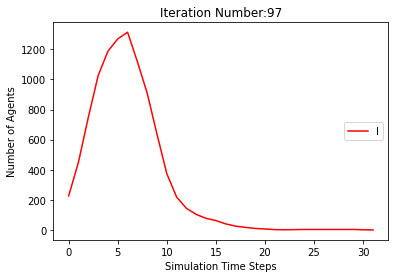

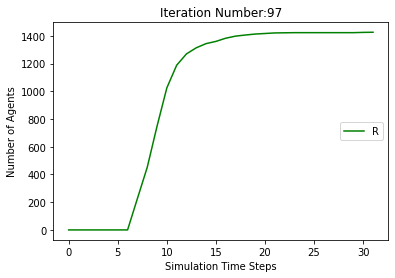

[9774, 9535, 9250, 8988, 8811, 8719, 8688, 8664, 8645, 8626, 8603, 8586, 8574, 8568, 8566, 8566, 8566, 8566, 8564, 8562, 8560, 8559, 8559, 8559, 8559, 8559, 8559, 8559, 8559]
[226, 465, 750, 1012, 1189, 1281, 1312, 1110, 890, 624, 385, 225, 145, 120, 98, 79, 60, 37, 22, 12, 8, 7, 7, 7, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 465, 750, 1012, 1189, 1281, 1312, 1336, 1355, 1374, 1397, 1414, 1426, 1432, 1434, 1434, 1434, 1434, 1436, 1438, 1440, 1441]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 8

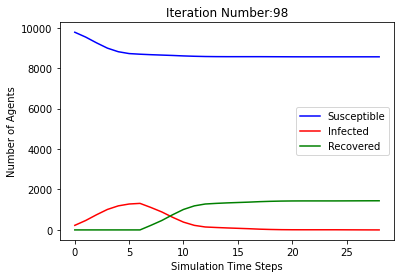

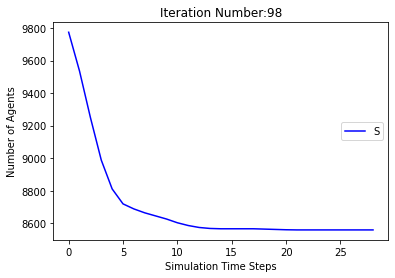

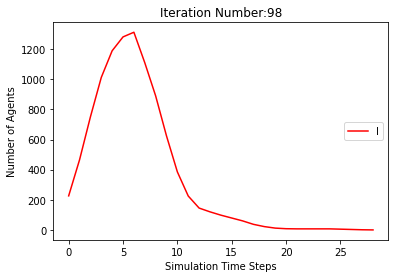

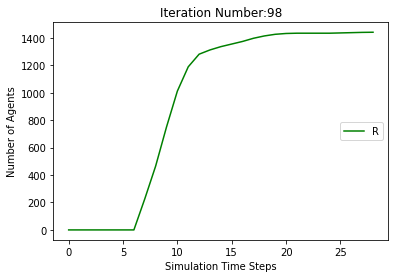

[9774, 9583, 9304, 9021, 8860, 8757, 8694, 8658, 8634, 8618, 8602, 8593, 8587, 8585, 8578, 8574, 8572, 8571, 8570, 8569, 8568, 8565, 8562, 8562, 8562, 8562, 8562, 8562, 8562, 8562]
[226, 417, 696, 979, 1140, 1243, 1306, 1116, 949, 686, 419, 267, 170, 109, 80, 60, 46, 31, 23, 18, 17, 13, 12, 10, 9, 8, 7, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 417, 696, 979, 1140, 1243, 1306, 1342, 1366, 1382, 1398, 1407, 1413, 1415, 1422, 1426, 1428, 1429, 1430, 1431, 1432, 1435, 1438]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 86

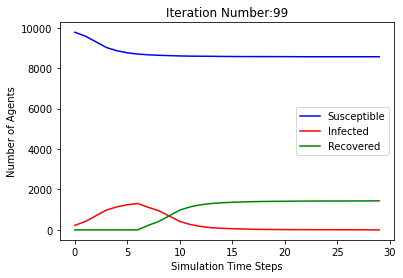

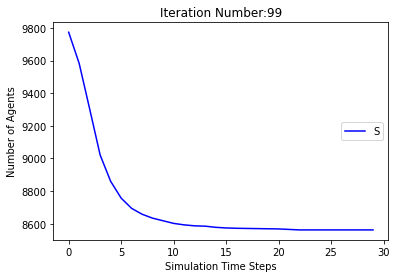

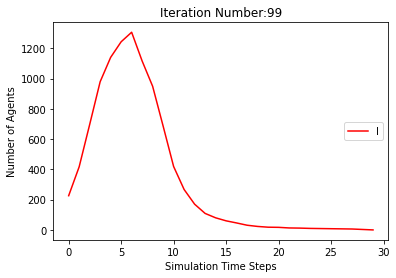

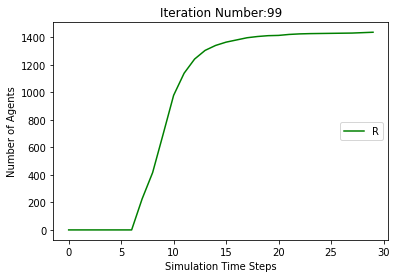

[9774, 9546, 9263, 9008, 8840, 8734, 8684, 8652, 8635, 8617, 8595, 8581, 8566, 8555, 8550, 8547, 8546, 8544, 8544, 8543, 8541, 8540, 8540, 8540, 8540, 8540, 8540, 8540, 8540]
[226, 454, 737, 992, 1160, 1266, 1316, 1122, 911, 646, 413, 259, 168, 129, 102, 88, 71, 51, 37, 23, 14, 10, 7, 6, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 226, 454, 737, 992, 1160, 1266, 1316, 1348, 1365, 1383, 1405, 1419, 1434, 1445, 1450, 1453, 1454, 1456, 1456, 1457, 1459, 1460]
[[], [9774, 9538, 9237, 8979, 8817, 8739, 8698, 8679, 8663, 8655, 8642, 8630, 8619, 8614, 8608, 8602, 8598, 8596, 8593, 8592, 8592, 8592, 8592, 8592, 8592, 8592, 8592], [9774, 9543, 9263, 9023, 8852, 8766, 8719, 8699, 8679, 8665, 8660, 8656, 8650, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645], [9774, 9536, 9224, 8964, 8809, 8730, 8684, 8652, 8626, 8610, 8586, 8568, 8560, 8548, 8540, 8536, 8534, 8533, 8533, 8533, 8533, 8533, 8533, 8533, 8533], [9774, 9547, 9277, 9023, 8857, 8773, 8723, 8689, 8658, 8639, 8630, 8625, 8615, 8608, 8604, 

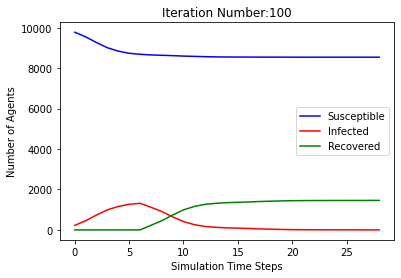

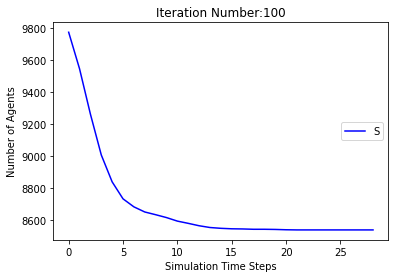

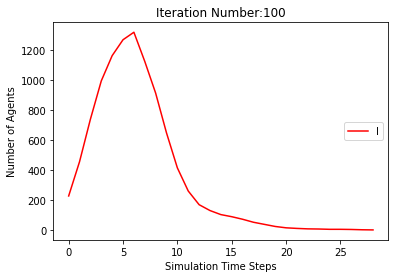

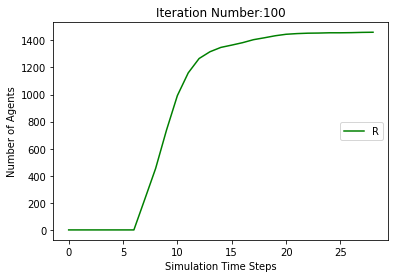

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

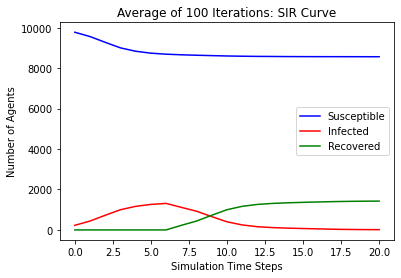

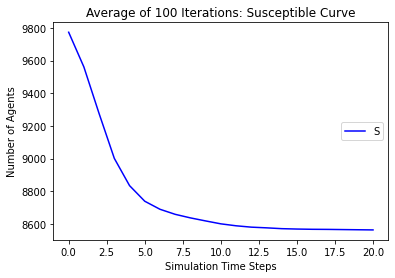

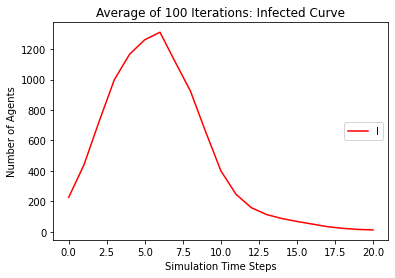

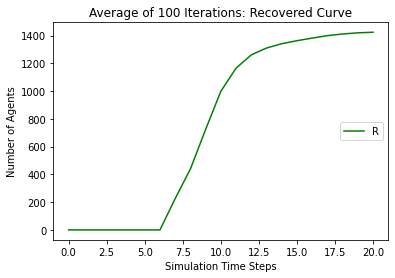

In [14]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
